<a href="https://colab.research.google.com/github/guangyoung/test2/blob/main/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

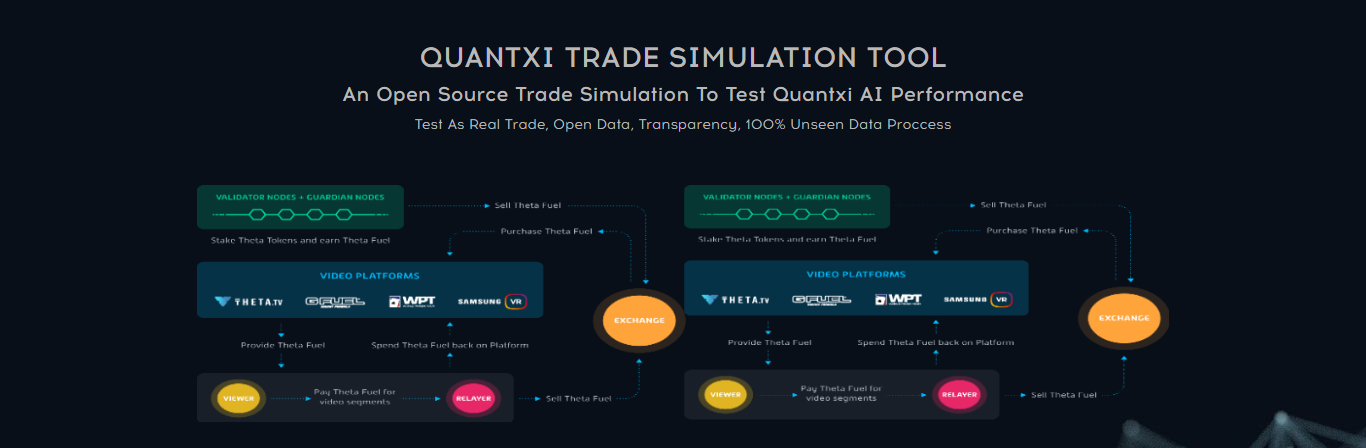

# **LIBRARY**

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install progressbar2

In [2]:
import getpass
import pandas as pd
import yfinance as yf
import panel as pn
import datetime
import requests
import datetime as dt
import numpy as np
import param
from bokeh.plotting import figure
from pandas_datareader import data as pdr
yf.pdr_override()
import progressbar

In [ ]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/heriyang9000/mysys/archive/refs/heads/main.zip" \
    -O "/tmp/cats-and-dogs.zip"


zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
print('Test set dogs' , len(os.listdir('dog-cat-full-dataset-master/data/test/dogs')))

NameError: ignored

## **API** **KEY**

In [ ]:
#DIPAKAI
api_key = getpass.getpass('Masukan Api Key Anda lalu klik enter? ')
response = requests.get(f"https://api.quantxi.com/user_profile?api_key={api_key}")
while response.json()['status'] == 'failed':
  print("Maaf API Key yang anda masukkan salah, coba di ulang lagi !!!")
  api_key = getpass.getpass('Masukan Api Key Anda lalu klik enter? ')
  response = requests.get(f"https://api.quantxi.com/user_profile?api_key={api_key}")
if response.json()['status'] == 'success':
  print(f"Selamat Datang {response.json()['data']['user_name']}")


# **SETTING**

In [5]:
#DIPAKAI
initial_euqity = int(input('Masukan Initial Equity Anda, Min= 1,000,000 Max= 100,000,000 lalu klik enter? '))
while initial_euqity < 1000000 or initial_euqity > 100000000:
  print("Maaf initial_euqity yang anda masukkan salah, coba di ulang lagi !!!")
  initial_euqity = int(input('Masukan Initial Equity Anda, Min= 1,000,000 Max= 100,000,000 lalu klik enter? '))
print(f"Anda telah mensetting Initial Equity: {initial_euqity}")

spread = float(input('Masukan Spread+Slippage Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
while spread < 0.01 or spread > 0.05:
  print("Maaf spread yang anda masukkan salah, coba di ulang lagi !!!")
  spread = float(input('Masukan Spread+Slippage Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
print(f"Anda telah mensetting Spread: {spread}")

commision = float(input('Masukan Commision Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
while commision < 0.01 or commision > 0.05:
  print("Maaf commision yang anda masukkan salah, coba di ulang lagi !!!")
  commision = float(input('Masukan Commision Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
print(f"Anda telah mensetting Commision: {commision}")

interest = float(input('Masukan Interest Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
while interest < 0.01 or interest > 0.05:
  print("Maaf interest yang anda masukkan salah, coba di ulang lagi !!!")
  interest = float(input('Masukan Interest Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
print(f"Anda telah mensetting Interest: {interest}")

# print(f"Anda telah mensetting testing anda, Initial Equity: {initial_euqity}, Spread+Slippage: {spread}")


Masukan Initial Equity Anda, Min= 1,000,000 Max= 100,000,000 lalu klik enter? 1000000
Anda telah mensetting Initial Equity: 1000000
Masukan Spread+Slippage Anda, Min= 0.01 Max= 0.05 lalu klik enter? 0.01
Anda telah mensetting Spread: 0.01
Masukan Commision Anda, Min= 0.01 Max= 0.05 lalu klik enter? 0.01
Anda telah mensetting Commision: 0.01
Masukan Interest Anda, Min= 0.01 Max= 0.05 lalu klik enter? 0.01
Anda telah mensetting Interest: 0.01


# **DATA**

In [ ]:
#add data stock
portfolio = {"ticker":[],"data":[]}
stockdata = {"ticker":[],"startdate":[],"enddate":[]}
while len(portfolio["ticker"]) < 100000:
  ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split())) 
  for x in range(len(ticker_list)):
    if ticker_list[x] not in portfolio["ticker"]:
      ticker_data = pdr.get_data_yahoo(ticker_list[x], start=datetime.datetime(1900, 1, 1), end=datetime.datetime(2022, 1, 1))
      if len(ticker_data) > 1305:
        ticker_data.to_csv("/content/drive/MyDrive/all_ticker/{}.csv".format(ticker_list[x]))        
        portfolio["ticker"].append(ticker_list[x])
        portfolio["data"].append(ticker_data)
        stockdata["ticker"].append(ticker_list[x])
        stockdata["startdate"].append(ticker_data.index[0])
        stockdata["enddate"].append(ticker_data.index[len(ticker_data.index)-1])  
      else:
        print("maaf data ticker "+ticker_list[x]+" tidak cukup data, minimal data 1305 baris")

In [ ]:
df = pd.DataFrame(stockdata)
df.to_csv("/content/drive/MyDrive/{}.csv".format("all_tickerlist"))

In [ ]:
#DIPAKAI
#add data stock manual
portfolio = {"ticker":[],"data":[]}
# while len(portfolio["ticker"]) < 2:
while len(portfolio["ticker"]) < 5:
  ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split())) 
  for x in range(len(ticker_list)):
   if ticker_list[x] not in portfolio["ticker"]:
    # ticker_data = yf.Ticker(ticker_list[x]).history(period="max")
    ticker_data = pdr.get_data_yahoo(ticker_list[x], start=datetime.datetime(1900, 1, 1), end=datetime.datetime.now())
    if len(ticker_data) > 50:
      portfolio["ticker"].append(ticker_list[x])
      portfolio["data"].append(ticker_data)
      print(len(portfolio["ticker"]))
    else:
      print("maaf data ticker "+ticker_list[x]+" tidak cukup data, minimal data 2000 baris")
   else:
      print("maaf data ticker "+ticker_list[x]+" sudah ada/dipakai")

In [ ]:
#DIPAKAI
#add data stock random
# from random import seed
from random import randint

ticker_list = ["000040.KS","0001.HK","000120.KS","000270.KS","0003.HK","0004.HK","0005.HK","000545.KS","0006.HK","000660.KS","000720.KS","000725.KS","0008.HK","0008.KL","000890.KS","000950.KS","000970.KS","000990.KS","001020.KS","001065.KS","001067.KS","0011.HK","0012.HK","001230.KS","001440.KS","001465.KS","001520.KS","001525.KS","001550.KS","0016.HK","001620.KS","001680.KS","0017.HK","001740.KS","001790.KS","001800.KS","001880.KS","0019.HK","0021.HK","0023.HK","002350.KS","002460.KS","0027.HK","002790.KS","0028.HK","003075.KS","0033.HK","003470.KS","0035.HK","003545.KS","003550.KS","0036.KL","003620.KS","003800.KQ","0039.HK","0040.KL","004020.KS","004140.KS","004310.KS","004360.KS","004490.KS","0045.HK","004540.KS","004545.KS","0048.KL","004800.KS","004960.KS","004990.KS","005010.KS","005320.KS","005380.KS","005385.KS","005389.KS","005490.KS","0055.HK","005610.KS","005720.KS","005745.KS","0058.KL","005800.KS","005850.KS","005930.KS","005935.KS","005940.KS","006380.KS","006400.KS","0065.HK","006840.KS","0069.KL","006910.KQ","0071.HK","007160.KS","0072.HK","007575.KS","007770.KQ","0081.HK","008250.KS","0083.HK","0083.KL","0086.HK","0086.KL","008770.KS","009150.KS","009160.KS","009200.KS","009290.KS","009410.KS","0095.KL","009540.KS","0096.HK","009620.KQ","0097.KL","0098.HK","0101.HK","010120.KS","010130.KS","010140.KS","010280.KQ","0103.KL","0104.HK","010420.KS","0105.HK","010600.KS","011000.KS","011070.KS","011560.KQ","0117.HK","011790.KS","0120.HK","0122.KL","0123.HK","012330.KS","012620.KQ","012750.KS","0128.KL","012800.KS","0130.HK","0131.HK","013120.KQ","0137.HK","0138.KL","0144.HK","0148.HK","014820.KS","015020.KS","0151.HK","015590.KS","0157.HK","015750.KQ","015760.KS","016600.KQ","0175.HK","017670.KS","017810.KS","017940.KS","0180.HK","0183.HK","0184.HK","018880.KS","019175.KS","0195.HK","0196.HK","019680.KS","0197.HK","020120.KS","0202.HK","020560.KS","0210.HK","022100.KQ","0223.HK","0233.HK","023460.KQ","023810.KS","0242.HK","0243.HK","0244.HK","0245.HK","0247.HK","0248.HK","024840.KQ","0252.HK","0254.HK","025540.KS","0256.HK","0257.HK","025770.KQ","025880.KQ","026040.KQ","0264.HK","0267.HK","0268.HK","026890.KS","0269.HK","0271.HK","0272.HK","0273.HK","0279.HK","0285.HK","0291.HK","0293.HK","0294.HK","0295.HK","0303.HK","0308.HK","0311.HK","0312.HK","0316.HK","0318.HK","031860.KQ","0322.HK","032500.KQ","032640.KS","033130.KQ","0337.HK","034020.KS","034220.KS","0348.HK","034940.KQ","0352.HK","035250.KS","0353.HK","0354.HK","0356.HK","0359.HK","035900.KQ","036010.KQ","036190.KQ","0363.HK","036460.KS","036540.KQ","036570.KS","036710.KQ","036830.KQ","037370.KQ","037460.KQ","0375.HK","0379.HK","0388.HK","038880.KQ","039020.KQ","039030.KQ","039130.KS","0392.HK","039490.KS","0395.HK","0408.HK","0410.HK","041020.KQ","0413.HK","041510.KQ","0419.HK","0423.HK","0425.HK","0426.HK","042660.KS","042670.KS","042700.KS","0428.HK","0444.HK","044490.KQ","044820.KS","0450.HK","0459.HK","0465.HK","047050.KS","0474.HK","0475.HK","0480.HK","0486.HK","049120.KQ","0503.HK","0505.HK","0509.HK","051900.KS","051910.KS","0522.HK","0524.HK","052690.KS","0531.HK","053160.KQ","0532.HK","054090.KQ","054540.KQ","0546.HK","054800.KQ","0554.HK","055550.KS","056000.KQ","056190.KQ","0565.HK","0572.HK","0575.HK","057880.KQ","058820.KQ","0596.HK","0602.HK","060230.KQ","060590.KQ","0607.HK","060720.KQ","0609.HK","060980.KS","0619.HK","0631.HK","0639.HK","0646.HK","065510.KQ","0656.HK","065680.KQ","0660.HK","066570.KS","066575.KS","066700.KQ","0669.HK","0672.HK","067290.KQ","0682.HK","068290.KS","068760.KQ","068790.KQ","0688.HK","068930.KQ","0691.HK","069510.KQ","0698.HK","069960.KS","0700.HK","0703.HK","0708.HK","0713.HK","0716.HK","0718.HK","0732.HK","0737.HK","0745.HK","0746.HK","0756.HK","0757.HK","0762.HK","0768.HK","0775.HK","0777.HK","079950.KQ","0800.HK","0800EA.KL","0808.HK","0809.HK","0813.HK","081660.KS","0817.HK","0819.HK","0820EA.KL","0825.HK","0826.HK","0827.HK","0828.HK","0829.HK","0830.HK","0833.HK","0836.HK","083650.KQ","0837.HK","0838.HK","0845.HK","0846.HK","0848.HK","0852.HK","0853.HK","085310.KS","0856.HK","0860.HK","0862.HK","086280.KS","0867.HK","0868.HK","0882.HK","0883.HK","0887.HK","088790.KS","0896.HK","0900.HK","0913.HK","0919.HK","0923.HK","0929.HK","0933.HK","0936.HK","0941.HK","0951.HK","0966.HK","096760.KS","0969.HK","097230.KS","0975.HK","0978.HK","097950.KS","0981.HK","0984.HK","0987.HK","0992.HK","0AW.BE","0C2.BE","0C2.DU","0CZ.BE","0CZ.MU","0WP.BE","0WP.DU","0WP.F","0WP.MU","0WPA.F","0WPA.MU","1009.HK","1015.KL","1020.HK","102280.KS","1023.KL","1029.HK","1039.HK","1044.HK","105630.KS","1059.HK","1066.KL","1070.HK","1073.HK","1080.HK","1083.HK","1101.TW","1102.TW","1109.HK","1110.HK","1125.HK","1128.HK","1130.HK","1142.HK","1155.KL","1161.HK","1163.KL","1163PA.KL","1165.HK","1171.KL","1175.HK","118000.KS","1181.HK","1185.HK","119650.KS","1198.HK","120115.KS","1208.HK","1212.HK","1217.TW","1221.HK","1222.HK","1234.HK","1236.TW","123700.KS","1259.HK","1278.HK","128820.KS","128940.KS","1295.KL","1307.TW","1308.HK","1313.HK","1314.TW","1323.TW","1333.HK","1338.HK","1361.HK","1382.HK","1387.HK","1388.HK","1393.HK","1452.TW","1466.TW","1503.TW","1513.TW","1525.TW","1565.TWO","1580.TWO","1589.KL","1619.KL","1628.HK","1638.HK","1668.HK","1685.HK","1708.TW","1717.HK","1733.HK","1742.TWO","1773.TW","1802.TW","1808.HK","1813.HK","1823.HK","1836.HK","1882.HK","1886.HK","1888.HK","1889.HK","1900.HK","1904.TW","1910.HK","1918.HK","1928.HK","1938.HK","1972.HK","1A8.BE","1AL.BE","1AL.F","1AL.SG","1LP.MU","1OL.BE","1SK.MU","2007.HK","2018.HK","2038.HK","2062.TW","2118.HK","2128.HK","2198.HK","21L.BE","2221.TWO","2280.HK","2283.KL","2288.HK","22Z.SG","2301.TW","2302.HK","2303.TW","2308.TW","2309.HK","2313.HK","2317.HK","2317.TW","2319.HK","2324.HK","2325.TW","2330.HK","2330.TW","2331.HK","2332.TW","2336.HK","2337.TW","2341.HK","2342.HK","2348.HK","2354.TW","2355.TW","2358.HK","2360.TW","2368.HK","2369.HK","2371.HK","2379.HK","2380.HK","2382.HK","2382.TW","2383.HK","2388.HK","2392.TW","2404.TW","2409.TW","2423.TW","2428.TW","2445.KL","2453.KL","2454.TW","2486.TW","2488.KL","2488.TW","2489.TW","2498.TW","2499.TW","2536.TW","2601.TW","2618.TW","2658.KL","2674.KL","2682.KL","2728.HK","2845.TW","2877.HK","2881.TW","2884.TW","2886.TW","2888.HK","2888.TW","2889.HK","2891.TW","2898.HK","2904.TW","2GB.DE","3026.KL","3028.TW","3037.TW","3042.KL","3042.TW","3056.TW","3071.TWO","3078.TWO","3086.TWO","3152.TWO","3158.KL","3162.TWO","3171.TWO","3188.TWO","3191.TWO","31S.F","31V.F","31V.SG","3204.KL","3207.TWO","3211.TWO","3213.TWO","3218.TWO","3236.TWO","3255.KL","3260.TWO","3264.TWO","3276.TWO","32A.BE","32A.F","32A.SG","3301.KL","3308.HK","3311.HK","3318.HK","3322.HK","3322.TWO","3331.HK","3333.HK","3335.HK","3336.HK","3337.HK","3362.TWO","3363.TWO","3368.HK","3374.TWO","3377.HK","3380.TW","3382.HK","3383.HK","33J.BE","33X1.F","33X1.MU","3417.KL","3434.TWO","3438.TWO","3441.KL","3476.KL","3492.TWO","34IA.F","34T1.MU","3516.TWO","3526.TWO","3531.TWO","3548.TWO","3564.TWO","3565.KL","3581.TWO","3585.TWO","3595.TWO","35V.BE","35V.F","35V.MU","3615.TWO","3617.TW","3628.TWO","3653.TW","3664.TWO","3689.KL","37E.BE","3800.HK","3818.HK","3828.HK","3838.HK","3883.HK","3888.HK","3889.HK","3899.HK","3900.HK","3918.HK","3933.HK","3989.HK","3998.HK","3999.HK","3A1.BE","3A1.F","3A1.MU","3A1.SG","3A4.BE","3AC.F","3BBB.F","3BD.F","3CKN.BE","3CKN.F","3DS.F","3DW.F","3G6.BE","3G6.F","3GH.F","3GY.F","3H3.F","3IN.L","3IZ.F","3IZ.SG","3M9.BE","3MA.BE","3ML.F","3N8.F","3ND.BE","3NQ.F","3NVN.F","3PQ.BE","3PU.BE","3QO.BE","3V64.F","3W4.BE","3XRA.BE","3XRA.F","3XRA.MU","3XRA.SG","4102.TWO","4113.TWO","4120.TWO","4162.KL","4243.KL","4324.KL","4332.HK","4417.TWO","4502.KL","4502.TWO","4530.TWO","4533.TWO","45S.BE","4609.TWO","4677.KL","4702.TWO","4707.KL","4711.TWO","4715.KL","4723.KL","4758.KL","4906.TW","4907.TWO","4A0.F","4A4B.F","4AH1.F","4BV.BE","4BV.DU","4CIA.F","4CIA.SG","4D7.BE","4D7.F","4DS.DE","4FU.F","4FU.SG","4G3A.F","4G3A.MU","4GK.F","4H6.F","4HP.BE","4HP.F","4HQ.F","4J2.BE","4J2.F","4KI.BE","4LB.BE","4M7A.BE","4M7A.F","4M7A.SG","4MFA.F","4QI.F","4QM.F","4RL.BE","4T1.BE","4TR.F","5007.KL","5013.TWO","5014.KL","5021.KL","5027.KL","504.SI","5048.KL","5049.KL","5062.KL","5065.KL","508.SI","5080.KL","5095.KL","5099.KL","510010.SS","5101.KL","510880.SS","5109.KL","5115.KL","5116.KL","5120.KL","5123.KL","5126.KL","5127.KL","5131.KL","5134.KL","5139.KL","5141.KL","5142.KL","5156.KL","5159.KL","5161.KL","5171.KL","5172.KL","5173.KL","5176.KL","5185.KL","51A.BE","51A.F","5205.TWO","5209.TWO","5213.TWO","5235SS.KL","5312.TWO","533.SI","5345.TWO","5347.KL","5347.TWO","5383.TWO","5386.TWO","5398.KL","541.SI","5426.TWO","5434.TW","5474.TWO","5489.TWO","5490.TWO","54A.F","5508.TWO","5529.TWO","554.SI","558.SI","5601.TWO","569.SI","5701.TWO","5819.KL","5843.KL","5878.KL","58JA.F","5905.TWO","599A.BE","59JA.F","59M.F","59M.MU","5A4.BE","5AA.F","5AO.F","5BS.SI","5CF.BE","5CF.SI","5DM.SI","5DN.SI","5DQ2.BE","5DQ2.F","5DQ2.MU","5EF.SI","5EG.SI","5F7.SI","5FX.SI","5GZ.SI","5JS.SI","5KT.SI","5MIA.F","5MZ.SI","5N91.BE","5OU.SI","5PF.SI","5PL.SI","5Q8.BE","5Q8.F","5TP.MU","5VD.BE","5VD.SG","5WD.F","5Z0.BE","6009.KL","6012.KL","6023.TWO","6101.TWO","6114.TWO","6115.TW","6118.TWO","6124.TWO","6125.TWO","6134.TWO","6138.TWO","6170.TWO","6174.TWO","6176.TW","6187.TWO","6188.TWO","6194.TWO","6204.TWO","6210.TWO","6219.TWO","6220.TWO","6233.TWO","6241.TWO","6242.TWO","6247.TWO","6259.TWO","6261.TWO","6271.TW","6275.TWO","6276.TWO","6277.TW","6287.TWO","6291.TWO","6351.KL","63DA.F","6432.KL","6505.TW","6556.KL","6599.KL","6742.KL","6868.HK","6874.KL","6939.KL","6947.KL","6LA.F","6MP.DU","6ZA.BE","6ZA.SG","7003.KL","7014.KL","7020.KL","7028.KL","7031.KL","7043.KL","7052.KL","7066.KL","7078.KL","7083.KL","7084.KL","7086.KL","7088.KL","7107.KL","7113.KL","7120.KL","7121.KL","7130.KL","7131.KL","7146.KL","7152.KL","7153.KL","7162.KL","7164.KL","7178.KL","7184.KL","7191.KL","7203.KL","7204.KL","7216.KL","7219.KL","7223.KL","7226.KL","7235.KL","7243.KL","7245.KL","7277.KL","7293.KL","7315.KL","7323.KL","7374.KL","7544.KL","7579.KL","7609.KL","7773.KL","7A2.BE","7A2.SG","7B7.MU","7BF.MU","7BF.SG","8003.HK","8006.HK","8019.HK","8024.TWO","8029.HK","8030.HK","8032.HK","8039.TW","8041.HK","8049.TWO","8051.HK","8053.HK","8054.TWO","8060.HK","8066.HK","8071.HK","8071.TWO","8076.TWO","8086.TWO","8091.TWO","8092.HK","8092.TWO","8103.HK","8103.TW","8110.TW","8117.HK","8121.TWO","8128.HK","8137.HK","8143.HK","8148.HK","8156.HK","8163.HK","8167.HK","8169.HK","8173.HK","8176.TWO","8178.HK","8198.HK","8203.HK","8206.KL","8213.HK","8225.HK","8226.HK","8250.HK","8255.TWO","8269.HK","8295.HK","8296.HK","8299.TWO","8303.KL","8349.TWO","8356.HK","8362.KL","8390.TWO","8648.KL","87FZ.L","88E.AX","8931.KL","8932.TWO","8936.TWO","8938.TWO","8942.TWO","8966.KL","89VS.L","8AK.F","8AK.MU","8AK.SG","8CZ.BE","8CZ.F","8WY.SG","9083.KL","90ID.L","9136.TW","9148.KL","9326.KL","9342.KL","9385.KL","9431.KL","9466.KL","9598.KL","9679.KL","9814.KL","9904.TW","9926.TW","9935.TW","9954.KL","9957.TWO","9962.TWO","9997.KL","9AE.MU","9IS.BE","9SA.BE","A","A0P.SI","A0T.BE","A0T.DU","A0T.F","A0T.MU","A1OS.BE","A1OS.DE","A1OS.DU","A1OS.F","A1OS.MU","A1OS.SG","A1T.BE","A2A.BE","A2A.F","A2A.MI","A2A.SG","A31.SI","A34.SI","A35.F","A35.SI","A3B.BE","A3C.BE","A3I.BE","A3I.F","A3J.F","A41.BE","A4A.BE","A4E1.BE","A4M.BE","A4P.BE","A4S.F","A4S.MU","A4S.SG","A4Y.MU","A52.SI","A58.BE","A58.DU","A58.F","A58.MU","A58.SG","A64.F","A64.MU","A6T.DE","A6W.F","A75.SI","A78.SI","A7A.DE","A7L.F","A7R.F","A7Z.BE","A7Z.F","A8C1.BE","A8C1.F","A8D.BE","A8H.F","A8P.BE","A8P.F","A9U.SG","AA","AA9.BE","AA9.DU","AA9.F","AA9.MU","AA9.SG","AAA.F","AAA.TO","AAAK.AT","AAAP.AT","AAB.CO","AAB.TO","AAC.AX","AACA.F","AACA.SG","AAD.BE","AAD.DE","AAD.DU","AAD.F","AAD.HA","AAD.HM","AAD.MU","AAD.SG","AADIIND.BO","AADV.L","AAE1.BE","AAEV.L","AAIF.L","AAJ.AX","AAJ.BE","AAJ.SI","AAK.ST","AAL","AAL.L","AALB.AS","AALI.JK","AAM.BE","AAM.F","AAM.SW","AAME","AAN.V","AAON","AAP.AX","AAP","AAPL","AAPL.MX","AAR.AX","AARTIDRUGS.BO","AARTIDRUGS.NS","AARTIIND.BO","AARTIIND.NS","AARVEEDEN.BO","AARVEEDEN.NS","AAS.L","AAT","AAT.V","AATG.L","AAU.AX","AAU","AAU.F","AAU.L","AAU.SG","AAU.V","AAV.TO","AAVC.L","AAWW","AAX1.F","AAZ.L","AB","AB.PA","AB1.BE","AB1.DU","AB1.F","AB1.HA","AB1.HM","AB1.MU","AB1.SG","AB3A.BE","AB3A.F","AB3A.MU","AB3A.SG","AB4.BE","AB5.F","AB6.F","ABA.AX","ABA.DE","ABA.DU","ABA.F","ABA.HM","ABA.MU","ABA.SG","ABAN.BO","ABAN.NS","ABAX","ABB.BO","ABB","ABB.NS","ABB.ST","ABBA.JK","ABBOTINDIA.BO","ABBOTINDIA.NS","ABC.AX","ABC","ABC.L","ABC-A.CR","ABCA.PA","ABCB","ABCB4.SA","ABCGAS.BO","ABCINDQ.BO","ABCP11.SA","ABD.L","ABDA.JK","ABE.VI","ABEA.BE","ABEA.DE","ABEA.DU","ABEA.F","ABEA.HA","ABEA.HM","ABEA.MU","ABEA.SG","ABEO","ABEV","ABEV3.SA","ABF.L","ABG.BE","ABG","ABG.DU","ABG.F","AB-H.V","ABHA.MU","ABHA.SG","ABHICAP.BO","ABHISHEK.NS","ABI.BR","ABI.V","ABICO.BK","ABIO","ABIRAFN.BO","ABJ.DU","ABJ.F","ABJ.HM","ABJ.MU","ABJ.SG","ABJA.BE","ABJA.F","ABJA.SG","ABK.BE","ABK.MU","ABL.BE","ABL.DE","ABL.DU","ABL.F","ABL.HM","ABL.MU","ABL.SG","ABM","ABMD","ABMKNO.BO","ABN.V","ABO.BR","ABP.AX","ABQK.QA","ABR.BE","ABR","ABR.DE","ABR.DU","ABR.F","ABR.HM","ABR.MU","ABR.SG","ABS2.SG","ABT.BA","ABT","ABT.MX","ABT.OL","ABT.SW","ABUS","ABV.AX","ABW.BE","ABW.DU","ABW.F","ABW.MU","ABW.SG","ABX.AX","ABX.TO","AC.MX","AC.PA","AC.TO","AC1.BE","AC5G.BE","AC5G.DU","AC5G.F","AC5G.MU","AC5G.SG","AC8.F","AC8.MU","ACA.MI","ACA.PA","ACAD","ACAN.PA","ACAP.BK","ACB.AX","ACBB.BE","ACBB.DU","ACBB.F","ACBB.MU","ACBB.SG","ACC.BK","ACC.BO","ACC.L","ACC.NS","ACCB.BR","ACCEL.BO","ACCELSAB.MX","ACCELYA.BO","ACCELYA.NS","ACCO","ACD.BE","ACD.F","ACD.TO","ACE.BO","ACE.MI","ACE.NS","ACE1.BE","ACE1.DU","ACE1.F","ACE1.MU","ACE1.SG","ACES.JK","ACESOFT.BO","ACFC","ACG1V.HE","ACGL.BO","ACGL","ACHC","ACHN.MX","ACID.L","ACIIN.BO","ACIL.BO","ACIW","ACJ.MU","ACK.F","ACKB.BR","ACKNIT.BO","ACLS","ACM","ACN.BE","ACN","ACNB","ACOMO.AS","ACOR","ACO-X.TO","ACO-Y.TO","ACP.L","ACQ.TO","ACR.AX","ACR.BE","ACR.DU","ACR.F","ACR.HM","ACR.MU","ACR.SG","ACROW.BO","ACRYSIL.BO","ACS.AX","ACS.MC","ACSO.L","ACT.DE","ACT.F","ACTA","ACTG","ACTI.ST","ACTINVRB.MX","ACU.AX","ACU","ACW.AX","ACWN.BE","ACWN.DE","ACWN.DU","ACWN.F","ACWN.HM","ACWN.MU","ACWN.SG","ACX.BE","ACX.DE","ACX.F","ACX.MC","ACX.SG","AD2.BE","AD2.F","AD2.HM","AD2.MU","AD2.SG","AD8.SI","ADA.AX","ADA.L","ADAM.L","ADANIENT.BO","ADANIENT.NS","ADANIPORTS.BO","ADANIPORTS.NS","ADANIPOWER.BO","ADANIPOWER.NS","ADARSHPL.BO","ADB.BE","ADB.DU","ADB.F","ADB.HM","ADB.MU","ADB.SG","ADBE","ADC.BE","ADC","ADC.DU","ADC.F","ADC.SG","ADD.AX","ADD.V","ADDIND.BO","ADDT-B.ST","ADE.V","ADEL.IS","ADES","ADES.JK","ADF.MU","ADF.SG","ADFFOODS.BO","ADG.BE","ADG.F","ADG.MU","ADG.SG","ADG.V","ADGR.TA","ADH2.BE","ADHI.JK","ADI","ADI.V","ADI1.DU","ADI1.F","ADI1.HM","ADI1.SG","ADIEXRE.BO","ADINATH.BO","ADK.V","ADL.DE","ADL.DU","ADL.F","ADL.HM","ADM.BE","ADM","ADM.DE","ADM.DU","ADM.L","ADM.MU","ADM.MX","ADM.SG","ADMF.JK","ADMG.JK","ADMP","ADN.AX","ADN.TO","ADN1.BE","ADN1.DE","ADN1.DU","ADN1.F","ADO.AX","ADORMUL.BO","ADORWELD.BO","ADORWELD.NS","ADP","ADP.DU","ADP.F","ADP.MU","ADP.PA","ADP.SG","ADP.SI","ADR-H.V","ADRO.JK","ADS.DE","ADS.DU","ADS.F","ADS.SG","ADS1.SG","ADSK","ADSL.BO","ADSL.NS","ADT.L","ADTN","ADTYFRG.BO","ADUS","ADV.AX","ADV.BE","ADV.DE","ADV.F","ADV.HA","ADV.HM","ADV.MU","ADV.SG","ADVANC.BK","ADVANIHOTR.NS","ADVI.PA","ADVMULT.BO","ADVN.SW","ADWA.F","ADW-A.TO","ADW-B.TO","ADX.AX","ADX","ADX.F","ADXN.SW","ADXS","ADY.AX","ADY.BE","ADY.F","ADZ.BE","ADZ.MC","AE","AE4.DU","AE4.F","AE9.BE","AE9.DU","AE9.F","AE9.MU","AE9.SG","AEB","AEC1.BE","AEC1.DE","AEC1.DU","AEC1.F","AEC1.HA","AEC1.HM","AEC1.MU","AEC1.SG","AED.BR","AED","AED.F","AED.MU","AED.SG","AEDA.F","AEDA.MU","AEE.AX","AEE","AEE1.BE","AEF.AX","AEF.MI","AEFES.IS","AEG","AEG.L","AEGEK.AT","AEGISCHEM.NS","AEGISLOG.BO","AEGN.AT","AEH","AEHR","AEI.AX","AEIS","AEL","AELP3.SA","AEM","AEM.TO","AEMD","AEND.BE","AEND.DE","AEND.DU","AEND.F","AEND.HA","AEND.HM","AEND.MU","AEND.SG","AENF.BE","AENF.DE","AENF.F","AEO","AEO.L","AEONTS.BK","AEP.BE","AEP","AEP.DU","AEP.F","AEP.HM","AEP.L","AEP.MU","AEP.SG","AER","AES.BE","AES","AES.DU","AES.F","AES.MU","AET","AEU.BE","AEU.DU","AEU.F","AEU.SG","AEV.AX","AEVS.SW","AEX.F","AEX.L","AEY","AEZ.BE","AEZ.F","AEZS","AF.AS","AF.BK","AF.PA","AF4.BE","AFA.AX","AFAGR.HE","AFAM","AFB","AFC.BK","AFC.L","AFC.NZ","AFC.SI","AFG","AFG.F","AFG.MU","AFG.OL","AFHL.TA","AFI.AX","AFI.CN","AFID.TA","AFIL.TA","AFK.OL","AFL.BE","AFL.BO","AFL","AFL.DU","AFL.F","AFL.MU","AFL.SG","AFLT.ME","AFLT3.SA","AFM.V","AFN.L","AFN.TO","AFO1.BE","AFO1.DU","AFO1.F","AFO1.MU","AFO1.SG","AFPR.TA","AFR.BE","AFR.DU","AFR.F","AFR.HM","AFR.MU","AFR.SG","AFR.V","AFRE.TA","AFRK.L","AFS.F","AFSI","AFT.BE","AFT.DU","AFT.F","AFT.MU","AFT.SG","AFW.F","AFX.BE","AFX.DE","AFX.DU","AFX.F","AFX.HA","AFX.HM","AFX.MU","AFX.SG","AFYON.IS","AFZ.BE","AFZ.F","AG","AG6.BE","AG8.BE","AG8.DU","AG8.F","AG8.MU","AG8.SG","AGA.F","AGARIND.BO","AGCO","AGD.AX","AGD","AGD.V","AGE.AX","AGE.BE","AGE.BK","AGE.DE","AGE.DU","AGE.F","AGE.MU","AGE.SG","AGEN","AGFB.BR","AGF-B.TO","AGG.AX","AGH.BE","AGI.AX","AGI","AGI.TO","AGIOPAPER.BO","AGJ.BE","AGJ.DE","AGJ.F","AGJ.MU","AGJ.SG","AGL.AX","AGL.BE","AGL.L","AGL.MI","AGL.V","AGM","AGM.V","AGM-A","AGN.AS","AGN.MI","AGNC","AGO","AGP.L","AGR.AX","AGR.L","AGR.MU","AGR.SG","AGR.VI","AGR3.MU","AGR3.SG","AGRO.BA","AGRO.JK","AGRO3.SA","AGS.BR","AGS.MI","AGS.SI","AGT.BE","AGT.F","AGTA.L","AG-UN.CN","AGV.MU","AGX","AGX.V","AGY.AX","AGY.L","AGYO.IS","AGYS","AH.BK","AH2N.BE","AH2N.SG","AHAP.JK","AHC.BK","AHC.F","AHC.MU","AHC-R.BK","AHCS.QA","AHEB3.SA","AHEB5.SA","AHEB6.SA","AHF.AX","AHGP","AHLEAST.BO","AHLEAST.NS","AHLUCONT.BO","AHLUCONT.NS","AHLWEST.NS","AHMDSTE.BO","AHN.AX","AHPI","AHR.V","AHS.BE","AHS.F","AHS.MU","AHT","AHT.L","AHT-PD","AHV.F","AHV.MU","AI.BK","AI.PA","AI3A.BE","AI3A.F","AI3A.MU","AI3A.SG","AI7.BE","AIA.AX","AIA.NZ","AIAENG.BO","AIAENG.NS","AIB.AX","AICHAMP.BO","AIE.BE","AIEA.L","AIF.TO","AIG.BA","AIG","AIG.MX","AIG.SW","AII.F","AIL.BE","AIL.DE","AIL.DU","AIL.F","AIL.HA","AIL.HM","AIL.MU","AIL.SG","AIM.TO","AIMC","AIM-PA.TO","AIMS.JK","AIN","AINN.DE","AINN.DU","AINN.F","AINN.HA","AINN.HM","AINN.MU","AINN.SG","AIO.BE","AIO.DU","AIO.F","AIO.MU","AIOLC.AT","AIQ.AX","AIR.BE","AIR","AIR.DE","AIR.DU","AIR.F","AIR.HA","AIR.HM","AIR.MC","AIR.MU","AIR.NZ","AIR.PA","AIR.SG","AIRE.SW","AIRI","AIRT","AIS.AX","AISA.JK","AISF.BE","AISF.F","AISF.MU","AISF.SG","AISHWARYA.BO","AIT.BK","AIT","AITA.MU","AIV.AX","AIV","AIXA.BE","AIXA.DE","AIXA.DU","AIXA.F","AIXA.HA","AIXA.HM","AIXA.MU","AIXA.SG","AIY.BE","AIY.DU","AIY.F","AIY.MU","AIY.SG","AIZ.AX","AIZ","AJ.BK","AJ2.SI","AJ3.BE","AJ3.DU","AJ3.F","AJ3.MU","AJ3.SG","AJ5.BE","AJ5.F","AJ81.F","AJ91.BE","AJ91.DU","AJ91.F","AJ91.SG","AJANTPHARM.BO","AJANTPHARM.NS","AJANTSOY.BO","AJAX.AS","AJCON.BO","AJEL.BO","AJG","AJG.L","AJI.BE","AJI.DU","AJI.F","AJI.MU","AJIT.L","AJJ.AX","AJL.AX","AJMERA.BO","AJMERA.NS","AJN.F","AJP.BE","AJP.F","AJP.SG","AJRD","AJW.F","AJW.MU","AJX.AX","AJXA.DU","AJXA.F","AJXA.MU","AK1.BE","AK1.F","AK3.BE","AK3.DU","AK3.F","AK3.HM","AK3.MU","AK3.SG","AK5.F","AK7.BE","AKAM","AKB2.BE","AKB2.F","AKB2.MU","AKB2.SG","AKBNK.IS","AKCAPIT.BO","AKCNS.IS","AKE.PA","AKENR.IS","AKER.OL","AKFGY.IS","AKG.AX","AKG.F","AKG.SG","AKGRT.IS","AKHI.QA","AKK.BE","AKKU.JK","AKLP.BE","AKM.AX","AKMGY.IS","AKN.BE","AKN.F","AKO-A","AKO-B","AKOB.F","AKOB.MU","AKP.AX","AKP.F","AKP.SG","AKPI.JK","AKR.BK","AKR","AKRA.JK","AKRIT.AT","AKRN.L","AKRN.ME","AKSA.IS","AKSCHEM.BO","AKSEN.IS","AKSHOPTFBR.BO","AKSHOPTFBR.NS","AKSI.JK","AKSO.OL","AKSUE.IS","AKTA.BE","AKTA.F","AKTA.MU","AKT-A.TO","AKT-B.TO","AKVA.OL","AKX.BE","AKX.F","AKY.SG","AKZA.AS","AKZOINDIA.BO","AKZOINDIA.NS","AL.V","AL21.F","ALA.AX","ALA.TO","ALADO.PA","ALAGR.PA","ALAI.L","ALALO.PA","ALANGIND.BO","ALANGMR-B.BO","ALANKIT.BO","ALAQU.PA","ALARK.IS","ALAST.PA","ALB","ALB.MC","ALB.MU","ALBA.L","ALBA.TA","ALBAV.HE","ALBBV.HE","ALBDM.PA","ALBERTDA.BO","ALBFR.PA","ALBI.PA","ALBIO.PA","ALBLD.PA","ALBRK.IS","ALBUD.PA","ALC.MC","ALC.TO","ALCAR.IS","ALCAR.PA","ALCES.PA","ALCHCORP.BO","ALCHEM.NS","ALCLA.PA","ALCLS.PA","ALCO","ALCOF.PA","ALCOI.PA","ALCTL.IS","ALCYB.PA","ALD.BE","ALD.DU","ALD.F","ALD.HA","ALD.HM","ALD.MU","ALD.SG","ALDAR.PA","ALDBL.PA","ALDEI.PA","ALDEL.PA","ALDLS.PA","ALDOL.PA","ALDV.PA","ALE","ALE.DU","ALE.F","ALE.MU","ALE.SG","ALECR.PA","ALEMBICLTD.BO","ALEMBICLTD.NS","ALEMV.PA","ALENR.PA","ALENT.PA","ALEO2.PA","ALESK.PA","ALEUA.PA","ALEUP.PA","ALF.NZ","ALFA.ST","ALFAA.MX","ALFAICA.BO","ALFATRAN.BO","ALFAVIO.BO","ALFBA.PA","ALFPC.PA","ALFRE.PA","ALFREDHE.BO","ALG.BE","ALG","ALG.DE","ALG.DU","ALG.F","ALG.HA","ALG.HM","ALG.MU","ALG.SG","ALGAU.PA","ALGEN.PA","ALGEV.PA","ALGIL.PA","ALGN","ALGT","ALHE.TA","ALHEO.PA","ALHIT.PA","ALHYG.PA","ALI2S.PA","ALICON.BO","ALICON.NS","ALIDS.PA","ALIMO.PA","ALINN.PA","ALINT.PA","ALIV-SDB.ST","ALJJ","ALK.AX","ALK.BE","ALK","ALKA.IS","ALKA.JK","ALKALI.BO","ALKALI.NS","ALK-B.CO","ALKEY.PA","ALKIM.IS","ALKYLAMINE.BO","ALKYLAMINE.NS","ALL.AX","ALL","ALLCARGO.BO","ALLCARGO.NS","ALLEX.PA","ALLHB.PA","ALLN.SW","ALLOG.PA","ALLSEC.BO","ALLSEC.NS","ALLT","ALM.BE","ALM.MC","ALM.ST","ALM.V","ALMAK.PA","ALMAS.PA","ALMB.CO","ALMD.TA","ALMDG.PA","ALMER.PA","ALMGI.PA","ALMI.JK","ALMIC.PA","ALMIL.PA","ALMONDZ.BO","ALMONDZ.NS","ALMY.AT","ALNATRD.BO","ALNEV.PA","ALNSE.PA","ALNXT.PA","ALNY","ALO.PA","ALOBR.PA","ALOG","ALOKTEXT.BO","ALOT","ALPA.BO","ALPA.NS","ALPA3.SA","ALPA4.SA","ALPDX.PA","ALPGRAPH.BO","ALPH.ST","ALPHA.BO","ALPHAGEO.BO","ALPHAGEO.NS","ALPINEHOU.BO","ALPJT.PA","ALPLA.PA","ALPN.SW","ALPRI.PA","ALPRO.PA","ALPSINDUS.BO","ALPSINDUS.NS","ALQ.AX","ALQGC.PA","ALR","ALREW.PA","ALRGR.PA","ALROC.PA","ALRPR.TA","ALS.BE","ALS.DU","ALS.F","ALS.HM","ALS.MU","ALS.SG","ALS.TO","ALSAS.PA","ALSEA.MX","ALSER.PA","ALSIM.PA","ALSN.SW","ALSTW.PA","ALT.AX","ALT.L","ALTA.PA","ALTR.LS","ALTRI.PA","ALTTI.PA","ALTUR.PA","ALTVO.PA","ALU.AX","ALU.F","ALU.HM","ALU.L","ALUA.BA","ALUCON.BK","ALUFLUOR.BO","ALV.BE","ALV","ALV.DE","ALV.DU","ALV.F","ALV.HA","ALV.HM","ALV.MI","ALV.MU","ALV.SG","ALVDM.PA","ALVER.PA","ALVIA.PA","ALWEC.PA","ALWED.PA","ALX.BE","ALX","ALX.DU","ALX.F","ALY.AX","ALY.V","ALZC.BE","ALZC.F","ALZC.SG","AM.PA","AM6.BE","AM6.F","AMA.AX","AMAG.JK","AMAL.BO","AMALGAM.BO","AMAN.TA","AMANAH.BK","AMANAH-R.BK","AMAR.BO","AMAR3.SA","AMARAJABAT.BO","AMARAJABAT.NS","AMARIN.BK","AMARJOTHI.BO","AMAT","AMATA.BK","AMBALALSA.BO","AMBIKCO.BO","AMBIKCO.NS","AMBIT.BO","AMBU-B.CO","AMBUJACEM.BO","AMBUJACEM.NS","AMC.AX","AMC.BK","AMC.F","AMC.L","AMCOIND.BO","AMD.BE","AMD","AMD.DE","AMD.DU","AMD.F","AMD.HA","AMD.HM","AMD.MU","AMD.MX","AMD.SG","AMDIND.BO","AMDIND.NS","AME","AME.V","AMED","AMEZ.ME","AMFC","AMFG.JK","AMFORG.BO","AMG.AS","AMG.BE","AMG","AMG.DE","AMG.DU","AMG.F","AMG.HM","AMG.MU","AMG.SG","AMGN.BA","AMGN","AMGN.MX","AMH.AX","AMH2-B.ST","AMI.AX","AMK.DU","AMK.F","AMK.MU","AMK.V","AMKR","AML.AX","AML.BE","AML.F","AML.MU","AML.SG","AMM.TO","AMN.AX","AMNB","AMNPLST.BO","AMO.AX","AMO1.F","AMOT","AMOT.TA","AMOV","AMP.AX","AMP.BE","AMP","AMP.F","AMP.MC","AMP.MI","AMP.MU","AMPE","AMRAAGRI.BO","AMRAPLIN.BO","AMRC","AMRK.TA","AMRN","AMRS","AMRT.JK","AMRUTANJAN.BO","AMRUTANJAN.NS","AMS","AMS.L","AMS.MC","AMS.SW","AMS1.BE","AMS1.F","AMS1.MU","AMS1.SG","AMSC","AMSC.OL","AMSF","AMSWA","AMT.AX","AMT","AMTX","AMWD","AMX","AMX.V","AMXA.MX","AMXL.MX","AMY.V","AMZ.BE","AMZ.DE","AMZ.DU","AMZ.F","AMZ.HM","AMZ.MU","AMZ.SG","AMZN","AMZN.MX","AN","AN2.BE","AN3.BE","AN3.F","AN3.SG","AN5.F","ANA.MC","ANANTRAJ.BO","ANANTRAJ.NS","ANB.F","ANB.SG","ANB1.BE","ANCA.BE","ANCA.DU","ANCA.F","ANCA.MU","ANCA.SG","ANCR.L","ANCX","ANDE","ANDHRACEMT.BO","ANDHRAPET.BO","ANDHRSUGAR.BO","ANDHRSUGAR.NS","ANDR.VI","ANDREWYU.BO","ANEK.AT","ANELE.IS","ANELT.IS","ANEP.AT","ANEPO.AT","ANF","ANF.PA","ANG.V","ANGA.BE","ANGO","ANHYT.IS","ANIK","ANIKINDS.NS","ANIP","ANJANI.BO","ANJANIFIN.BO","ANKIN.BO","ANKITMETAL.BO","ANL.BE","ANL.DU","ANL.F","ANL.MU","ANL.SG","ANLT.TA","ANN.AX","ANNAINFRA.BO","ANO.AX","ANO.DE","ANO.DU","ANO.SG","ANOD-B.ST","ANOT.ST","ANP.AX","ANP.BE","ANP.L","ANS.BE","ANSALAPI.BO","ANSALAPI.NS","ANSALBU.BO","ANSALHSG.BO","ANSALHSG.NS","ANSGR.IS","ANSINDUS.BO","ANSS","ANT.BR","ANTGRAPHIC.NS","ANTH","ANTM.JK","ANTO.L","ANUHPHR.BO","ANW.AX","ANZ.AX","ANZ.NZ","ANZ.V","AOC.BE","AOC.F","AOC.MU","AOC.SG","AOCA.BE","AOCA.F","AOCA.SG","AOD.BE","AOD","AOD.DU","AOD.F","AOD.HM","AOD.MU","AOD.SG","AOD1.BE","AOD1.DU","AOD1.F","AOD1.MU","AOD1.SG","AODC.F","AOF.L","AOF.SI","AOI.ST","AOI.TO","AOMD.BE","AOMD.DE","AOMD.DU","AOMD.F","AOMD.HA","AOMD.HM","AOMD.MU","AOMD.SG","AON","AOO.F","AOS","AOS.F","AOS.MU","AOS.SG","AOSL","AOX.BE","AOX.DE","AOX.DU","AOX.F","AOX.HA","AOX.HM","AOX.MU","AOX.SG","AP","AP2.DE","AP2.DU","AP3.BE","AP3.F","AP3.MU","AP3.SG","APA","APA.SG","APAM.AS","APBRA.BA","APC.DE","APC.F","APC.HM","APC.MU","APC.V","APCL.BO","APD","APDN","APEI","APG1L.VS","APH","APH.L","APIC.JK","APL.BE","APL.F","APL.MU","APL.SG","APLN.JK","APM.BE","APM.DE","APM.DU","APM.F","APM.HM","APM.MU","APM.SG","APOG","APPS","APR.F","APR.MU","APS.TO","APT","APTO","AP-UN.TO","APW.AX","APWC","AQ.ST","AQ3.F","AQ5.F","AQA.F","AQE.BE","AQE.F","AQE.MU","AQE.SG","AQN.TO","AQX.AX","AR.TO","AR4.DE","AR6.F","ARAY","ARC","ARC.F","ARCAD.AS","ARCB","ARCC","ARCT.ST","ARCW","ARE.AX","ARE","ARE.TO","AREIT.PA","ARENA.IS","AREXMIS.BO","AREYDRG.BO","ARG.TO","ARH.V","ARI","ARIES.BO","ARIES.NS","ARII","ARKR","ARL.BE","ARL","ARL.DE","ARL.DU","ARL.F","ARL.HA","ARL.HM","ARL.MU","ARL.SG","ARLP","ARN.MI","ARO.DE","AROC","AROW","ARR","ART.DE","ART.V","ARTI.IS","ARTNA","ARTW","ARV.AX","ARW","ARWR","ARX.TO","AS3.BE","AS3.DU","AS3.F","AS4.MU","AS4.SG","AS7.F","AS7.MU","ASA","ASAA.F","ASAA.MU","ASAA.SG","ASAHINFRA.BO","ASALCBR.BO","ASB","ASCN.SW","ASELS.IS","ASG","ASGN","ASH","ASHAI.BO","ASHOKALC.BO","ASHOKLEY.NS","ASI1.MU","ASII.JK","ASIL.BO","ASIL.NS","ASJT.JK","ASL.L","ASM","ASMB","ASMF.DU","ASML.AS","ASML","ASN.AX","ASPS","ASR","ASRI.JK","ASRV","ASSA-B.ST","AST.L","ASTAK.AT","ASTC","ASTE","ASUR","ASURB.MX","ASUZU.IS","ASW.AX","ASWTR.BO","ASX.AX","ASX.BE","ASX","ASX.F","ASX.MU","ASYS","ATA.TO","ATAGY.IS","ATAX","ATC.AX","ATC.V","ATCO-A.ST","ATCO-B.ST","ATD.BE","ATD.DU","ATD.F","ATD.HM","ATD.MU","ATD.SG","ATE.PA","ATEC","ATEKS.IS","ATFL.BO","ATFL.NS","ATH.MI","ATH.TO","ATHX","ATI","ATI.PA","ATI.V","ATLAS.IS","ATLC","ATLO","ATM.AX","ATN.F","ATNI","ATO","ATO.PA","ATP.AX","ATQP.MU","ATR","ATRC","ATRI","ATRO","ATRS.AS","ATS.L","ATS.VI","ATSG","ATST.L","ATSYH.IS","ATVI","ATW.BE","ATW.HA","ATW.SG","AU","AU.V","AU5.F","AU8U.SI","AUBN","AUD.HM","AUDC","AUE.SI","AUGR.PA","AUMN","AUQ.AX","AUROPHARMA.NS","AUS.DE","AUSS.OL","AUU.V","AUY","AV.L","AVA","AVA.L","AVAV","AVAX.AT","AVB","AVCT.L","AVD","AVEN.ST","AVEO","AVGO","AVGYO.IS","AVID","AVJ.BE","AVK","AVK1.F","AVK1.MU","AVL.AX","AVL.TO","AVNW","AVO.L","AVT","AVTUR.IS","AVV.L","AVX.F","AVX.SG","AVX.V","AVXL","AVY","AW8.F","AW9U.SI","AWC.AX","AWC.DU","AWC.SG","AWF","AWG.SI","AWH","AWI","AWI.V","AWK","AWN.F","AWP","AWR","AWRE","AW-UN.TO","AWX","AWX.SI","AX8.F","AXAA.F","AXAS","AXB.IL","AXB.SI","AXDX","AXE.V","AXFO.ST","AXGN","AXL","AXNA.BE","AXNA.SG","AXON","AXP.AX","AXP.BA","AXP","AXP.MX","AXR","AXS.AS","AXS","AXS.L","AXTELCPO.MX","AX-UN.TO","AY1.F","AY5.BE","AY5.F","AY5.MU","AYA.F","AYA.TO","AYCES.IS","AYI","AYN.V","AYO.DU","AYO.MU","AYV.SI","AZ2.BE","AZ2.DU","AZ2.F","AZ2.HM","AZ2.MU","AZ2.SG","AZA.ST","AZEV4.SA","AZG2.BE","AZG2.F","AZM.MI","AZM.V","AZN","AZN.L","AZNN.MX","AZO","AZPN","AZS.F","AZTECACPO.MX","AZZ","B","B.V","B1C.BE","B1C.F","B1C.MU","B1C.SG","B1Z.BE","B1Z.MU","B1Z.SG","B2K.BE","B2K.F","B2X.MU","B2Y1.BE","B3K.BE","B3K.DU","B3K.SG","B3O.BE","B3O.F","B3O.MU","B3Y1.BE","B49.SI","B4W.BE","B4W.F","B58.SI","B5A.DE","B61.SI","B7E.DE","B7J.DE","B7P.F","B7Z.BE","B7Z.F","B8A.DE","B8F.DE","B8O.F","B8O.SG","B9Y.F","BA","BA.L","BA.MX","BAB.L","BABP.JK","BAC","BAC.DE","BAC.F","BAC.HM","BAC.MU","BAC.MX","BAC.SG","BAC-PE","BAC-PL","BAF.L","BAFARB.MX","BAH","BAIN.PA","BAK","BAKAB.IS","BAKKA.OL","BALAMINES.BO","BALAMINES.NS","BALD-B.ST","BALMLAWRIE.NS","BAM-A.TO","BAMBINO.BO","BAMNB.AS","BANARISUG.BO","BANARISUG.NS","BANB.SW","BANC","BANF","BANFP","BANG.BO","BANG.NS","BANKBARODA.BO","BANKINDIA.NS","BANR","BANVT.IS","BAP","BARC.L","BARN.SW","BAS.DE","BAS1V.HE","BASA.F","BASANTGL.BO","BASML.BO","BASML.NS","BATS.L","BAUH4.SA","BAV.BE","BAV-H.V","BAX","BAYA.F","BAYN.DE","BAYN.SW","BAZA3.SA","BB.MI","BB.PA","BB.TO","BBAS3.SA","BBBY","BBBY.MX","BBCA.JK","BBD","BBD-A.TO","BBD-B.TO","BBDC3.SA","BBDC4.SA","BBEA.BE","BBGI","BBJ.F","BBN","BBN.SW","BBNI.JK","BBOX","BBRI.JK","BBSI","BBVA","BBVA.DE","BBVA.MC","BBVA.MX","BBW","BBY","BBY.MX","BC","BC94.L","BCAP.JK","BCBP","BCD.SI","BCE","BCE.TO","BCE-PA.TO","BCE-PC.TO","BCE-PY.TO","BCE-PZ.TO","BCGE.SW","BCH","BCHN.SW","BCIC.JK","BCJ.SW","BCLI","BCM.V","BCO.BE","BCO","BCOR","BCPC","BCRX","BCS","BCSN.MX","BCV","BCV.SI","BCVN.SW","BCY2.BE","BDC","BDEV.L","BDI.TO","BDJ","BDL","BDMN.JK","BDN","BDSI","BDT.TO","BDX","BEAN.SW","BEBE","BECN","BED.F","BEGR.ST","BEI.DE","BEIA-B.ST","BEIJ-B.ST","BEL.BO","BELE.ST","BELFA","BELFB","BEN.AX","BEN","BENARAS.BO","BEP","BETS-B.ST","BEZ.L","BF-A","BF-B","BFG.AX","BFIN","BFIN.JK","BFK","BFS","BFZ","BG","BGCP","BGEO.L","BGFD.L","BGFV","BGI","BGO.L","BGOA.BE","BGPA.F","BGR.BE","BGR","BGR.MU","BGS","BGS.L","BGT","BGT.DU","BGT.F","BGY","BH","BHARATAGRI.BO","BHARTIARTL.BO","BHARTIARTL.NS","BHASKAGR.BO","BHB","BHD.VI","BHE","BHEL.BO","BHIP.BA","BHK","BHLB","BHMG.L","BHP.AX","BHP.BE","BHP","BHP.DE","BHP.DU","BHP.F","BHP.MU","BHP.SG","BHV","BIDU","BIDUN.MX","BIG","BIIB","BILI-A.ST","BILL.ST","BIM.MI","BIMBOA.MX","BINV.ST","BIO","BIO3.DE","BIO3.F","BIOEE.SW","BIOG-B.ST","BIOL","BION.SW","BIOSK.AT","BIOT.ST","BIP","BIP.SI","BIPI.JK","BIR.TO","BIRLAMONEY.BO","BIRLAMONEY.NS","BIU2.F","BJ1.BE","BJ1.F","BJ1.SG","BJ2.BE","BJBR.JK","BJD.SI","BJKAS.IS","BJRI","BJV.SI","BK","BKCC","BKD","BKD.F","BKE","BKG.L","BKH","BKL.AX","BKM.V","BKN","BKN.SG","BKSC","BKSL.JK","BKSW.JK","BKT","BKT.MC","BKW.AX","BKX.SI","BKY.AX","BKY.L","BKY.MU","BKYI","BL9B.BE","BLD.AX","BLDP","BLDR","BLE","BLEE.PA","BLFS","BLIN","BLJ","BLK","BLKASHYAP.BO","BLKB","BLKB.SW","BLND.L","BLRX.TA","BLU.TO","BLW","BLX","BLX.TO","BLY.AX","BM8.BE","BMA","BMAX.ST","BME","BMI","BMK.V","BML-PG","BML-PH","BML-PJ","BML-PL","BMO","BMO.TO","BMPS.MI","BMRA","BMRC","BMRI.JK","BMRN","BMS","BMT.BE","BMT.DE","BMT.DU","BMT.F","BMT.HM","BMT.L","BMT.MU","BMT.SG","BMTA.BE","BMTO.L","BMTR.JK","BMW.DE","BMW.F","BMW.MI","BMW3.DE","BMW3.DU","BMW3.F","BMY","BMY.L","BMY.MX","BMZ.MU","BN.PA","BN2.SI","BN4.SI","BN9.DU","BNE.SI","BNE.TO","BNG.TO","BNGA.JK","BNII.JK","BNKR.L","BNLI.JK","BNP.PA","BNR.DE","BNS","BNS.TO","BNSO","BNT1.DE","BNY","BO.CO","BOAC34.SA","BOE","BOE.L","BOF.F","BOH","BOKA.AS","BOKF","BOL.AX","BOL.PA","BOL.ST","BOLSAA.MX","BOMBCYC.BO","BONG.ST","BOOM","BOOM.L","BOQ.AX","BOQ.BE","BORG.ST","BOS.TO","BOSC","BOSCHLTD.NS","BOSS.DE","BOTJ","BOTX.ST","BOVA11.SA","BOX.MU","BOX.SG","BP.BA","BP","BP.L","BPCL.NS","BPE.MI","BPF.SI","BPF-UN.TO","BPKD.L","BPOP","BPOPM","BPSO.MI","BPT.AX","BPT","BPTH","BPV.CR","BQC.SI","BR","BR.TO","BRAM.JK","BRAX11.SA","BRBY.L","BRC","BRD.F","BRD.SG","BRE.TO","BRE2.ST","BREC.BE","BREC.F","BREC.SG","BREE.L","BRES.QA","BRFS","BRFSN.MX","BRG-B.ST","BRGE11.SA","BRGE12.SA","BRGE3.SA","BRGE5.SA","BRGE8.SA","BRH.F","BRID","BRIG.L","BRIO.BA","BRIO6.BA","BRISA.IS","BRIV3.SA","BRIV4.SA","BRK.AX","BRK-A","BRK-B","BRKL","BRKM5.SA","BRKN.SW","BRKR","BRL1.BE","BRL1.F","BRL1.MU","BRLA.L","BRM.DE","BRM.SG","BRM.V","BRMG.TA","BRN","BRO","BRSAN.IS","BRSC.L","BRT","BRWM.L","BRY.TO","BRYAT.IS","BRYN.BE","BRYN.DE","BRYN.F","BRYN.SG","BS6.SI","BSAC","BSBR","BSD.PA","BSD2.DE","BSDE.JK","BSE.AX","BSELINFRA.BO","BSET","BSF","BSFA.F","BSFA.MU","BSFA.SG","BSL","BSLN.SW","BSPM","BSQR","BSRR","BSU.BE","BSU.F","BSU.MU","BSV.L","BSWD.JK","BSX.BE","BSX","BSX.SG","BTA","BT-A.L","BTE.TO","BTG","BTI","BTN","BTO","BTO.TO","BTPC.BE","BTPC.F","BTPC.SG","BTR.V","BTS-B.ST","BTV.V","BTZ","BU.TO","BUCN.SW","BUD","BUF.DU","BUMI.JK","BUOB.SG","BURE.ST","BURVA.IS","BUSE","BUT.L","BUY.DU","BVA.L","BVA.V","BVB.DE","BVC.L","BVCL.BO","BVCL.NS","BVF.SG","BVI.PA","BVIC.JK","BVIC.L","BVN","BVT.L","BVXB.F","BVXB.MU","BVXB.SG","BWA","BWB.DE","BWEN","BWFG","BWO.OL","BWP","BWRA.L","BWXT","BWY.L","BX","BXB.AX","BXC","BXK.F","BXK.SG","BXMT","BXMX","BXP","BXP.L","BY6A.F","BYBK","BYD","BYFC","BYG.L","BZ9.BE","BZF1.MU","BZH","BZU.BE","BZU.MI","BZV.BE","BZY.BE","BZY.F","BZY.SG","BZZ.F","C","C.MX","C07.SI","C1A.F","C1B1.SG","C1V.DE","C2PU.SI","C38U.SI","C4F.F","C52.SI","C6L.SI","C76.SI","C7N.SG","C7P.BE","C7Y.F","C7Y.MU","C8I.DE","C8J.BE","C8R.SI","CA","CA.PA","CAA","CAAS","CABK.MC","CAC","CAC1.DU","CAC1.F","CAC1.SG","CACC","CACI","CAE","CAF.AX","CAF","CAF.MC","CAF.PA","CAFO.PA","CAG","CAH","CAI.VI","CAJ","CAJ.MU","CAKE","CAL","CAL.L","CALCOM.BO","CALD","CALI3.SA","CALM","CALN.SW","CALX","CAM.MC","CAMP","CAMPHOR.BO","CAMT","CAO.BE","CAO.DU","CAO.MU","CAP.PA","CAPR","CAR","CARBORUNIV.BO","CARL-B.CO","CAR-UN.TO","CARV","CASH","CASI","CASN3.SA","CASN4.SA","CASS","CAST.ST","CASY","CAT","CAT31.PA","CAT-A.ST","CAT-B.ST","CATE.ST","CATO","CATR.PA","CATY","CAY.AX","CAZ.AX","CB","CB1A.F","CBA.AX","CBAN","CBD","CBE.PA","CBEE3.SA","CBFV","CBG.L","CBI","CBI.V","CBIO","CBK.DE","CBOE","CBQK.QA","CBRL","CBSH","CBSM.PA","CBT","CBU","CBV.V","CBW.BE","CBZ","CCA.TO","CCBG","CCC.L","CCE.V","CCF","CCI","CCJ","CCK","CCL","CCL.L","CCL-B.TO","CCM","CCM.TO","CCNE","CCO","CCOI","CCOR-B.ST","CCRN","CCRO3.SA","CCT.TO","CCU","CCUR","CCXI","CD8.BE","CD8.F","CD8.SG","CDA.PA","CDD.AX","CDE","CDG.BE","CDI.NZ","CDM1.SG","CDNS","CDTI","CDXS","CDZI","CE","CE2.DE","CEA","CEA.DE","CECE","CECO","CED.MI","CEE","CEF","CEGR3.SA","CELH","CEM","CEM.MI","CEMEXCPO.MX","CEMI","CEMTS.IS","CENT","CENTA","CENTR.AT","CENTRALBK.BO","CENX","CEO","CEQP","CERS","CET","CET.TO","CEU.TO","CEV","CEVA","CEVI.ST","CEXA.BE","CEXA.F","CEXA.SG","CEY.L","CF","CF.TO","CFBK","CFC.DE","CFFI","CFFN","CFIN.JK","CFNB","CFP.TO","CFR","CFW.TO","CFY.V","CG.TO","CGA","CGAS5.SA","CGEN","CGG.PA","CGI.L","CGI.TO","CGM.PA","CGN.F","CGN.SG","CGNR.L","CGNX","CGO","CGP.V","CGRA3.SA","CGRA4.SA","CGT.L","CGX.TO","CH1A.BE","CH1A.F","CHA.BE","CHA.F","CHA.MU","CHAR.L","CHC.AX","CHCI","CHCO","CHD","CHDN","CHDRAUIB.MX","CHE","CHEMM.CO","CHE-UN.TO","CHFN","CHH","CHH.MU","CHI","CHIA.SG","CHKP","CHMG","CHN","CHNR","CHOLAFIN.BO","CHOLAFIN.NS","CHQ1.BE","CHRW","CHS","CHSCP","CHT","CHTR","CHUA.F","CHUA.SG","CHV.DE","CHV.DU","CHV.F","CHV.HM","CHW","CHW.TO","CHY","CI","CIA.BE","CIA","CIA.MU","CIA.SG","CIAH.BE","CIAH.F","CIAH.SG","CIB","CID.BE","CID.F","CID.MU","CID.SG","CIEN","CIF","CIG","CIG-C","CIGI","CII.AX","CII","CIK","CIM","CIMSA.IS","CINF","CIO.V","CIOC.F","CIOC.MU","CIOC.SG","CIQ-UN.TO","CIR","CIS.BE","CIS.DE","CIS.F","CIS.HA","CIS.HM","CITADEL.BO","CIV.PA","CIVB","CIX","CIX.TO","CIZN","CJ5A.BE","CJGEL.BO","CJJD","CJR-B.TO","CKG.V","CKW.BE","CKX","CL","CL.MX","CL1A.F","CL4A.BE","CL4A.F","CLA.AX","CLA-B.ST","CLAS-B.ST","CLB","CLDN.L","CLDT","CLDX","CLEO.MC","CLF","CLF.F","CLF.SG","CLFD","CLH","CLIG.L","CLLN.L","CLM","CLMT","CLNE","CLR","CLRB","CLRO","CLS","CLS-B.ST","CLTN.SW","CLV.BE","CLV.F","CLV.SG","CLW","CLWT","CLX","CLXN.SW","CM","CM.TO","CM8.BE","CMA","CMB.L","CMBTN.IS","CMC","CMC.DE","CMC.F","CMC.HM","CMC.MU","CMC.SG","CMCL.L","CMCO","CMCSA","CMCT","CME","CMG","CMG.TO","CMI","CMIG4.SA","CMO.PA","CMOCTEZ.MX","CMP","CMPR","CMRE","CMS","CMS-PB","CMT","CMTL","CMU","CMW.AX","CMY.F","CN.V","CN2.F","CNA","CNA.L","CNC","CNE.L","CNE.TO","CNET","CNF.PA","CNG.L","CNI","CNJ.BE","CNJ.MU","CNK","CNMD","CNN1.BE","CNN1.HM","CNN1.MU","CNNA.BE","CNNA.F","CNO","CNOB","CNP","CNQ","CNQ.TO","CNR.TO","CNS","CNSD.IL","CNSL","CNTX.JK","CNTY","CNX","CO","CO.PA","CO9.BE","COARO.BO","COBZ","COD.L","CODI","COF","COFB.BR","COH.AX","COHR","COHU","COK.DE","COKE","COLB","COLM","COLR.BR","COME.BA","CONCOR.NS","CONN","COO","COO.V","COP","COP.DE","COP.MX","COR.LS","CORE-PREF.ST","CORPOCO.BO","CORR","CORT","COST","COST.MX","COTN.SW","COWN","COX.PA","COZ.DU","CP","CP.TO","CPA","CPA.DE","CPA.LS","CPB","CPE","CPEN.SW","CPF","CPFE3.SA","CPG","CPG.L","CPG.TO","CPHC","CPHN.SW","CPIX","CPK","CPK.F","CPLE3.SA","CPLE6.SA","CPLP","C-PN","CPR.MI","CPRT","CPRX","CPS","CPS.V","CPSH","CPSI","CPSS","CPT","CPU.AX","CPX.TO","CQP","CQWA.BE","CQWA.SG","CQZ.BE","CR","CR.TO","CRAD-B.ST","CRAI","CRAP.PA","CRAV.PA","CRBN.AS","CRBP2.PA","CRC.SG","CRD-A","CRD-B","CRE.V","CREG","CRES.BA","CRESY","CRF","CRH","CRH.L","CRI","CRIS","CRIV3.SA","CRIV4.SA","CRK","CRL","CRLA.PA","CRLO.PA","CRM","CRMD","CRMT","CRN3.F","CRNT","CROX","CRP.TO","CRPR.L","CRR-UN.TO","CRS","CRS.L","CRSU.PA","CRT","CRTO.PA","CRUS","CRVL","CRVP","CRWN.L","CRWS","CS.BA","CS","CS.PA","CS.TO","CSA.BE","CSA.F","CSA.MU","CSA.SG","CSAB3.SA","CSAB4.SA","CSAP.JK","CSBK","CSBR","CSC.SG","CSCO.BA","CSCO","CSCO.MX","CSG.BE","CSGP","CSGS","CSH.DE","CSH-UN.TO","CSII","CSIQ","CSL.AX","CSL","CSN.MU","CSN.MX","CSNA3.SA","CSPI","CSQ","CSU.TO","CSV.BE","CSV","CSV.DU","CSV.F","CSV.MU","CSV.SG","CSW-A.TO","CSW-B.TO","CSWC","CSX","CSX1.F","CTARAF.BK","CTAS","CTBI","CTC.TO","CTC-A.TO","CTE.MU","CTG","CTHR","CTIB","CTIC","CTKA3.SA","CTKA4.SA","CTMA.DU","CTO","CTO.DU","CTO.F","CTO.SG","CTP.AX","CTP2.MU","CTRN","CTS","CTSA3.SA","CTSA4.SA","CTSH","CTT.ST","CTV.MU","CTY.BE","CTY.F","CTY.MU","CTY.SG","CTY1S.HE","CTYA.BE","CTYA.F","CTYA.MU","CTZ.DU","CTZ.MU","CU.TO","CU1.DE","CUB.NS","CUBA","CUBB.BE","CUBB.F","CUBB.MU","CUBB.SG","CUBE","CUE.AX","CUK","CULTIBAB.MX","CUM.MU","CUP.SG","CUTR","CUW.MU","CUZ","CVA.F","CVBF","CVCO","CVCY","CVE","CVE.TO","CVG","CVGI","CVGW","CVI","CVLB.BE","CVLB.F","CVLB.SG","CVLT","CVLY","CVM","CVR","CVS.BE","CVS","CVS.MX","CVS.SG","CVU","CVU.SG","CVV","CVV.V","CVX","CVX.MX","CW","CWB.TO","CWBC","CWBK","CWCO","CWK.L","CWL.TO","CWST","CWT","CWV.V","CWY.AX","CX","CXDC","CXE","CXGH.BE","CXGH.F","CXGH.MU","CXGH.SG","CXH","CXU.BE","CXW","CXX.SG","CY3B.F","CYAN","CYB.TO","CYBE","CYBERTECH.BO","CYC.BE","CYCC","CYCCP","CYD.BE","CYD","CYD.F","CYD.MU","CYD.SG","CYH","CYP.V","CYRE3.SA","CYRN","CYTK","CZFS","CZL.AX","CZNC","CZWI","D","D03.SI","D05.SI","D3H.MU","D3N.F","D4S.DU","D4S.MU","D6H.DE","D6Y.BE","D8S.F","DA3.F","DA9.F","DAB.BE","DABUR.NS","DAC","DAE.SW","DAGHL.IS","DAI.MI","DAICHI.BO","DAIO","DAKT","DAL","DAL.MI","DAL.MX","DALMIASUG.BO","DALMIASUG.NS","DAN","DANLAW.BO","DANR.MI","DANSKE.CO","DAO.BE","DAO.F","DAP.DE","DAP.DU","DAR","DART.JK","DASA3.SA","DAU.V","DB","DB1.DE","DBAN.BE","DBAN.DE","DBAN.DU","DBAN.MU","DBAN.SG","DBCORP.BO","DBD","DBIS.QA","DBK.DE","DBK.MI","DBN.MX","DBO.TO","DBSA.BE","DBSA.DU","DC4.F","DC7.F","DCA.BE","DCA.MU","DCA.SG","DC-A.TO","DCC.AX","DCC.L","DCG.AX","DCI","DCN.SW","DCO","DCOM","DCS.SG","DD","DDD","DDF","DDR","DDS","DDT","DE","DEC.PA","DECK","DEEPAKFERT.NS","DEEPAKSP.BO","DEI","DEL","DEMG.L","DENN","DEO","DESN.SW","DEVA.IS","DEX","DEX.DE","DEZ.DE","DF.TO","DFDS.CO","DFFN","DFIB.L","DFS","DG","DG.PA","DGGYO.IS","DGICA","DGICB","DGII","DGIK.JK","DGLY","DGR.AX","DGX","DHANUKA.BO","DHBK.QA","DHF","DHI","DHIL","DHR","DHT","DHX","DHX-B.TO","DHY","DIAH.ST","DIC.DE","DIE.BR","DIG.L","DIG-H.V","DIGN.ST","DII-A.TO","DII-B.TO","DIK.F","DIN","DIOD","DIOS.ST","DIP.DU","DIP.SG","DIS","DIS.MX","DISH","DISN.BA","DIT","DITAS.IS","DIV.TO","DIXY.ME","DJCO","DK","DKFT.JK","DKS","DL8.F","DLA","DLAR.L","DLB","DLEKG.TA","DLF.BO","DLHC","DLR","DLTR","DLU.BE","DLX","DLX.DE","DMF","DMI.BE","DMI.F","DML.TO","DMLP","DMO","DMP.AX","DMRC","DMRE.DE","DNA.AX","DNG.TO","DNLM.L","DNN","DNN.MI","DNO.BE","DNO.F","DNO.MU","DNO.OL","DNP.BE","DNP","DNQA.MU","DNQA.SG","DNT.TO","DNZ.F","DO51.F","DO51.MU","DOBUR.IS","DOCO.IS","DOHI.QA","DOL.TO","DOM.L","DOME.BA","DOOR","DORM","DORO.ST","DOV","DOV.F","DOX","DPH.L","DPM.DU","DPM.F","DPM.TO","DPSCLTD.NS","DPW.DE","DPZ","DQ","DQW1.BE","DQW1.F","DQW1.SG","DR.TO","DR0.DE","DR6.BE","DR6.F","DR6.SG","DRAGARWQ.BO","DRD","DRDN.MX","DRE","DRH","DRI","DRIL.ST","DRQ","DRREDDY.NS","DRRX","DRV.L","DRW3.DE","DRW3.DU","DRW3.SG","DRW8.DE","DRX.L","DRX.TO","DS.TO","DSE.DU","DSE.F","DSE.SG","DSFI.JK","DSG.TO","DSGX","DSM.AS","DSM","DSS","DST","DSU","DSWL","DSX","DSY.BE","DSY.F","DSY.PA","DTCY3.SA","DTE","DTE.DE","DTE.MI","DTEA.BE","DTEA.DE","DTEA.DU","DTEA.F","DTEA.SG","DTF","DTM.AX","DTY.L","DUB1.BE","DUB1.F","DUB1.MU","DUB1.SG","DUBA.BE","DUBA.DU","DUBA.F","DUBA.MU","DUFN.SW","DUK","DUL.F","DUL.MU","DUL.SG","D-UN.TO","DUNI.ST","DUR.AT","DURC-B.ST","DURDO.IS","DVA","DVAX","DVC-H.V","DVN.AX","DVN","DVO.L","DW1.DU","DW1.MU","DW51.BE","DW51.F","DWCH","DWD.HM","DWH.BE","DWH.MU","DWNI.DE","DWNI.DU","DWNI.F","DWNI.HA","DWNI.HM","DWNI.MU","DWSN","DX","DXCM","DXLG","DXPE","DXR","DXS.AX","DXYN","DY","DYCA.BA","DYF1.BE","DYH.MU","DYL.AX","DYNT","DYSL","DZGYO.IS","DZJ.F","E","E1V.MU","E2L2.F","E2Z.BE","E2Z.F","E3B.SI","E4C.DE","E4C.SG","E4GA.BE","E5F.F","E5F.MU","E5H.SI","E6P.F","E7T.F","E7T.SG","E8X.DE","E9L.SI","EA","EAD","EAH.L","EALT3.SA","EALT4.SA","EAR.DU","EAR.MU","EASTSILK.BO","EAT","EB5.SI","EB7.SI","EB9.BE","EB9.F","EB9.MU","EB9.SG","EBAY","EBAY.MX","EBF","EBIX","EBK.DE","EBK.F","EBK.MU","EBMT","EBO.DE","EBQ.L","EBR","EBR-B","EBS","EBS.VI","EBTC","EC","ECF","ECF.DE","ECF.DU","ECF.F","ECF.SG","ECHA.SG","ECILC.IS","ECJ.BE","ECK.DE","ECL","ECO-B.ST","ECOL","ECOM.BO","ECOR3.SA","ECPG","ECZYT.IS","ED","EDA.BE","EDA.F","EDAP","EDD","EDD3.F","EDEN.PA","EDF","EDF.PA","EDG.DU","EDG.F","EDG.HM","EDG.MU","EDGA.BE","EDGA.DU","EDGA.F","EDGA.MU","EDGA.SG","EDGW","EDHN.SW","EDI.PA","EDIN.L","EDIP.IS","EDN","EDP.LS","EDPR.LS","EDR.L","EDR.TO","EDT.TO","EDU","EDUC","EDV.TO","EEA","EEFT","EEG1T.TL","EEII.SW","EEP","EEQ","EFC","EFE.AX","EFEA.SG","EFF.BE","EFL.TO","EFOI","EFORL.BK","EFR","EFR.TO","EFSC","EFT","EFX","EFX.SG","EGAN","EGBN","EGCA.F","EGCYH.IS","EGCYO.IS","EGF","EGHT","EGLE","EGN","EGO","EGP","EGPRO.IS","EGSER.IS","EGT.SG","EGY","EH3A.BE","EH3A.F","EH5.SI","EHI","EHTH","EIA","EIDPARRY.BO","EIF.TO","EIG","EII.DU","EII.F","EII.SG","EIM","EIN3.BE","EIN3.DE","EIN3.F","EIN3.MU","EIN3.SG","EIO","EIOF.OL","EIP","EIX","EJR.HA","EJR.SG","EJZN.MU","EK7.BE","EK7.F","EK7.HM","EK7.MU","EK7.SG","EKC.NS","EKF.L","EKG.V","EKGYO.IS","EKTA-B.ST","EL","ELA","ELAA.DU","ELAA.F","ELAL.TA","ELAN-B.ST","ELD.AX","ELD.TO","ELDEHSG.BO","ELE.MC","ELEFLOR.BO","ELEKTRA.MX","ELET3.SA","ELI.BR","ELLO","ELM.L","ELMD","ELMN.SW","ELN.ST","ELN.V","ELO.V","ELON","ELOS-B.ST","ELP","ELPE.AT","ELS","ELSE","ELTK","ELTR.TA","ELTY.JK","ELUX-A.ST","EMA.TO","EMAE4.SA","EMAN","EMBR3.SA","EMCF","EMD","EME.AX","EME","EME.L","EMF","EMI","EMITF","EMJ","EMKR","EML","EMMESSA.BO","EMMN.SW","EMMS","EMN","EMP-A.TO","EMR","EMR.MX","EMSN.SW","EMY.BE","EMY.MU","EMY.SG","EN.PA","ENA.V","ENALYZ.CO","ENB","ENB.TO","ENB-PA.TO","ENC.MC","ENDO.ST","ENEA.ST","ENEL.MI","ENERGYDEV.NS","ENEV3.SA","ENG","ENGI.PA","ENI.MI","ENI1.BE","ENKAI.IS","ENL.DE","ENLC","ENLK","ENQ.F","ENRG.JK","ENRO.ST","ENS","ENSG","ENSV","ENTG","ENUS.BE","ENV.CR","ENV","ENW.V","ENX","ENZ","EO.PA","EO7.F","EOAA.BE","EOAA.F","EOAA.SG","EOAN.DE","EOAN.MI","EOD","EOG","EOG.L","EOI","EOLU-B.ST","EOR.AX","EOS","EOS.PA","EOT","EP3.F","EP7.F","EPC","EPD","EPH.SW","EPIS-B.ST","EPLAS.IS","EPM","EP-PC","EPR","EPR-PC","EPU.F","EQB.TO","EQC","EQFN","EQIX","EQN2.BE","EQR","EQR.F","EQS","EQT","ER0.SI","ERA.AX","ERBOS.IS","ERC","ERCA.BE","ERCA.DE","ERCA.F","ERCA.HM","ERCA.MU","ERCA.SG","ERCB.DE","ERD.TO","EREGL.IS","ERES.QA","ERF","ERF.PA","ERF.TO","ERG.MI","ERH","ERIC","ERIC-B.ST","ERIE","ERII","ERJ","ERT.F","ES","ES.PA","ESCA","ESDA.BE","ESDA.MU","ESE","ESEA","ESGR","ESI.TO","ESIO","ESK.V","ESLT","ESLT.TA","ESN.TO","ESNC","ESND","ESP","ESRX","ESS","ESS.V","ESSA","ESTE","ESUN.SW","ET.TO","ETB","ETE.AT","ETF.V","ETG","ETG.DE","ETG.TO","ETH.MU","ETL.PA","ETN","ETO","ETR","ETV","ETW","ETY","ETYAT.IS","EUCA.DE","EUCA3.SA","EUCA4.SA","EUCI.ST","EUHOL.IS","EUK.MI","EUK3.BE","EUK3.F","EUK3.HM","EUK3.MU","EURI-B.ST","EURN.BR","EURO.ST","EUROTEXIND.NS","EUYO.IS","EUZ.BE","EUZ.DE","EUZ.DU","EUZ.F","EUZ.HM","EUZ.MU","EUZ.SG","EV.V","EV3A.BE","EVBN","EVC","EVD.DE","EVD.DU","EVE.SW","EVF","EVG","EVGN","EVGN.TA","EVI","EVK","EVM","EVN.AX","EVN","EVN.VI","EVO","EVOL","EVP","EVR","EVRI","EVS.BR","EVT","EVTA.F","EVV","EVY","EW","EW.V","EW1.DU","EW1.HM","EW8.BE","EWBC","EWC.AX","EWRK.ST","EWS.V","EXAC","EXAS","EXC","EXCL.JK","EXD","EXEL","EXG","EXG.V","EXK","EXLS","EXP","EXPD","EXPE","EXPN.L","EXPO","EXPR","EXR","EXTR","EY3.BE","EY3.F","EY3.SG","EZJ.L","EZPW","EZQ.F","EZX.F","EZY.F","F","F10.SI","F12.F","F13.SI","F1E.SI","F1T.BE","F34.SI","F3C.DE","F5B.BE","F5W.F","F99.SI","FABG.ST","FAC.F","FAC.MU","FACORALL.BO","FACT.NS","FAF","FAG.ST","FALC","FAM","FAO2.F","FAP.TO","FAR.F","FAR.TO","FARM","FARO","FAS.L","FAST","FASTPC.CO","FASW.JK","FAX","FAYE.PA","FBC","FBIZ","FBMS","FBNC","FBP","FBPI","FBR","FBU.AX","FC","FC.TO","FCAP","FCBC","FCC.MC","FCCO","FCE-A","FCEL","FCF","FCFS","FCN","FCNCA","FCO","FCP.LS","FCRM.L","FCT","FCV.F","FCX","FDA.MI","FDK.BE","FDK.F","FDM.F","FDN.F","FDO.MU","FDP","FDS","FDU.MU","FDX","FDX.DE","FDX.F","FE","FEDS.IL","FEIM","FELE","FEMSAUBD.MX","FEN","FENER.IS","FENIS.IS","FEO","FERR.BA","FESA3.SA","FESA4.SA","FETM","FEV.F","FEV.L","FEV.SG","FFA","FFBC","FFC","FFG.AX","FFH.TO","FFHL","FFH-PG.TO","FFIC","FFIN","FFIV","FFKT","FFN.TO","FFN-PA.TO","FFNW","FFO1.MU","FFP.V","FFY.L","FG1.BE","FG1.F","FG1.MU","FG5.BE","FG5.F","FGA.F","FGB","FGP.L","FGR.PA","FGT.L","FGX.TO","FHL.F","FHL.SG","FHN","FHZN.SW","FIBK","FICO","FIE.BE","FIE.DE","FII.PA","FILME.BO","FINAMEXO.MX","FING-B.ST","FINL","FIPP.PA","FIRE.ST","FIS","FISH.JK","FISI","FISV","FITB","FIVE.IL","FIVE.L","FIX","FIZZ","FJE.BE","FJE.F","FJE.MU","FJI.DU","FJI.SG","FJIA.BE","FJK.BE","FJK.DU","FJT.MU","FJV.L","FJZ.BE","FJZ.DU","FJZ.F","FJZ.MU","FJZ.SG","FKA.SG","FKM.BE","FKM.F","FKM.SG","FKYS","FL","FLC","FLEX","FLEXO.AT","FLIC","FLK.L","FLL","FLN.BE","FLN.DU","FLN.F","FLNG.OL","FLNGO.ST","FLO","FLR","FLRY3.SA","FLS.CO","FLS","FLT","FLU.F","FLU.VI","FLUX.BR","FLWS","FLXS","FLY.PA","FLY.V","FM.TO","FMAO","FMBH","FMC","FMC1.DE","FMC1.F","FMC1.HM","FME.DE","FME.F","FMEA.BE","FMG.AX","FMIZP.IS","FMN","FMNB","FMO","FMS","FMS.V","FMX","FMY","FN","FN.TO","FNB","FNC.CR","FNF","FNG.SG","FNHC","FNLC","FNM.MU","FNSYO.IS","FNTN.DE","FNTS.PA","FNV","FNV.TO","FO.V","FO4N.BE","FO4N.DU","FO4N.F","FO4N.HA","FO4N.HM","FO4N.MU","FO4N.SG","FOAF.PA","FOF","FOLD","FOMA.F","FOMA.MU","FOMA.SG","FONR","FOO.DE","FOO.SG","FOODSIN.BO","FOR","FORCEMOT.BO","FORD","FORM","FORN.SW","FORR","FORTY","FORU.JK","FOSL","FOUR.L","FPAY","FPE.BE","FPE.DE","FPE.MU","FPE3.DE","FPG.PA","FPH.AX","FPH.DE","FPH.NZ","FPIP.ST","FPT","FR","FR.PA","FR.TO","FR4N.DU","FR7.BE","FR7.DU","FRA","FRA.DE","FRA.MU","FRA.SG","FRBA","FRBK","FRC","FRD","FRE.DE","FRE.NZ","FRES.L","FREY.PA","FRME","FRO","FRO.OL","FROTO.IS","FRPH","FRT","FRTA3.SA","FRU.TO","FRUT.TA","FRX.TO","FSA.AX","FSD","FSFG","FSI","FSJ.L","FSLR","FSLR.MX","FSM","FSP","FSRA.BE","FSRA.F","FSRA.MU","FSRL","FSS","FSTR","FSV.L","FSY.F","FSY.MU","FSY.TO","FSZ.TO","FT","FTE.MU","FTE1.BE","FTE1.SG","FTEK","FTF","FTG.TO","FTI","FTK","FTN.BE","FTN.TO","FTNT","FTS.TO","FTSV.L","FTT.TO","FTU.TO","FUC.F","FUC.SG","FUH.BE","FUH.F","FUH.SG","FUJ1.HM","FUJ1.MU","FUJ1.SG","FUL","FULT","FUN","FUNC","FUND","FUR.DU","FVI.TO","FVL.TO","FW3.BE","FW3.F","FW9.BE","FWD.AX","FWF.BE","FWJ.BE","FWRD","FXPO.L","FYB.DE","FYL.V","FZKA.BE","FZKA.F","FZKA.MU","FZM.BE","FZM.F","FZM.MU","FZM.SG","G","G.MI","G07.SI","G0I.SI","G11.SI","G13.SI","G1A.DE","G1V.BE","G1V.F","G1V.MU","G23A.SG","G3B.SI","G3J.F","G41.SI","G4L.SG","G4Z.MU","G5EN.ST","G6P.DE","G7A.F","G7A.MU","G8H1.BE","G9N.F","G9N1.F","G9Y.BE","G9Y.DU","G9Y.F","GA6.F","GAB","GAB.F","GABC","GACA.L","GACB.L","GAEL.BO","GAEL.NS","GAIA","GAIL.NS","GAIN","GALP.LS","GALQ.MC","GALT","GAM","GAM.SW","GAM-PB","GAP.AX","GAP.DU","GAP.F","GAPB.MX","GARO.BA","GASS","GAV.SW","GAW.L","GAYAPROJ.BO","GAZ.L","GAZP.ME","GBA.AX","GBAB","GBCI","GBDC","GBF.DE","GBF.MU","GBLB.BR","GBLI","GBMB.SG","GBMO.MX","GBNK","GBR","GBT.PA","GBT.TO","GBX","GCARSOA1.MX","GCBC","GCG.TO","GCG-A.TO","GCL.TO","GCLA.BA","GCO","GCV","GCY.F","GCY.MU","GCY.SG","GD","GDC.TO","GDEN","GDL","GDOT","GDS.PA","GDS.TO","GDV","GDX.MU","GDX.SG","GE","GEA.PA","GEC.L","GEDIK.IS","GEEC.L","GEECEE.BO","GEECEE.NS","GEF","GEF-B","GEL","GEM.AX","GEMD.L","GEN","GENC","GENE","GENE.ST","GENI.ST","GENO.ST","GENYH.IS","GEO","GEO.TO","GEOB.MX","GEOS","GEPA3.SA","GEPA4.SA","GERN","GES","GETI-B.ST","GF","GFC.PA","GFF","GFI","GFL.AX","GFM.L","GFNORTEO.MX","GFRD.L","GFSA3.SA","GFT.HM","GFTU.L","GGA.TO","GGAL","GGB","GGBN.MX","GGBR4.SA","GGD.TO","GGDANDE.BO","GGE","GGG.AX","GGG","GGN","GGRA.MU","GGRM.JK","GGT","GHC","GHH.L","GHI","GHL","GHM","GHR.V","GHS.L","GHU.F","GHUS-B.ST","GI4.BE","GIB","GIB-A.TO","GIFI","GIG.OL","GIGA","GIGANTE.MX","GIGM","GIII","GIL","GIL.DE","GIL.TO","GILD","GILD.MX","GILT","GIM","GIS.BE","GIS","GIS.DE","GISS.QA","GIVO-L.TA","GJ.CO","GJAJ.PA","GJH","GJO","GJP","GJR","GJS","GJT","GKB.BO","GKCONS.BO","GKP.L","GKS.DE","GLA1V.HE","GLAD","GLBS","GLBZ","GLDD","GLE.L","GLE.PA","GLG.TO","GLH.AX","GLJ.DE","GLNG","GLO","GLO.F","GLP","GLPG.BR","GLQ","GLRE","GLRYH.IS","GLT","GLU","GLV","GLW.BE","GLW","GLY.F","GLYHO.IS","GM","GM.MX","GMD.MX","GME","GME.HM","GMEXICOB.MX","GMG.AX","GML.AX","GMM.DE","GMO.TO","GMT.NZ","GMX.TO","GN.CO","GNC.AX","GNC.L","GNCMA","GNFC.NS","GNRC","GNS.L","GNTX","GNV.MU","GNV.SG","GNW","GOAU4.SA","GOENKA.NS","GOF","GOGL","GOGL.OL","GOL","GOLD","GOLKONDA.BO","GOLKUNDIA.BO","GOLL4.SA","GOLTS.IS","GOOD","GOOG","GOOGL","GOOGL.MX","GOQN.F","GOQN.SG","GORO","GOS.DE","GOV.BE","GOV.MU","GOWRALE.BO","GPC","GPE.PA","GPG.V","GPH.V","GPH1.MX","GPI","GPI1.BE","GPI1.DU","GPI1.F","GPI1.MU","GPI1.SG","GPK","GPN","GPRE","GPRK","GPS","GPS.MX","GQ.V","GQC.V","GQN2.SG","GQQ.MU","GRAVISSHO.BO","GRBK","GRC","GRF","GRF.DE","GRG1L.VS","GRI.L","GRKP.SW","GRL.F","GRL.L","GRM.DE","GRM.MU","GRMN","GRND3.SA","GRNYO.IS","GROW","GRT-UN.TO","GRU.HM","GRUMAB.MX","GRVY","GRX","GS","GS.MX","GS2C.SG","GSAT","GSBC","GSC1.DE","GSIT","GSK","GSK.L","GSL","GSM.BE","GSM","GSM.F","GSP.MI","GS-PD","GSPL.NS","GSRAY.IS","GSS","GSV","GSZ.F","GT","GTE","GTE.TO","GTIM","GTK.DE","GTK.F","GTK.HM","GTK.SG","GTLS","GTN","GTN-A","GTQ1.DE","GTY","GUD.AX","GUG.V","GUI.PA","GUIA.BE","GUJALKALI.BO","GUJALKALI.NS","GUJHOTE.BO","GURE","GUT","GVA","GVC.TO","GVFF","GVP","GWA.V","GWCS.QA","GWO.TO","GWR.TO","GWW","GWW.F","GXI.DE","GXP","GYC","GYL.OL","GYRO","GZ3.F","GZD.V","GZE1R.RG","GZF.DE","GZFB.BE","GZL.CR","H","H07.SI","H2J.F","H4L1.BE","H5B.BE","H5E.DE","H6Q.BE","H6Q.F","H6Q.MU","H6Q.SG","H78.SI","H9W.BE","H9W.DE","H9W.DU","H9W.F","H9W.MU","H9W.SG","HA","HAB.DE","HAE","HAFC","HAGA3.SA","HAGA4.SA","HAIN","HAL.BE","HAL","HALKB.IS","HALL","HALO","HAM.BE","HAM.DU","HAM.F","HAM.HM","HAM.MU","HAM.SG","HAM1.BE","HAM1.DU","HAM1.F","HAM1.MU","HAM1.SG","HAN.L","HAR.DU","HAR.F","HAR.MU","HAS","HAS.L","HATSUN.BO","HAV-B.ST","HAW.AX","HAW.DE","HAW.DU","HAW.MU","HAYN","HAZ.F","HAZ.MU","HBAN","HBC2.BE","HBC2.F","HBC2.HM","HBCP","HBH.BE","HBH.DE","HBI","HBIO","HBM","HBM.F","HBNC","HC5.F","HC5.HM","HCC.BO","HCC.NS","HCCI","HCG.BE","HCG.F","HCG.TO","HCI","HCKT","HCL.BE","HCL.DE","HCM.F","HCQ.F","HCQ.MU","HCQ.SG","HCSG","HCW.F","HD.BA","HD","HD.MX","HD9.SI","HDB","HDD.DE","HDD.DU","HDD.F","HDFA.SG","HDFC.BO","HDFC.NS","HDG.AS","HDI.BE","HDI.DE","HDI.DU","HDI.F","HDIL.BO","HDIL.NS","HDM.BE","HDM.DU","HDM.F","HDM.HM","HDM.MU","HDM.SG","HDMA.BE","HDNG","HDP.PA","HDSN","HE","HEAD.L","HEAR","HEBA-B.ST","HEES","HEI.BE","HEI","HEI.DE","HEI.F","HEIA.AS","HEI-A","HELE","HELN.SW","HEN.BE","HEN.DE","HEN3.DE","HEN3.F","HEN3.SG","HEN3.SW","HEP","HER.MI","HERDEZ.MX","HERO.JK","HES","HESTERBIO.BO","HETA3.SA","HETA4.SA","HEX.OL","HEXA.JK","HEXA-B.ST","HFBL","HFD.L","HFEL.L","HFF.BE","HFG.L","HFL.NZ","HFWA","HG1.DE","HGNC.MU","HGR.MU","HGR.SG","HHC","HHFA.DE","HHI.L","HHPD.IL","HHS","HHU.BE","HHV.L","HHX.HM","HI","HIA1.BE","HIA1.F","HIA1.SG","HIBB","HIFA-B.ST","HIFS","HIG","HIHO","HIK.DU","HIK.SG","HIL.AX","HIL","HILTON.BO","HIMX","HINDADH.BO","HINDALUMI.BO","HINDPETRO.NS","HINDTIN.BO","HINDUNILVR.NS","HINDUST.BO","HINDZINC.BO","HINDZINC.NS","HIO","HIRECT.NS","HIW","HIX","HIZ.MU","HKP.BE","HKU.F","HL","HL.L","HLF","HLF.TO","HLFN","HLIT","HLMA.L","HLX","HM-B.ST","HMC","HMM-A.TO","HMN","HMNF","HMNY","HMO.BE","HMO.DU","HMS.ST","HMSB.DE","HMSO.L","HMT.V","HMU.DE","HMVL.NS","HMY","HNG.AX","HNI","HNL.BE","HNL.DE","HNL.F","HNM.BE","HNM.F","HNM.HA","HNNA","HNR1.F","HNRG","HNW","HO.PA","HOC.L","HOFT","HOG","HOGARB.MX","HOJ.F","HOLI","HOLM-A.ST","HOLM-B.ST","HOLX","HOMB","HOME-B.ST","HOMEX.MX","HON","HON.L","HOO.MU","HOT.F","HOT.SG","HOV","HOVNP","HP","HP5A.MU","HPAC.L","HPE.DU","HPF","HPI","HPJN.F","HPO.F","HPOL-B.ST","HPP","HPQ","HPS","HPX.F","HPY.V","HQCL","HQH","HQL","HQS.F","HRB","HRB.F","HRH.MU","HRI.L","HRL","HRO.F","HRPK.DE","HRTX","HR-UN.TO","HRX.TO","HRZN","HS0.F","HS2.MU","HS6.F","HSBA.L","HSBC","HSC","HSIC","HSII","HSKA","HSM.L","HSN.AX","HSON","HSP.L","HSPG.OL","HST","HSTM","HSV.L","HSX.L","HSY","HT","HT2.MU","HTA.AX","HTBK","HTC.V","HTD","HTG.L","HTGC","HTH","HTHT","HTLD","HTLF","HTM","HTR.MU","HTR.SG","HTY","HU7.F","HU7.MU","HU7.SG","HUBB","HUBG","HUD.BE","HUD.F","HUD.MU","HUFV-A.ST","HUFV-C.ST","HUM","HUN","HUN2.SG","HUNDP.AS","HURC","HURGZ.IS","HURN","HUSA","HUSQ-A.ST","HUSQ-B.ST","HVG.V","HVN.AX","HVT","HVT-A","HWBK","HWC.BE","HWC.F","HWDN.L","HWHG.F","HWI.F","HWKN","HWO.TO","HWT1.F","HX1A.F","HX1A.MU","HXCK.DE","HXL","HY7.BE","HY7.F","HY7.SG","HYB","HYDR.ME","HYI","HYK.BE","HYK.F","HYQ.DE","HYT","HYU.MU","HYUD.IL","HZ4.MU","HZN.AX","HZO","HZS.BE","HZS.DU","HZS.F","I43.F","I5J.BE","I7N.DE","I8U.DU","IAE","IAF","IAG","IAG.L","IAG.MC","IAG.TO","IAR-B.ST","IART","IB.V","IBA","IBAB.BR","IBCP","IBE.MC","IBG.AX","IBI.SG","IBIO","IBKR","IBM.BE","IBM","IBM.DE","IBM.HM","IBN","IBOC","IBREALEST.BO","IC7.BE","IC8.DE","ICA.F","ICA.MU","ICA.MX","ICAD","ICAD.PA","ICBP.JK","ICE","ICE.TO","ICFI","ICG.AX","ICGC.L","ICHB.MX","ICIL.NS","ICL","ICL.TA","ICLR","ICN.AX","ICP.BE","ICP.L","ICUI","IDA","IDBI.NS","IDCC","IDE","IDEALB-1.MX","IDG.TO","IDGYO.IS","IDI.F","IDL.V","IDN","IDP.DE","IDP.DU","IDRA","IDT","IDXG","IDXX","IEM.AX","IEP","IESC","IEX","IF","IFBAGRO.BO","IFBAGRO.NS","IFC.TO","IFCN.SW","IFF","IFN","IFP.TO","IFR.V","IFS.SG","IFT.NZ","IFX.DE","IFX.DU","IFX.F","IFXA.BE","IFXA.DU","IFXA.F","IFXA.SG","IGA","IGC","IGD","IGG.L","IGI","IGM.TO","IGO.AX","IGR","IGT","IH0.SI","IHC.L","IHEVA.IS","IHG","IHG.L","IHGS.QA","IHT","IHYAY.IS","IIF","III","III.L","III.TO","IIIN","IIKP.JK","IIM","IIP-UN.TO","IJA2.F","IJU.BE","IJY.F","IKAI.JK","IKBI.JK","IL0A.BE","ILK1.SG","ILK2.SG","ILM1.DU","ILM1.HM","ILMN","ILT.DU","ILT.F","ILT.MU","ILU.AX","ILU.F","IMAX","IMFA.BO","IMFA.NS","IMGN","IMH","IMI.L","IMKTA","IML.PA","IMM.V","IMMO.BR","IMMR","IMO","IMO.TO","IMOS","IMP.SG","IMP.TO","IMPAL.BO","IMPAL.NS","IMPC.ST","IMPN.SW","IMU.AX","INAG.BA","INAI.JK","INBK","INCH.L","INCO.JK","INCY","INDB","INDES.IS","INDF.JK","INDIANACRY.BO","INDOAMIN.BO","INDOCO.NS","INDRAMEDCO.BO","INDS.JK","INDT.ST","INDTONER.BO","INDU-A.ST","INDU-C.ST","INE.TO","INF.L","INFE.PA","INFI","INFN","INFU","INFY.BO","INFY","ING","INGA.AS","INGR","INH.DE","INKAT.AT","INKP.JK","INL.DE","INNA.F","INO","INP.DE","INPC.JK","INR.F","INRN.SW","INSM","INT","INTC","INTC.MX","INTEM.IS","INTG","INTP.JK","INTR.BA","INTT","INTU","INUV","INV.L","INVA","INVE","INVE-A.ST","INVE-B.ST","INVEXA.MX","IOB.BO","IOC.BE","IOC.BO","IOC.DU","IOC.F","IOC.MU","IONS","IOX.OL","IOY.BE","IOY.DU","IOY.F","IOY.HM","IOY.MU","IP","IP.MX","IPAR","IPB","IPCC","IPD.AX","IPE.AX","IPEKE.IS","IPF.L","IPG","IPGP","IPH.PA","IPH1.BE","IPH1.DU","IPH1.SG","IPHB.BE","IPHB.F","IPHB.MU","IPHB.SG","IPI","IPL.AX","IPL.TO","IPN.PA","IPS.PA","IPT.AX","IPU.L","IPXL","IQ.V","IQ3.MU","IQCD.QA","IQI","IRB.BO","IRB.NS","IRBT","IRDM","IRI.AX","IRIX","IRL","IRM","IRS","IRSA.BA","IRWD","IS.ST","IS7.BE","IS8.MU","ISAT.JK","ISBC","ISC1.BE","ISC1.F","ISC1.MU","ISC1.SG","ISDR","ISGYO.IS","ISHITADR.BO","ISIG","ISMEN.IS","ISP","ISR","ISRG","ISSC","ISU.DU","ISU.MU","ISW.F","ISWL.BO","ISYAT.IS","IT","ITE.PA","ITH.TO","ITHL.BO","ITIC","ITKA.BE","ITKA.F","ITMA.JK","ITMG.JK","ITN.DE","ITRI","ITRN","ITSA3.SA","ITSA4.SA","ITT","ITUB","ITUB4.SA","ITV.L","ITW","ITX.MC","ITXT.PA","IU2.BE","IU2.DU","IU2.F","IU2.MU","IU2.SG","IUE.BE","IUE.SG","IVC","IVL1L.VS","IVPB.L","IVR","IVSO.ST","IVU.DE","IVX.BE","IVX.DE","IVZ","IWJ.DU","IWJ.F","IWY1.BE","IWY1.DU","IWY1.F","IWY1.MU","IWY1.SG","IX","IXX.DE","IYYA.BE","IZ1.BE","IZ1.F","IZ1.SG","IZ6.BE","IZN.V","IZZ.BE","IZZ.SG","J03.SI","J17.SI","J2B.DU","J2B.SG","J2E.F","J2T.SI","J36.SI","J4O.F","J69U.SI","J7Z.BE","J7Z.F","J91U.SI","J9R.F","JACK","JAF.F","JAF.HM","JAF.MU","JAGRAN.NS","JAGSNPHARM.BO","JAIBALAJI.BO","JAIBALAJI.NS","JAICORPLTD.NS","JAIHINDS.BO","JAK1.BE","JAK1.MU","JAKK","JAL.AX","JAM.L","JAM1.F","JASN.F","JAT.AX","JAT.BE","JAT.F","JAT.SG","JATTAINDUS.BO","JAW.F","JAW.MU","JAW.SG","JAX.V","JAYAGROGN.BO","JAYAGROGN.NS","JAYAMEL.BO","JAYBARMARU.BO","JAYKAY.BO","JAYSYN.BO","JAYUSH.BO","JAZZ","JB1.SG","JBFIND.NS","JBH.AX","JBHT","JBK","JBL","JBL.DU","JBL.F","JBLU","JBNK.TA","JBOG.PA","JBR","JBSS","JBSS3.SA","JBT.BE","JBT","JCE","JCH.L","JCI","JCN.F","JCQ.PA","JCT.BK","JCTCF","JCTLTD.BO","JD.L","JDAN.CO","JDG.L","JDW.L","JE","JE2.F","JE9N.F","JECC.JK","JEG.DU","JEJ.F","JEJ.SG","JEL.L","JEM.BE","JEM.DU","JEN.DE","JEN.HA","JEN.HM","JENBURPH.BO","JEP.F","JEQ","JETAIRWAYS.BO","JETAIRWAYS.NS","JETG.L","JETKINGQ.BO","JF1.F","JF6.BE","JFB.SG","JFJ.L","JFN.SW","JFR","JGC.L","JHD.L","JHI","JHJ.SG","JHS","JHX.AX","JHX","JHY.MU","JI3.BE","JI3.SG","JI5.BE","JI5.F","JII.L","JIKIND.BO","JIM.L","JIN.AX","JIN.OL","JINDALPHOT.BO","JINDALPHOT.NS","JINDALPOLY.BO","JINDALSAW.BO","JINDALSAW.NS","JINDALSTEL.BO","JINDCOT.NS","JINDHOT.BO","JINDWORLD.BO","JISLJALEQS.NS","JIX.SG","JJSF","JKCEMENT.NS","JKHY","JKIL.BO","JKIL.NS","JKLAKSHMI.BO","JKON.JK","JKPAPER.BO","JKPAPER.NS","JKS","JKSW.JK","JKTYRE.BO","JKTYRE.NS","JKX.F","JLL","JLMORI.BO","JLP.L","JLS","JLT.ST","JM.ST","JM2.BE","JM2.F","JM2.MU","JM2.SG","JMART.BK","JMAT.L","JMBA","JMCPROJECT.BO","JMF.L","JMI.BE","JMI.F","JMI.MU","JMM","JMM.SG","JMO.NZ","JMT2.DU","JMT2.F","JMX.BE","JNJ","JNJ.F","JNJ.MX","JNOS.ME","JNP","JNP.DU","JNP.MU","JNP.SG","JNPR","JO1.BE","JOB","JOBNDX.CO","JOE","JOE.MU","JOF","JOPA3.SA","JOPA4.SA","JOR.V","JOSTS.BO","JOT.BE","JOT.F","JOUT","JOX.MU","JP9.F","JPASSOCIAT.BO","JPC","JPE.L","JPFA.JK","JPINFRATEC.BO","JPM","JPM.MX","JPPOWER.BO","JPPOWER.NS","JPS","JPTSEC.BO","JPX.BE","JPX.F","JPX.SG","JQC","JRL.AX","JRO","JRPT.JK","JRS.L","JRV.AX","JSE.F","JSL.BO","JSM","JSMR.JK","JSP.V","JSPT.JK","JSWENERGY.BO","JSWENERGY.NS","JSWHL.NS","JSWSTEEL.BO","JSWSTEEL.NS","JSY.F","JTC.V","JTPE.JK","JTS.BK","JUB.SG","JUBILE.BK","JUBLFOOD.BO","JUBLFOOD.NS","JUMBO.BO","JUN3.DE","JUN3.DU","JUN3.HA","JUN3.HM","JUN3.MU","JUNIORBEES.NS","JUP.L","JUS1.BE","JUS1.DU","JUS1.F","JUS1.MU","JUU.BE","JUVE.F","JUVE.MI","JUVE.MU","JUVF","JVA","JW2.BE","JWN","JXSB","JYC.AX","JYOTHYLAB.NS","JYOTI.BO","JYOTIRES.BO","JYR.F","JYS1.DU","JYS1.SG","JYSK.CO","K","K.TO","K1L.BE","K1R.DE","K1SN.F","K29.SI","K34.SG","K3CD.SI","K3HD.SI","K3MD.SI","K3PD.SI","K3RD.SI","K3SD.SI","K3TD.SI","K6S.SI","K71U.SI","KA8.DE","KABE-B.ST","KAEF.JK","KAI","KAIRA.BO","KAJ.DU","KAJARIR.BO","KAKU.L","KALU","KAM.AX","KAMN","KANDAGIRI.BO","KANELIND.BO","KANSAINER.NS","KAO.BE","KAP.BE","KAPLM.IS","KAR.AX","KAR","KARE.AT","KARN.SW","KARO.ST","KARSN.IS","KARTN.IS","KARW.JK","KASET.BK","KAT.AX","KAUSHALYA.NS","KAY.L","KAYCEEI.BO","KB","KB9.SG","KBAL","KBC.AX","KBC.BR","KBCA.BR","KBH","KBH.F","KBIA.BE","KBIA.F","KBL.TO","KBLI.JK","KBLV.JK","KBR","KBT.L","KBU.F","KBWA.DU","KBWA.SG","KC.BK","KC7.BE","KCC.V","KCHE.ME","KCHEP.ME","KCN.AX","KCN.SG","KCO.DE","KCPSUGIND.NS","KDB.DU","KEBA.F","KEC.F","KEC.NS","KEE.F","KEFI.L","KEG-UN.TO","KEI.BE","KEI.DU","KEKR.AT","KELENRG.BO","KELYA","KELYB","KEMP.BO","KENDR.AS","KENGI.BO","KENNAMET.BO","KEP","KEPL3.SA","KEQU","KER.PA","KERVN.IS","KERVT.IS","KERX","KETR.TA","KEX","KEY.AX","KEY","KEY.TO","KF","KFBL.BO","KFE.AX","KFFB","KFRC","KFS","KFY","KG.V","KG0A.MU","KGC","KGF.L","KGI.BK","KGJI","KGL.NS","KGP.L","KGR.BE","KHANDSE.BO","KHE.BE","KHE.DU","KHE.F","KHE.MU","KHODAY.BO","KI8.BE","KI9A.BE","KIBO.L","KICI.JK","KIE.L","KIJA.JK","KIK.AX","KIK.BE","KIK.MU","KILPEST.BO","KIM","KIN.BR","KINS","KINV-B.ST","KIO.F","KIO.MU","KIQ","KIR.BE","KIRANSY-B.BO","KIRK","KIRLOSENG.NS","KIRLPNU.BO","KIS.F","KIT.OL","KJ7.SI","KJMCCORP.BO","KK2.F","KK3A.F","KKA.F","KKGI.JK","KKR","KLAC","KLBF.JK","KLBN4.SA","KLDX","KLGYO.IS","KLH.BE","KLH.F","KLH.SG","KLI1.BE","KLI1.F","KLIC","KLKELEC.BO","KLM.AT","KLR.L","KLS.TO","KLSB.ME","KLU1.F","KM6.BE","KM6.F","KMAZ.ME","KMB.BA","KMB","KMD.AX","KMD.NZ","KMDA.TA","KME.AX","KMF","KMG","KMPR","KMSUGAR.BO","KMT","KMX","KND","KNF1L.VS","KNFM.TA","KNIA.DU","KNIA.HM","KNM.AX","KNM.L","KNOW.ST","KNR1L.VS","KNRCON.BO","KNRCON.NS","KNX","KO.BA","KO","KO.MX","KO71.F","KOA.BE","KOA.F","KOA.SG","KOC.F","KOF","KOF.PA","KOFFBREAK.BO","KOG.DU","KOG.F","KOG.OL","KOG.SG","KOH1.F","KOI.BE","KOIN.JK","KOMN.SW","KOP.BE","KOP","KOP.F","KOP.MU","KOP.SG","KOPN","KOPRAN.BO","KOPRAN.NS","KOPY.ST","KOR.AX","KORDS.IS","KOSS","KOTAKBANK.BO","KOTAKBANK.NS","KOTARISUG.NS","KOTHARIPRO.BO","KOTHARIPRO.NS","KOV.AX","KOY.F","KOZAA.IS","KOZAL.IS","KPI1.F","KPIG.JK","KPN.AS","KPN.DU","KPO.DU","KPR.SG","KPRMILL.NS","KR","KRC","KREBSBIO.BO","KREN.JK","KRG","KRI.AT","KRITIIND.BO","KRM.AX","KRN.DE","KRN.DU","KRN.F","KRN.TO","KRNY","KRO","KRSB.ME","KRTEK.IS","KRUR.TA","KRZ.F","KRZ.IR","KSB.DE","KSB3.DE","KSB3.DU","KSBI","KSC.AX","KSC.DE","KSC.MU","KSCL.BO","KSCL.NS","KSERASERA.NS","KSK.NS","KSL.NS","KSM","KSN.AX","KSS","KT","KT1.BE","KT3.SI","KTB.BK","KTB1.MU","KTC.BK","KTC.F","KTCC","KTCG.VI","KTF","KTF.HA","KTH","KTKBANK.BO","KTN","KTN.V","KTOS","KTSB.ME","KTSBP.ME","KU2.DE","KUB.V","KUBE.ME","KUI.BE","KUI.SG","KUL.MU","KUNSTOFF.BO","KUO1.BE","KUOA.MX","KUX.F","KUY.DU","KUY.F","KVH.BE","KVHI","KVO.MU","KW","KW2.SG","KW9A.BE","KWG.DE","KWG.F","KWI.BE","KWI.F","KWI.MU","KWR","KWS.BE","KWS.DE","KWS.F","KY3A.F","KY4.F","KY5.MU","KY7.BE","KY7.DU","KY7.F","KY7.SG","KYK.F","KYN","KYR.BE","KYR.F","KYRI.AT","KYW.F","KZD.V","KZLFIN.BO","L","L.TO","L1OA.DE","L3XB.BE","L3XB.F","L3XC.BE","L53.BE","L5I.SI","LA.V","LA6A.BE","LA6A.F","LABB.MX","LACR.PA","LAD","LAGR-B.ST","LAHOTIOV.BO","LAKE","LAM.TO","LAMM-B.ST","LAMR","LANC","LAOPALA.NS","LAQ","LARK","LAS.L","LAS-A.TO","LASP.CO","LAT1V.HE","LATO-B.ST","LAU.AX","LAW.F","LAX.PA","LAYN","LAZ","LAZ.F","LB.TO","LB3A.BE","LB3A.DU","LB3A.F","LB3A.MU","LB3A.SG","LBAI","LBON.PA","LBS.TO","LBT.AX","LBTYA","LBTYB","LBTYK","LCE.AX","LCI","LCJ.F","LCJ.MU","LCLA.MU","LCNB","LCQ.BE","LCQ.MU","LCR.DU","LCS.TO","LCT.AX","LCUT","LCY.AX","LDOS","LDS.F","LDYA.BE","LDYA.F","LDZA.BE","LDZA.F","LDZA.SG","LE6N.SG","LEA","LECO","LEDE.BA","LEDS","LEE","LEG.AX","LEG","LEI.MU","LEN","LEN-B","LEO","LEO.DE","LER.AX","LEU","LFE.TO","LFL.BE","LFL.F","LFL.MU","LFL.SG","LFUS","LFVN","LG9.SI","LGA.BE","LGA.F","LGA.MU","LGA.SG","LGD1L.VS","LGEN.L","LGI","LGL","LGND","LGO.AX","LH","LHA.BE","LHA.DE","LHA.F","LHCG","LHM.AX","LHO","LHOG.DU","LHOG.SG","LIA.F","LIA.MU","LIAB.ST","LIC.AX","LIC.NZ","LICHSGFIN.NS","LID.F","LIF.TO","LII","LIN.DE","LINC","LINK","LINK.IS","LINN.SW","LION.JK","LISN.SW","LISP.SW","LIV.L","LIVE","LIVEPOL1.MX","LJM1R.RG","LKE.AX","LKFN","LKQ","LL","LL6.BE","LL6.F","LL6.MU","LL6.SG","LLD2.BE","LLOY.L","LLY","LLY.DE","LLY.MX","LLY.SW","LMAT","LMF.F","LMNR","LMR.V","LMS.V","LMT","LN5.F","LNA1L.VS","LNC","LNCE","LND.L","LNDC","LNF.TO","LNG","LNN","LNR.AX","LNR.TO","LNT","LNZ.VI","LOAN","LOCM","LOGI","LOGO.IS","LOO.MU","LOPE","LORDSCHLO.BO","LOV","LOVI.ST","LOW","LPDC.NS","LPK.DE","LPK.DU","LPKR.JK","LPL","LPLA","LPNT","LPPF.JK","LPSN","LPTH","LPX","LQDT","LQZ.BE","LQZ1.F","LR.MI","LRCX","LRE.L","LRM.L","LRN","LS2.SG","LS9.SI","LSBK","LSCC","LSL.L","LSTR","LSX.SG","LTA.PA","LTBR","LTC","LTHM.L","LTI.L","LTOD.IL","LTR.AX","LTR.F","LTRX","LTT.F","LTT.MU","LUC.TO","LUK.DU","LUK.MU","LUKN.SW","LULU","LUM.BE","LUM.DU","LUM.F","LUM.SG","LUN.TO","LUNA","LUND-B.ST","LUPA3.SA","LUPIN.NS","LUV","LVN.MU","LVS","LWAY","LWDB.L","LWE.DU","LXMIATO.BO","LXP","LXP1.BE","LXRX","LXS.DE","LXS.F","LXU","LXU.F","LYB","LYG","LYGN.MX","LYTS","LYV","LZB","M","M11.SI","M1A.BE","M3C.BE","M3C.F","M3L.BE","M3V.DE","M44U.SI","M4N.DE","M5Z.DE","M7U.DE","M9R.BE","M9R.F","M9R.MU","M9R.SG","MA","MAA","MAALT.IS","MAANALU.BO","MAANALU.NS","MAB","MAB.L","MAC","MADHAV.NS","MAERSK-B.CO","MAFATIND.BO","MAG","MAG.TO","MAGNUM.NS","MAHABANK.NS","MAHLIFE.NS","MAI.V","MAIL.L","MAIN","MAITHANALL.BO","MAK.DE","MAK.HA","MAK.MU","MAL.TO","MAN.BE","MAN","MAN.VI","MAN3.DE","MAN3.DU","MANCREDIT.BO","MANGALAM.BO","MANH","MAPI.JK","MAR","MARA.BE","MARA.F","MARK","MARK.QA","MARPS","MARR.MI","MARS.L","MARSONS.BO","MARTI.IS","MARUTI.NS","MAS","MAS.SG","MASI","MAT","MAT1.DU","MATR","MATW","MATX","MAU.PA","MAV","MAW.TO","MAYA.JK","MAYS","MB.MI","MBA.TO","MBB.DE","MBCN","MBECL.NS","MBH3.BE","MBH3.F","MBI","MBI.F","MBN.TO","MBO.L","MBO.V","MBQ.DE","MBT.BA","MBTN.SW","MBWM","MBWS.PA","MBX.TO","MBY.F","MC.PA","MCA","MCAP.ST","MCB.TO","MCBC","MCCS.QA","MCD","MCD.MX","MCDC34.SA","MCDOWELL-N.NS","MCE.AX","MCE.DE","MCGS.QA","MCHN.SW","MCHP","MCHX","MCK","MCK.NZ","MCLEODRUSS.BO","MCM.MC","MCN","MCO","MCOR.JK","MCP.BE","MCR","MCRI","MCRO.L","MCS","MCX.AX","MCX.F","MCY","MD","MD.V","MD9.F","MDC","MDF.F","MDF.MC","MDF.MU","MDF.TO","MDG1.DE","MDI.AX","MDI.TO","MDIA3.SA","MDL.V","MDLN.JK","MDLZ","MDO.DE","MDO.L","MDRX","MDT","MDU","MDXG","ME.ST","ME.TO","ME5A.MU","ME8U.SI","MEA.DU","MEAB-B.ST","MEC.F","MED.BE","MED","MEDC.JK","MEDI.OL","MEG.TO","MEGA.JK","MEGASOFT.NS","MEI","MEIP","MEK.V","MEKO.ST","MELE.BR","MELI","MELIN.MX","MEMSA.IS","MEND3.SA","MEOH","MERC","MERK.JK","MERS.QA","MERY.PA","MESO","MET","METAL.IS","METKORE.NS","METN.SW","METRO.IS","METSA.HE","METUR.IS","MF.PA","MF3.BE","MF6.DE","MFA","MFC","MFC.TO","MFD","MFG","MFI.TO","MFK1.BE","MFL.F","MFM","MFU.F","MFU.MU","MFV","MFY.F","MFZ.DU","MFZ.F","MFZ.MU","MG","MGA","MGA.TO","MGAM.L","MGC.F","MGDL.TA","MGEE","MGF","MGG.F","MGI","MGIC","MGJ.MU","MGM","MGM.MX","MGNT.ME","MGPI","MGR.AX","MGRC","MGU.AX","MGU","MGX.AX","MGYA.DU","MGYA.F","MGYA.SG","MGYR","MH6.BE","MH6.DU","MH6.MU","MHD","MHF","MHG.F","MHH","MHI.AX","MHI","MHK","MHLD","MHM.L","MHN","MHO","MHR.F","MHSG.F","MHZ.SG","MIDD","MIDW-A.ST","MIDW-B.ST","MIE1.F","MIE1.MU","MIE1.SG","MIG.AX","MIG3.L","MIH.BE","MIH.DU","MIH.SG","MIKN.SW","MILA.BE","MILA.F","MIN","MIND","MINDTREE.NS","MIPAZ.IS","MIR.V","MISE.ST","MITK","MIU.BE","MIU.F","MIW","MIX.L","MIY","MJ8.BE","MJJ.F","MJS.V","MKC","MKC-V","MKEXIM.BO","MKL","MKP.TO","MKS.L","MKSI","MKTX","MKZ-UN.TO","ML.PA","MLARD.PA","MLCFM.PA","MLCMB.PA","MLCNT.PA","MLCVG.PA","MLDAM.PA","MLETA.PA","MLFXO.PA","MLGRC.PA","MLHBB.PA","MLHOP.PA","MLHYD.PA","MLI","MLIA.JK","MLIMP.PA","MLL.BE","MLL.DE","MLL.F","MLM","MLMAB.PA","MLNOV.PA","MLONE.PA","MLP","MLP.DE","MLPHW.PA","MLPL.JK","MLR","MLSIM.PA","MLSS","MLSTR.PA","MLTRA.PA","MLVER.PA","MLVF","MLX.AX","MLY.V","MLZAM.PA","MMC","MMG.DU","MMG.F","MMK.L","MMLP","MMM.BE","MMM","MMM.DE","MMM.F","MMM.MX","MMO.DU","MMO.SG","MMP","MMR.AX","MMS","MMSI","MMT","MMT.PA","MMU","MMV","MMXM3.SA","MMYT","MN.MI","MND.TO","MNDI.L","MNDO","MNKD","MNL.L","MNOV","MNP","MNRO","MNST","MNTX","MNY.AX","MO.BA","MO","MO.MX","MOBN.SW","MOD","MODWOOL.BO","MOFG","MOG-A","MOG-B","MOGG.F","MOH","MOH.DE","MOL.MI","MOLI.BA","MONY.L","MOR.DE","MOR.MU","MORGAN.BO","MORN","MOS","MOSCHIP.BO","MOUR.BR","MOV","MOX.V","MOZ.AX","MPA.CR","MPA","MPAA","MPAGI.BO","MPB","MPCK.DE","MPEN.ST","MPILCORPL.BO","MPOS.ST","MPV","MPW","MPWR","MPX","MQG.AX","MQI.F","MQT","MQY","MR8.SI","MRC.L","MRC.TO","MRCY","MRD.TO","MRDS.QA","MRE.TO","MRF.NS","MRFG3.SA","MRGYO.IS","MRK","MRK.DE","MRK.HA","MRK.PA","MRKZ.ME","MRM.AX","MRO","MRO.L","MRPL.BO","MRPL.NS","MRTN","MRT-UN.TO","MRU.TO","MRVE3.SA","MRVL","MS","MS.MX","MSA","MSB.AX","MSB","MSCC","MSCI","MSD","MSEX","MSF.BE","MSFG","MSFT","MSGL.DU","MSGL.HM","MSI.AX","MSI.BE","MSI","MSI.DU","MSI.F","MSI.SG","MSM","MSN","MSNG.ME","MSON-A.ST","MSON-B.ST","MS-PA","MSPA3.SA","MSPA4.SA","MSTR","MSV.TO","MT.AS","MT","MT.MI","MT.PA","MT1.SI","MTA.BE","MTB","MTCH","MTD","MTDL.JK","MTE.BE","MTE.DE","MTEX","MTG","MTG-A.ST","MTG-B.ST","MTH","MTL","MTL.L","MTL.TO","MTLA.BE","MTL-P","MTN.AX","MTN","MTO.SG","MTR","MTRN","MTRX","MTS.MC","MTS1.BE","MTSA3.SA","MTSA4.SA","MTT.MU","MTW.BE","MTW","MTW.F","MTW.L","MTX.BE","MTX","MTX.DE","MTX.DU","MTX.F","MTX.HA","MTX.HM","MTX.MU","MTX.SG","MTY.TO","MTZ","MU","MU.MX","MU1.BE","MU4.DE","MUA","MUC","MUE","MUI","MUJ","MUJ.F","MUM.DE","MUM.F","MUN.V","MUR","MUR1.BE","MUR1.SG","MUT3.F","MUTHTFN.BO","MUV2.DE","MUV2.F","MUV2.MI","MUX","MUX.DE","MUX.TO","MV4.SI","MV9.F","MV9.SG","MV9A.BE","MV9A.MU","MV9L.BE","MV9L.DU","MV9L.F","MV9L.MU","MV9L.SG","MVF","MVI.L","MVIR-B.ST","MVIS","MVO","MVP.AX","MVT","MVV1.DE","MVZ-A.CR","MWA","MWB.BE","MWB.DE","MWB.DU","MWB.F","MWB.HM","MWB.MU","MWE.L","MWET3.SA","MWI.F","MX.TO","MX2.F","MX4A.DU","MX4A.F","MXC","MXD.F","MXD.MU","MXE","MXF","MXG.TO","MXL","MYC","MYD","MYE","MYGN","MYI","MYI.L","MYJ","MYM.HM","MYN","MYOH.JK","MYPK3.SA","MYR.AX","MYRG","MYRX.JK","MYTIL.AT","MYX.AX","MZ8.F","MZ8.MU","MZ8.SG","MZA.F","MZA.MU","MZA.SG","MZHLD.IS","MZTF.TA","MZX.SG","N0Z.SI","N2R.MU","N3F.BE","N5Z.BE","N7G.DE","N8C.BE","N9B.F","N9L.F","N9Z1.F","NA.TO","NA2.F","NA7.BE","NAB.AX","NAC","NAD","NAF-UN.TO","NAGTECH.BO","NAII","NAIT.L","NAK","NAN","NANO.L","NAQ.F","NARBADA.BO","NAS.L","NAS.OL","NAT","NATH","NATI","NATIONALUM.BO","NATIONALUM.NS","NATNLSTEEL.BO","NATNLSTEEL.NS","NATPEROX.BO","NATR","NAUH","NAVB","NAXS.ST","NAZ","NB5.BE","NBA.LS","NBB","NBB.L","NBDD.L","NBG6.BE","NBH","NBIX","NBN","NBO.BE","NBO","NBO.DU","NBO.F","NBR","NBTB","NBU.V","NBW","NBY","NC","NC5A.DE","NCA","NCA.L","NCA2.L","NCB.BE","NCB.DE","NCB.DU","NCB.F","NCB.HA","NCB.HM","NCB.MU","NCB.SG","NCC.L","NCC-A.ST","NCC-B.ST","NCCL.L","NCI.V","NCLIND.NS","NCMI","NCO.F","NCR","NCR1.DU","NCTY","NCU.TO","NCV","NCYF.L","NCZ","ND5.BE","ND5.F","NDA.DE","NDA.F","NDAQ","NDH1.F","NDH1.SG","NDM.TO","NDSN","NDTV.BO","NDX1.DE","NE4H.F","NEA","NEA.MC","NEAGI.BO","NEC1.BE","NEC1.DU","NEC1.HM","NEDSE.AS","NEE","NEELKAN.BO","NEH.BE","NEH.DU","NEH.F","NEH.MU","NEH.SG","NEL.OL","NELCAST.BO","NELCAST.NS","NELCO.NS","NEM.BA","NEM","NEM.DE","NEM.DU","NEN.BE","NEN","NEO","NEOG","NEON","NEPT","NEQ.F","NESM.DE","NESM.DU","NESM.F","NESM.SG","NETI-B.ST","NETTLINX.BO","NEU.AX","NEU","NEV","NEV.SW","NEV.V","NEWA-B.ST","NEWMKTADV.BO","NEWP","NEWT","NEX.L","NEX.PA","NF2.MU","NFBK","NFC.DE","NFC.L","NFC.SG","NFG","NFJ","NFL.BO","NFLX","NFR.DU","NFR.F","NFS.F","NFTA.TA","NFU.MU","NFX","NG","NG.L","NG.TO","NGD","NGD.TO","NGE.AX","NGG","NGI.MU","NGI.SG","NGIND.BO","NGJ.F","NGK.F","NGLB.BE","NGLB.DE","NGLB.DU","NGLB.F","NGLB.HM","NGLB.MU","NGLB.SG","NGLD.BE","NGLD.F","NGLD.MU","NGLD.SG","NGR.L","NGR.MU","NGS","NGY.AX","NH7.SG","NHC.AX","NHC","NHF.AX","NHI","NHPC.NS","NHS","NHTC","NHY.OL","NI","NI3.BE","NI6.DU","NI8.BE","NIB.F","NIB1.F","NIBE-B.ST","NICCO.NS","NICE","NICK","NICL.L","NIE","NIF-UN.TO","NIHARINF.BO","NIITLTD.NS","NIKHILAD.BO","NIKL.JK","NILA.BO","NILE.BO","NILE","NIM","NIR.V","NIRAJ.BO","NIRLON.BO","NISA.HM","NISA.MU","NISA.SG","NISA.TA","NISP.JK","NITCO.BO","NITINSPIN.BO","NJ2.F","NJR","NK.PA","NKE.BA","NKE","NKE.DE","NKG","NKN.MU","NKN.SG","NKO.MU","NKSH","NKT.CO","NKTR","NKX","NKZB.BE","NL","NL.V","NLCS.QA","NLMK.ME","NLS","NLST","NLV.F","NLY","NM","NMA.F","NMAN.ST","NMDC.NS","NME.AX","NMI.AX","NMI","NMK-PB","NMK-PC","NMM.BE","NMM","NMR","NMR.F","NMT.AX","NMT","NMTP.ME","NMZ","NN6.DE","NNBR","NNH.ST","NNI","NNIC.F","NNIC.MU","NNIC.SG","NNL.F","NNN","NNND.BE","NNTL.BO","NNVC","NNW.BE","NNW.F","NNW.SG","NNY","NNZA.BE","NOA","NOA.TO","NOA3.DE","NOAA.DE","NOAA.F","NOAA.MU","NOAA.SG","NOAH","NOB.V","NOBI.ST","NOC","NOCIL.NS","NOD.OL","NODO.ST","NOF.MU","NOG","NOG.L","NOHA.F","NOK","NOKIA.HE","NOKN.MX","NOLA-B.ST","NOL-H.V","NOM","NOR.OL","NOTA.BE","NOTA.DU","NOTA.F","NOTE.ST","NOV","NOVA.BE","NOVA.DE","NOVO-B.CO","NOVU.ST","NPI.TO","NPK","NPO","NPRFIN.BO","NPS.BE","NPS.DU","NPS.MU","NPV","NQL1.F","NQL1.MU","NQL1.SG","NQP","NR","NR.MI","NRAGRINDQ.BO","NRC.OL","NRCIB","NRD.DU","NRE.F","NRG","NRIM","NRK","NRM.BE","NRN.BE","NRN.F","NRN.SG","NRN.V","NRO","NRO.PA","NRP","NRR.L","NRST.MI","NRT","NS","NSC.BE","NSC","NSC.F","NSC.MU","NSE.BE","NSE.F","NSEA.BE","NSI.AS","NSI.L","NSIT","NSK.F","NSK.MU","NSL","NSP","NSSC","NST.AX","NSX.AX","NSY.BE","NSY.F","NSY.MU","NSYS","NT1.F","NT4.F","NT5.F","NTA.BE","NTA.HM","NTAP","NTCT","NTEK-B.ST","NTES","NTG.DE","NTG.MU","NTGR","NTH.DU","NTH.F","NTH.SG","NTIC","NTIP","NTM.AX","NTN.F","NTN.L","NTO.BE","NTO.TA","NTP","NTPC.BO","NTPC.NS","NTRS","NTS.OL","NTT.DU","NTT.F","NTU.AX","NTV.L","NTWK","NTZ","NU.V","NUE","NUF.AX","NUGYO.IS","NUM.L","NUO","NURO","NUS.BE","NUS","NUV","NUVA","NUW","NUX.F","NVA.TO","NVAA.F","NVAC.F","NVAH.BE","NVAH.F","NVAP.BE","NVAW.BE","NVAX","NVAY.MU","NVC.SG","NVCN","NVD.DU","NVDA","NVEC","NVG","NVGS","NVIV","NVMI","NVMI.TA","NVO","NVP2.MU","NVP4.BE","NVP6.MU","NVPE.F","NVPE.MU","NVQ.F","NVR","NVS.BA","NVS","NVSN.MX","NVT.L","NVT.V","NVTK.IL","NWBI","NWC.BE","NWC.F","NWC.MU","NWC.TO","NWE","NWF.F","NWFL","NWH-UN.TO","NWL","NWL.F","NWL.MU","NWLI","NWM.F","NWN","NWPX","NWS.AX","NWSLV.AX","NWT.DE","NWT.DU","NWT.L","NWT.MU","NWT.SG","NWX.DE","NWX.F","NWX.V","NX","NXC","NXEN.BE","NXI.F","NXI.MU","NXI.PA","NXJ","NXN","NXP","NXPI","NXR.L","NXST","NXT.AX","NXT.L","NXU.DE","NYCB","NYCB-PU","NYE.MC","NYH","NYKA.BE","NYKA.DU","NYKA.F","NYMT","NYMX","NYR.BR","NYT.BE","NYT","NYT.DU","NYT.F","NYT.MU","NYT.SG","NYVH.MU","NYVK.BE","NYVQ.BE","NYVQ.F","NYVQ.MU","NYVT.BE","NYVT.MU","NYVU.BE","NZE.F","NZF","NZM2.BE","NZO.NZ","NZTA.F","NZTA.SG","NZX.NZ","NZYM-B.CO","O","O08.SI","O1D1.BE","O1E.SG","O1F.BE","O2C.DE","O2C.SG","O2F.F","O39.SI","O3P.DE","O3P.HM","O4B.DE","O4B.HA","O5G.DE","O5H.DE","O5P.F","O5RU.SI","O6M.BE","O7N.F","O9C.BE","OA","OA9.MU","OAB.HM","OAP3.L","OAR.AX","OB9.F","OBA.F","OBA.MU","OBEROIRLTY.NS","OBL.F","OBS.VI","OC","OC5.MU","OCBA.BE","OCBA.MU","OCBA.SG","OCC","OCDO.L","OCFC","OCI1.BE","OCI1.DU","OCI1.F","OCI1.MU","OCI1.SG","OCJ.F","OCJ.MU","OCJ.SG","OCLR","OCN","OCN.F","OCN.L","OCO.V","OCT.F","OCU.MU","OCW.F","ODC","ODET.PA","ODFL","ODP.BE","ODP","ODP.MX","ODPV3.SA","ODVA.ME","OEC.AX","OEL.BE","OEL.F","OEL.HM","OEM-B.ST","OESX","OEWA.BE","OEWA.DE","OEWA.F","OEWA.SG","OFC","OFED","OFG","OFIX","OFK.MU","OFLX","OFN.SW","OFSS.NS","OGC.TO","OGD.TO","OGDC.L","OGE","OGEN","OGZD.L","OHB.F","OHI","OHP.F","OHR.MU","OHZ.BE","OHZ.F","OI","OIA","OIBR3.SA","OIBR4.SA","OII","OIIM","OIL.AX","OIL.BO","OIL.NS","OIS","OISL.NS","OIX.BE","OIX.F","OJI.BE","OKDAV.HE","OKE","OKI.F","OKJ.AX","OKPLA.BO","OKU.F","OL5.F","OLD.SG","OLED","OLG.BE","OLG.MU","OLG.PA","OLH.AX","OLL.F","OLN","OLP","OLU.F","OLY.TO","OLY1.DU","OLY1.F","OM6.DU","OMAB","OMAB.MX","OMAXAUTO.NS","OMAXE.BO","OMAXE.NS","OMC","OMCL","OMER","OMEX","OMG.L","OMI","OMR1.F","OMSH.ME","OMV.DE","OMV.DU","OMV.F","OMV.VI","OMXA.F","OMXA.MU","OMXA.SG","OMZZP.ME","ON","ON4.MU","ONB","ONC.TO","ONCY","ONE.V","ONEQ","ONGC.BO","ONK.F","OOA.L","OPAP.AT","OPC.BE","OPHC","OPK","OPOF","OPTI.BR","OPTIEMUS.BO","OPTT","OPW.V","OPY","OR.PA","ORA","ORA.MI","ORA.PA","ORA.TO","ORAD.TA","ORAN","ORANN.MX","ORAP.PA","ORC.BE","ORC.DU","ORC.F","ORC-B.V","ORCL","ORCL.MX","ORDS.QA","ORES.ST","ORG.AX","ORGCOAT.BO","ORI.AX","ORI","ORI1.BE","ORIENTABRA.BO","ORIENTABRA.NS","ORIENTBELL.BO","ORIENTBELL.NS","ORIENTCQ.BO","ORIENTLTD.BO","ORIENTPPR.BO","ORK.OL","ORL.TA","ORLY","ORMP","ORN","ORNAV.HE","ORON.SW","ORP.PA","ORRF","ORS.V","ORTI-A.ST","ORTI-B.ST","ORX.ST","OSA.F","OSBC","OSEC.L","OSF-UN.TO","OSG.BE","OSIS","OSK","OSL.AX","OSP2.F","OSP2.MU","OSS.V","OSTK","OSUR","OSWALAGRO.BO","OSWAYRN.BO","OSXB3.SA","OT3.MU","OTE.SG","OTES.F","OTEX","OTK.F","OTOEL.AT","OTP.BE","OTP.F","OTS.OL","OTS.VI","OTTR","OTTW","OTV.VI","OTX.BE","OU1.F","OU6.BE","OU6.F","OUT1V.HE","OVBC","OVI.SG","OVLY","OWK.BE","OWX.BE","OWX.MU","OWX.SG","OXGP.F","OXH.L","OXIG.L","OXM","OXT.L","OXY","OYAYO.IS","OYC.BE","OYC.F","OYC.SG","OYL.V","OYS.F","OZGYO.IS","OZL.AX","OZV2.BE","OZV2.F","P40U.SI","P4O.DE","P5Y.BE","P5Y.F","P5Y.SG","P60.SI","P94P.BE","P94P.F","PA2.BE","PA2.DU","PA2.F","PA2.MU","PA2.SG","PA8.F","PA9.BE","PAA","PAAL-B.CO","PAAS","PABY11.SA","PAC","PACB","PACL.BO","PACT.ST","PACW","PADALPO.BO","PADAMCO.BO","PAE.HM","PAF.L","PAG","PAG.L","PAH3.DE","PAH3.F","PAH3.HA","PAH3.SG","PAI","PALCRED.BO","PAM","PAN.AX","PANS.JK","PAR","PARKERAC.BO","PARRO.PA","PASAB.MX","PASUPTAC.BO","PATA.BA","PATELSAI.BO","PATK","PAY.L","PAYX","PB","PBA","PBH","PBH.TO","PBHC","PBI","PBL.TO","PBP.AX","PBR","PBR-A","PBRN.MX","PBT","PCAR","PCE1.DE","PCF","PCG","PCG.DU","PCG-PA","PCH","PCL.AX","PCM","PCN","PCOM-B.ST","PCQ","PCT.L","PCT.NZ","PCTI","PCYG","PCYO","PD.TO","PD1A.BE","PDA.DE","PDCE","PDCO","PDES.JK","PDEX","PDFS","PDG.L","PDGR3.SA","PDL.L","PDM","PDN.AX","PDS","PDT","PE1.F","PEAB3.SA","PEAB4.SA","PEAB-B.ST","PEB","PEB.NZ","PEBK","PEBO","PED","PEG","PEGA","PEGYO.IS","PEH.BE","PEH.DE","PEH.F","PEHN.SW","PEI","PEK.AX","PEL.NS","PEN.AX","PENN","PEO","PEP","PEP.DE","PEP.DU","PEP.F","PEP.SG","PERI","PERR.PA","PERY","PESI","PETR4.SA","PETS","PETUN.IS","PEW.MU","PEX.V","PEY.TO","PFBC","PFBX","PFC.L","PFC.NS","PFD","PFE","PFE.MX","PFE.SG","PFE.ST","PFG","PFG.L","PFIE","PFIN","PFIS","PFIZ34.SA","PFL","PFN","PFO","PFP.L","PFRM3.SA","PFS","PFSW","PFV.BE","PFV.DE","PFV.F","PFV.HA","PFV.SG","PFX","PFX1.F","PG","PG4.DU","PGAS.JK","PGC","PGC.NZ","PGH.L","PGHH.NS","PGJ.MU","PGM.V","PGN.DE","PGO-H.V","PGOO.L","PGP","PGR.CR","PGR","PGS.OL","PGS1.DU","PGTI","PGV.V","PGW.NZ","PH","PH0.SI","PHAL.ST","PHARM.AS","PHD","PHG","PHH","PHI","PHI.L","PHI1.DE","PHI1.HA","PHIA.AS","PHIA.BE","PHIA.F","PHIA.MI","PHK","PHM","PHM.MC","PHM.MX","PHM7.BE","PHM7.DE","PHM7.DU","PHM7.F","PHM7.HA","PHM7.HM","PHM7.MU","PHM7.SG","PHNX.L","PHO.OL","PHP.L","PHT","PHX","PHX.TO","PICCADIL.BO","PICCASUG.BO","PIF.TO","PIG.PA","PII","PIK.BE","PIK.F","PIK.SG","PIM","PIN.L","PINFRA.MX","PINSU.IS","PIV.BE","PJAA.JK","PJP.BE","PJP.F","PJP.MU","PJP.SG","PJX.BE","PJX.DU","PJX.F","PJX.SG","PJXA.BE","PJXA.DU","PJXA.F","PJXA.MU","PJXA.SG","PK5.SG","PKA.F","PKA.MU","PKA.SG","PKART.IS","PKBK","PKE","PKG","PKI","PKI.TO","PKOH","PKPK.JK","PKX.BE","PKX","PKX.F","PKX.MU","PLAB","PLAZ.L","PLBC","PLCE","PLD","PLG","PLM","PLO.BE","PLO.F","PLO.MU","PLO.SG","PLOW","PLPC","PLS.AX","PLT.DU","PLUG","PLUS","PLX","PLXS","PM","PM.SW","PMD","PMF","PMG.L","PML","PML.V","PMM","PMO","PMT","PMT.TO","PMV.AX","PMV.DU","PMX","PNA.BE","PNBK","PNBN.JK","PNC.BO","PNC","PNC.NS","PND.BE","PNDORA.CO","PNE3.DE","PNF","PNFP","PNI","PNIN.JK","PNK.DU","PNL.L","PNLF.JK","PNM","PNN.L","PNNT","PNP.F","PNP.TO","PNR","PNRG","PNW","PO6.BE","PO6.F","PODD","PODDAR.BO","POM.TO","PON1V.HE","POOJAENT.BO","POOL","POOL.JK","POPR.MI","POR","POS.L","POS.VI","POST.VI","POU.TO","POW.AX","POW.TO","POWERGRID.NS","POWI","POWL","POW-PC.TO","PP1.MU","PP51.F","PP9.F","PPB.SG","PPBI","PPC","PPG","PPK.F","PPL","PPL.TO","PPQ.BE","PPQ.DU","PPT.AX","PPT","PPX.F","PPX.SG","PPX.V","PPZ.BE","PRA","PRAA","PRAJIND.NS","PRAS.JK","PRB.V","PRCO-B.ST","PREC.ST","PRESSMN.BO","PRESSMN.NS","PREV-B.ST","PRFT","PRG.SG","PRGO","PRGS","PRH.V","PRI","PRIC-B.ST","PRIM","PRIMAGR.BO","PRIMOF.CO","PRIO3.SA","PRISMMEDI.BO","PRK","PRKAB.IS","PRKR","PRL.BE","PRMW","PRO","PROB.ST","PROF-B.ST","PROV","PRPH","PRS.MC","PRT.AX","PRT.MI","PRTK","PRTS","PRU","PRU.L","PRU.MX","PRU.TO","PRV.L","PRY.MI","PS3.F","PS4.F","PSA","PSAB.JK","PSAN.DE","PSAT.PA","PSBQ","PSD.TO","PSDN.JK","PSEC","PSF","PSI.TO","PSM.DE","PSMT","PSN.L","PSO","PSON.L","PSPN.SW","PSQ.F","PSRA.F","PSSA3.SA","PTBA.JK","PTC","PTEC.L","PTEN","PTI.BE","PTI.F","PTI.MU","PTI.SG","PTM.TO","PTN","PTNR","PTPP.JK","PTR1L.VS","PTSI","PTSN.JK","PTY","PTY.F","PU7.F","PUB.PA","PUG.BE","PUG.F","PUK","PUM.F","PUNJABCHEM.BO","PUP.MU","PV6.BE","PVE.AX","PVH","PW","PW5.MU","PW9.F","PW9.MU","PWD1.BE","PWD1.F","PWO.BE","PWOD","PWR","PXD","PXLW","PXLX.F","PXLX.MU","PY9.SG","PYA.F","PYA.MU","PYC.AX","PYCP.F","PYN","PYS","PYT","PYT.VI","PYV.F","PYV.MU","PZA.TO","PZC","PZC.L","PZN","PZS.DE","PZV1L.VS","PZX.BE","PZX.F","PZX.MU","PZZA","Q01.SI","Q0X.SI","Q9R.F","Q9S.BE","Q9S.F","Q9W1.BE","Q9W1.F","QA4A.BE","QA4A.F","QAA.DU","QAA.F","QAA.SG","QAN.BE","QAN.F","QAN.MU","QAN.SG","QATI.QA","QB3.F","QB7.BE","QB7.DE","QB7.DU","QB7.F","QB7.SG","QBAK","QBE.AX","QBE.BE","QBE.F","QBE.SG","QBR-A.TO","QBR-B.TO","QC1.BE","QC1.F","QC7.SI","QC8.BE","QC9.DU","QC9.MU","QCA.CN","QCE.HM","QCFS.QA","QCG.SG","QCH.BE","QCH.F","QCI.BE","QCI.DE","QCI.DU","QCI.F","QCI.HM","QCI.MU","QCI.SG","QCOM.BA","QCOM","QCOM.MX","Q-CON.BK","QCRH","QCTA.F","QCTA.MU","QDEL","QDI.BE","QDI.DU","QDI.F","QDI.MU","QDI.SG","QE1.F","QE1.MU","QEC.OL","QEC.TO","QEWS.QA","QF8.F","QF9.F","QFI.BE","QFI.L","QFLS.QA","QFP.BE","QFP.F","QFP.SG","QFR.OL","QFRA.BE","QGEN","QGH.F","QGI.F","QGMD.QA","QGOLDHALF.BO","QGOLDHALF.NS","QGR.V","QGRI.QA","QGTS.QA","QH.BK","QHH.BE","QHH.F","QHH.MU","QHH.SG","QHI.F","QHI.MU","QHL.AX","QHOP.BK","QHPF.BK","QIA.BE","QIA.DE","QIA.DU","QIA.F","QIA.HA","QIA.HM","QIA.MU","QIA.SG","QIBK.QA","QIG.BE","QIG.DU","QIG.F","QIGD.QA","QIIK.QA","QIMD.QA","QIN.BE","QIN.F","QIN.HM","QIN.MU","QIN.SG","QIS.BE","QIS.V","QISI.QA","QJE.F","QL1.F","QLDN.F","QLT.BK","QLTU.TA","QMC.F","QNBK.QA","QNC1.BE","QNC1.F","QNCD.QA","QNCO.TA","QNIFTY.NS","QNNS.QA","QNST","QOIS.QA","QPJ.BE","QPJ.F","QPR1V.HE","QPT.V","QPX.F","QQ.L","QQQX","QRE.AX","QRHC","QRL.F","QRL.MU","QRO.V","QRT.L","QS2A.BE","QS2A.DU","QS2A.F","QS2A.MU","QS2A.SG","QS5.MU","QS6A.SG","QS9.SI","QST.AX","QST.V","QSU.F","QSU.MU","QSU.SG","QSV.BE","QSV.F","QSV.MU","QSV.SG","QTG.AX","QTL.BE","QU4B.F","QU5A.F","QU5A.MU","QU71.BE","QUAD","QUADRANT.BO","QUAL.AT","QUB.AX","QUC.F","QUE.AX","QUEST.AT","QUIK","QUINTEGRA.NS","QUMU","QUS.F","QXR2.F","QY1.BE","QY1.F","QY6.DU","QY6.F","QY6.MU","QY6.SG","QYM.BE","QYM.F","QYM.SG","QZM.V","R","R1D.BE","R1D.F","R2E.BE","R4F.F","R5X.F","R7H1.BE","R8B.F","RAA.DE","RAD","RADA","RADHEDE.BO","RAG.SG","RAIL","RAIL.ST","RAIN.BO","RAJA.JK","RAJAGRO.BO","RAJOIL.BO","RAJTV.BO","RAK.F","RAK.NZ","RAL.PA","RAMANEWS.NS","RAMRAT.BO","RAND.AS","RAND","RAP1V.HE","RAPICUT.BO","RASP.ME","RAT.L","RATO-A.ST","RATO-B.ST","RAVE","RAW.DE","RAY-B.ST","RAYSG.IS","RBA","RBA.TO","RBC","RBCAA","RBCN","RBD.NZ","RBI.VI","RBREW.CO","RBW.BE","RCENTROA.MX","RCF.BO","RCF.NS","RCG","RCH.TO","RCI","RCI-A.TO","RCI-B.TO","RCII","RCKY","RCL","RCMN.DE","RCMT","RCO.PA","RCON","RCP.L","RCS","RCS.MI","RDCM","RDDA.MU","RDED.F","RDI","RDIB","RDN","RDN.MU","RDNT","RDO.BE","RDO.DU","RDO.F","RDO.HM","RDO.MU","RDO.SG","RDU.V","RDWR","RDY","RE","RE.L","RE7.F","RE7.MU","RE7.SG","RE8.BE","RE8.F","REA.AX","REACH.OL","REAT.L","REC.BR","REC.MI","RECLTD.NS","RED.AX","REDE3.SA","REED","REFR","REG","REGN","REI","REI-UN.TO","REJL-B.ST","REL.L","RELAXO.BO","RELCAPITAL.BO","RELIANCE.NS","RELINFRA.NS","RELL","RELX","RENUKA.BO","RENX","REP.MC","REPA.BE","REPA.F","RES","REU1.F","REV","REX.AX","REX","REX.V","REY.MI","RF","RF.PA","RFG.AX","RFI","RFIL","RFLINT.BO","RFP","RFP.TO","RGA","RGCO","RGD1.BE","RGEN","RGH.F","RGI.V","RGLD","RGN.MU","RGP.L","RGR","RGS","RHC.AX","RHEAG.IS","RHI.AX","RHI","RHK.DE","RHM.DU","RHM.MU","RHO6.BE","RHO6.F","RHP","RI.PA","RI2A.F","RIAS-B.CO","RIBT","RIC1.F","RICK","RICO.L","RIG","RIG2.F","RIGL","RIGO.BA","RILBA.CO","RILY","RIM.AX","RIN.PA","RIO.AX","RIO","RIO.L","RIO1.BE","RIO1.DE","RIOA.BE","RISH.OL","RJF","RJF.MC","RKB.BO","RKB.DU","RKH.L","RL","RL2.MU","RLGT","RLI","RLS.ST","RMB.BE","RMBS","RMCF","RMCL.BO","RMD.AX","RMD","RML.V","RMLI.TA","RMM.L","RMS.PA","RMT","RMTI","RN6.F","RND.AX","RNK.L","RNO.PA","RNP","RNR","RNST","RNT.MU","RNVA","RNWH.L","RNWK","RNY.BE","RNY.DE","RNY.DU","RNY.F","RNY.MU","RNY.SG","RO.SW","ROCK","ROG","ROHLTD.BO","ROHLTD.NS","ROIC","ROK","ROL","ROL.L","ROL.SW","ROP","ROP.SG","ROR.L","ROS.VI","ROSN.L","ROSN.ME","ROST","ROTI.JK","ROYALCU.BO","RPAD3.SA","RPAD5.SA","RPAD6.SA","RPHA.BE","RPHA.F","RPHA.MU","RPHA.SG","RPIL.BO","RPI-UN.TO","RPM","RPMG3.SA","RPOWER.BO","RPS.L","RPT","RQI","RQQ.BE","RQQ.SG","RR.L","RRC","RRGB","RRI.V","RROS.ST","RRR.L","RRTS","RS","RS6.F","RS6.SG","RSG","RSI.TO","RSID3.SA","RSL2.DE","RST.CR","RSU1L.VS","RSW.L","RSYS","RT2.BE","RTC.L","RTHA.F","RTHA.MU","RTHA.SG","RTM.V","RTN.L","RTO.L","RTS2.DU","RTV.BE","RTV.DU","RTV.F","RTV.SG","RTZ.BE","RUIS.JK","RUP.V","RUS.TO","RUSHA","RUSHB","RUTH","RVP","RVR.AX","RVSB","RVT","RVX.TO","RWE.DE","RWE.MI","RWEA.F","RWT","RX.PA","RX.V","RX3.BE","RX3.F","RXL.AX","RXL.PA","RXM.AX","RY","RY.SW","RY.TO","RY1B.BE","RY2.F","RY4C.BE","RY4C.DU","RY4C.F","RY4C.MU","RY4C.SG","RY4D.DU","RY4D.F","RY4D.SG","RYAAY","RYGYO.IS","RYM.NZ","RYN","RYSAS.IS","RYU.BE","RYU.F","RYV.SG","RZT.F","RZU.F","RZU.MU","S.TO","S19.SI","S24.MI","S2J.BE","S41.SI","S51.SI","S59.SI","S5M.BE","S5M.F","S63.SI","S68.SI","S6IA.F","S6M.MU","S8A.BE","S8G1.BE","S8P.F","S92.DE","S92.F","S9M.BE","S9P2.MU","S9Q.BE","S9Q.F","S9Q.MU","SA","SAAB-B.ST","SAB.MC","SAB1L.VS","SABTN.BO","SABTN.NS","SAF.PA","SAFE.ST","SAFT","SAGA-A.ST","SAH","SAHARA.BO","SAHN.SW","SAIA","SAIJEEV.BO","SAIL.BO","SAJA.BE","SAJA.F","SAJA.SG","SAL","SALM","SALSTEEL.BO","SALSTEEL.NS","SAM","SAM.TO","SAMI.BA","SAMKRG.BO","SAN","SAN.MC","SAN.NZ","SAN.PA","SAND","SAND.ST","SANDUMA.BO","SANKO.IS","SANM","SANN.SW","SANT.DE","SANW","SANWARIA.BO","SANWARIA.NS","SAO.F","SAO.MU","SAO.SG","SAO.V","SAOA.BE","SAOA.F","SAOA.SG","SAP","SAP.DE","SAP.MI","SAPA.DU","SAPA.F","SAPA.MU","SAPPL.BO","SAR","SARS.L","SAS.ST","SASA.IS","SAS-DKK.CO","SASKEN.NS","SASR","SAT.V","SATOK.AT","SATS","SAU.TO","SAUD.L","SAX.DE","SB","SBAC","SBB.TO","SBCF","SBFG","SBGI","SBH","SBI","SBIN.NS","SBK.BE","SBLK","SBM.AX","SBMO.AS","SBNY","SBOK.ST","SBR","SBR.TO","SBRA","SBRY.L","SBS","SBSI","SBSP3.SA","SBT.PA","SBT-U.TO","SBUX","SBW.DU","SBW.F","SBW.MU","SBW.SG","SCA-A.ST","SCA-B.ST","SCCO","SCCO.MX","SCD","SCE.DE","SCE.SG","SCHA.OL","SCHL","SCHN","SCHN.SW","SCHO.CO","SCHW","SCI.BO","SCI","SCI.HM","SCKT","SCL","SCL.HM","SCL.MU","SCL.SG","SCL.TO","SCP.L","SCS","SCSC","SCT.NZ","SCVL","SCX","SCYR.MC","SD5.BE","SDA.BE","SDA.DU","SDA.F","SDA.SG","SDET.ST","SDF.BE","SDF.DE","SDF.HA","SDL.AX","SDL.NZ","SDP.L","SDR.L","SDRA.JK","SDY.L","SEA.TO","SEAC","SEB","SEB-A.ST","SEB-C.ST","SEC.PA","SEC.TO","SECT-B.ST","SECU-B.ST","SEE","SEED","SEH.BE","SEH.DU","SEIC","SEK.NZ","SELEC.IS","SELF","SEM","SEM.LS","SEMC.ST","SEMI.BA","SEN.AX","SENEA","SENEB","SENS.ST","SER.AX","SES.TO","SESHAPAPER.NS","SESL.PA","SEZI.ST","SF","SFBC","SFD1.DE","SFE","SFL","SFNC","SFR.AX","SFST","SFT.F","SFT.MU","SFT.SG","SFZN.SW","SGA","SGC","SGE.L","SGEN","SGH.AX","SGKN.SW","SGL.DE","SGL.F","SGL.MU","SGM.DE","SGM.DU","SGM.F","SGMA","SGMO","SGMR.BE","SGN.F","SGN.MU","SGN.SG","SGNV.MU","SGNV.SG","SGO.PA","SGQ.TO","SGRO.JK","SGRO.L","SGRP","SGS.DU","SGU","SGY.TO","SGZ.L","SH0.DU","SH0.F","SH0.MU","SH9.F","SHAHALLOYS.BO","SHAHALLOYS.NS","SHALIWIR.BO","SHB.L","SHBAJRG.BO","SHBI","SHD.F","SHD.MU","SHEN","SHG","SHHARICH.BO","SHI.L","SHIP","SHIVAAGRO.BO","SHJ.BE","SHJ.F","SHJ.SG","SHK.SG","SHKARTP.BO","SHL.AX","SHLM","SHO","SHOO","SHPG","SHREECEM.BO","SHRIDINE.BO","SHRIGANG.BO","SHS.SG","SHV.AX","SHW","SHWK.DE","SHWK.F","SHX.MU","SI3.F","SIA1.BE","SIA1.DU","SIA1.F","SIA1.HM","SIA1.MU","SIA1.SG","SIB.BE","SIBN.ME","SID","SIDDHA.BO","SIDN.MX","SIE.DE","SIE.MI","SIE.V","SIEB","SIEB.DU","SIEB.F","SIEB.SG","SIEGY.BA","SIEMENS.NS","SIF","SIFY","SIG","SIGI","SII.BE","SII.DU","SII.HM","SII.TO","SIIS.QA","SILC","SIM","SIMECB.MX","SIMO","SINT.ST","SIOFF.OL","SIP.BR","SIRI","SIS.DE","SIS.DU","SISE.IS","SIVB","SIX","SIX2.DE","SIX2.F","SIX2.HA","SIX3.DU","SIX3.SG","SJ8.F","SJG.L","SJI","SJM","SJR","SJR-B.TO","SJT","SJW","SK1A.DE","SK3.F","SK3.IR","SKA-B.ST","SKB.DU","SKB.HM","SKB.MU","SKC.AX","SKC.NZ","SKC2.BE","SKC2.F","SKC2.MU","SKC2.SG","SKF-A.ST","SKF-B.ST","SKFINDIA.NS","SKG.L","SKI.MU","SKIS-B.ST","SKL.NZ","SKM.BE","SKM","SKMD.IL","SKMO.ST","SKP.V","SKPMIL.BO","SKRABUL.BO","SKS.AX","SKS.F","SKT.AX","SKT","SKWB.SG","SKX","SKY","SKYIND.BO","SKYW","SLAB","SLB","SLB.PA","SLBN.MX","SLCE3.SA","SLE.L","SLET.L","SLF","SLF.TO","SLG","SLGN","SLIGR.AS","SLL.DE","SLM","SLMBP","SLP","SLR.MC","SLR.TO","SLRC","SLT.DE","SLX.AX","SM","SM1.SG","SMAR.JK","SMARTLINK.BO","SMBC","SMBK","SMCB.JK","SMCI","SMDM.JK","SMDS.L","SMFG","SMG","SMGR.JK","SMHN.DE","SMHN.F","SMIT","SMJ.L","SML.L","SMM.MU","SMMA.JK","SMMF","SMN.V","SMO.DU","SMP","SMPLXTR.BO","SMRA.JK","SMSI","SMSN.IL","SMT.L","SMT.TO","SMTC","SMTPC.PA","SMWH.L","SMWN.BE","SMWN.DE","SMWN.DU","SMZ1.SG","SN.L","SNA","SNC.TO","SNCR","SNFCA","SNG.DE","SNG.DU","SNG1L.VS","SNGX","SNGYO.IS","SNHO","SNL.AX","SNMX","SNN","SNP.BA","SNPS","SNR.L","SNSY3.SA","SNSY5.SA","SNSY6.SA","SNT.L","SNV","SNW.DE","SNW2.BE","SNX","SNY","SO","SO7.F","SOAG.OL","SOAN.F","SOBA.DU","SOBI.ST","SOCA.F","SOCA.HM","SOF-B.ST","SOFF.OL","SOFO","SOFTSOL.BO","SOHO","SOHU","SOI.PA","SOI.V","SOL.AX","SOL","SOLB.BR","SOLG.L","SOLV.BR","SOM.L","SON","SON1.HM","SON1.MU","SON1.SG","SONA.BE","SONA.DU","SONA.F","SONA.MU","SONALAD.BO","SONC","SOP.PA","SOR","SOUTHBANK.NS","SOW.F","SOW.MU","SOW.SG","SOY.TO","SP","SPA.V","SPARC.NS","SPB","SPB.MU","SPB.SG","SPCB","SPE","SPG","SPG-PJ","SPH","SPH1.BE","SPH1.DU","SPH1.SG","SPI.BE","SPI.F","SPI.VI","SPICEISL.BO","SPICEJET.BO","SPIL","SPK.NZ","SPL.AX","SPM.BE","SPM.DE","SPN.NZ","SPNO.CO","SPNS","SPNS.TA","SPO.L","SPOK","SPPI","SPR","SPSC","SPSN.SW","SPTN","SPWR","SPX.AX","SPX.L","SPX.V","SPXC","SPXX","SQD.V","SQI.PA","SQM","SQMI.JK","SQU.BE","SQU.DE","SQU.MU","SR3.F","SRB.BE","SRB.DE","SRB.DU","SRB.F","SRB.HM","SRB.L","SRCE","SRCL","SRDX","SRE","SRES.L","SRFT.TA","SRI.V","SRK.AX","SRL.V","SRNE","SRP.BE","SRP.F","SRP.L","SRP.SG","SRPT","SRS.F","SRS.MI","SRS.MU","SRS.SG","SRSN.JK","SRT","SRT.DE","SRT.L","SRT3.BE","SRT3.DE","SRT3.DU","SRU-UN.TO","SRV","SSA.L","SSAB-A.ST","SSAB-B.ST","SSB","SSBI","SSD","SSE.V","SSKN","SSL","SSM1.BE","SSM1.DU","SSN.AX","SSN.BE","SSNC","SSP","SST.AX","SST.L","SSU.F","SSU.SG","SSUN.BE","SSUN.DU","SSV.V","SSWL.BO","SSWL.NS","SSWRL.BO","SSY","SSYS","ST","ST2.BE","STAA","STAA.F","STAF.L","STAN.L","STAR","STAR-PD","STB.OL","STBA","STC","STE","STE-A.ST","STEFR.MI","STE-R.ST","STF.PA","STIL.ST","STJ.L","STKL","STLD","STLN.SW","STLY","STM","STM.MI","STM.PA","STMN.SW","STN.TO","STNG","STO.AX","STO3.BE","STO3.DE","STO3.F","STO3.MU","STO3.SG","STON","STRA","STRL","STRM","STRN.SW","STRS","STRT","STSBP.ME","STT","STURDY.BO","STWD","STX","STZ-B","SU","SU.PA","SU.TO","SUBC.OL","SUBROS.NS","SUGR","SUH.L","SUI.BE","SUI","SUI.F","SUK.BE","SUL1.MU","SULA11.SA","SULI.JK","SUMA.BE","SUMA.MU","SUN.AX","SUN.SW","SUNDARMFIN.BO","SUNDRMFAST.BO","SUNILAGR.BO","SUNPHARMA.NS","SUNTECK.BO","SUNTV.BO","SUNW","SUP","SUP.V","SUPDF.BO","SUTLEJTEX.BO","SUTLEJTEX.NS","SUY1V.HE","SV5.BE","SV5.MU","SVA","SVARTCORP.BO","SVB.TO","SVE.BE","SVE.L","SVE.SG","SVED-B.ST","SVG.V","SVH.BK","SVIK.ST","SVOL-A.ST","SVOL-B.ST","SVT","SVT.L","SVU","SVW.AX","SVZ.BE","SW.PA","SW.TO","SWA.DE","SWA.F","SWA.HM","SWARAJENG.NS","SWASTIVI.BO","SWC.MU","SWD.BE","SWD.MU","SWEC-A.ST","SWEC-B.ST","SWED-A.ST","SWG.F","SWG.MU","SWIR","SWJ.DE","SWJ.HM","SWK","SWKS","SWM.AX","SWMA.ST","SWN.BE","SWN","SWN.DE","SWN.DU","SWN.F","SWN.MU","SWN.SG","SWP.PA","SWS.F","SWS.SG","SWTQ.SW","SWUT.VI","SWX","SWZ","SX.CN","SX.PA","SXE.AX","SXI","SXI.TO","SXL.AX","SXL.V","SXP.TO","SXS.L","SXT","SXV.F","SY1.DE","SY1.F","SYBT","SYDB.CO","SYK","SYK.SG","SYM.HM","SYNA","SYNT","SYNT.L","SYPR","SYR.AX","SYSR.ST","SYT.DE","SYU1.SG","SYY","SZ31.F","SZG.BE","SZG.DE","SZO.F","SZU.DE","SZU.HA","SZU.HM","SZU.MU","SZV.SG","T","T.TO","T13.SI","T14.SI","T2G.DU","T2K1.SG","T3T1.DE","T41.SI","T43.SI","T5O.DE","T5Z.F","T5Z.MU","T5Z.SG","T62.BE","T62.F","T82U.SI","T921.F","T9T.BE","T9T.F","T9W.BE","T9Z.BE","T9Z.DU","T9Z.F","T9Z.HM","T9Z.MU","T9Z.SG","TA","TA.TO","TA1.DE","TA3G.MU","TA3G.SG","TA3K.BE","TAC","TACT","TAEE11.SA","TAEE3.SA","TAGM-B.ST","TAH.AX","TAIT","TAJGVK.BO","TAL","TANAA.BO","TAP","TAR.BE","TARO","TAS.AX","TAST","TATACHEM.BO","TATACHEM.NS","TATAELXSI.NS","TATAMOTORS.NS","TATAMTRDVR.BO","TATASTEEL.NS","TATB.BE","TATB.DU","TATB.F","TATB.MU","TATE.L","TATIAGLOB.BO","TATT","TAV.HM","TAX.DU","TAX.MU","TAYD","TBBK","TBH.F","TBI","TBIG.JK","TBK.F","TBK.SG","TBNK","TBR.V","TC.TO","TCBI","TCBK","TCCO","TCFC","TCI.BO","TCI","TCI.NS","TCL.AX","TCL-A.TO","TCM1.MU","TCN.TO","TCS.F","TCS.NS","TCS.TO","TCSA3.SA","TCW.F","TCW.MU","TCW.TO","TCX","TD","TD.TO","TDC","TDCB","TDF","TDG","TDI.BE","TDI.F","TDK.DU","TDK.MU","TDS","TDV-D.CR","TDW","TDY","TECA.BE","TECA.F","TECA.MU","TECH","TECHM.NS","TECN.SW","TED.L","TEEG.IL","TEF","TEF.MC","TEG.BE","TEG.DE","TEI","TEKA3.SA","TEKA4.SA","TEKB.BE","TEKB.DU","TEKTU.IS","TEL","TEL.OL","TEL2-A.ST","TEL2-B.ST","TELL.AT","TEM.L","TEMN.SW","TEN","TENX","TEO.BE","TEO","TEO.F","TEO.SG","TEP.L","TER","TERB.BR","TESB.BR","TESS","TET.L","TETY.ST","TEV.BE","TEV.DU","TEV.F","TEV.HM","TEV.MU","TEV.SG","TEVA","TEVA.TA","TEX","TEXRAIL.NS","TEY.F","TEY.MU","TF7A.DU","TFBF.SG","TFG.AS","TFG","TFSL","TFX","TG","TG9.MU","TGB","TGBL.IL","TGC.SG","TGH","TGI","TGL.TO","TGM.V","TGMA3.SA","TGNA","TGNO4.BA","TGR.AX","TGR.BE","TGR.DE","TGR.DU","TGR.F","TGR.MU","TGR.SG","TGS.AX","TGS","TGS.OL","TGT","TGT.MX","TGTX","TGX.V","TH.TO","THAKDEV.BO","THC","THC1.BE","THEBYKE.BO","THEP.PA","THFF","THG","THM","THM.V","THO","THRG.L","THRM","THS","THYAO.IS","TIBN.SW","TIDE.L","TIDEWATER.NS","TIE.DU","TIE.F","TIGT.L","TII.BE","TIJ.BE","TIJ.F","TILE","TIN.MX","TINNARUBR.BO","TINPLATE.BO","TINS.JK","TIPT","TIR.L","TIRT.JK","TIS.DU","TISI","TITN","TITR.MI","TJS.F","TJX","TK","TK.V","TKA.DE","TKA.VI","TKC","TKD.HM","TKD.MU","TKD.SG","TKH.F","TKIM.JK","TKK1.DU","TKO.TO","TKR","TL0.DE","TL0.HM","TL0.SG","TLB.TO","TLF","TLG.AX","TLJ.F","TLK","TLKM.JK","TLM.TO","TLO.TO","TLS.AX","TLT.V","TLV.F","TLV.MU","TLV.SG","TLW.L","TLY.L","TM","TM2.SG","TMD.TO","TMG.V","TMI.BE","TMI.MU","TML.TO","TMN.MX","TMO","TMP","TMPL.L","TMUS","TMX.AX","TN8.BE","TNC","TNE2.BE","TNE2.DE","TNE2.F","TNE2.MU","TNET.BR","TNG.PA","TNH","TNK","TNP","TNR.V","TNX.TO","TO4.F","TO5.F","TO7.DU","TO7.F","TO91.BE","TOA.F","TOD.MI","TOG.BE","TOH.DU","TOH.F","TOHN.SW","TOL","TOM.BE","TOM.F","TOM.L","TOM.SG","TOM2.AS","TOMA.BE","TON.L","TOP.CO","TOPS","TOR1.SG","TORM","TOT.MI","TOTA.BE","TOTB.DE","TOTN.MX","TOU.TO","TOUP.PA","TOWN","TOY.MU","TPC","TPD1T.TL","TPE.HM","TPEIR.AT","TPK.L","TPL","TPOU.L","TPX","TPX-B.TO","TPZ","TQC.MU","TQIA.F","TQIR.BE","TQK.BE","TQN.DU","TQW.SG","TQZA.SG","TR","TR1.DU","TR1.F","TR4.BE","TRA.V","TRAC-B.ST","TRAD.ST","TRAN.BA","TRAN-B.ST","TRASTOR.AT","TRBA.DU","TRBA.F","TRBA.SG","TRC","TREE","TREL-B.ST","TRENT.NS","TREX","TRG.MC","TRGP","TRGYO.IS","TRI","TRI.PA","TRI.TO","TRIB","TRICOM.BO","TRIGYN.NS","TRIMURTHI.BO","TRITONV.BO","TRMB","TRMK","TRMK.ME","TRN","TRNO","TRNS","TRNX","TROW","TROX","TRP","TRP.TO","TRQ","TRQ.TO","TRS","TRST","TRT","TRU.V","TRV","TRV.MX","TRVC.DE","TRX.L","TRY.L","TRYG.CO","TS","TSA.BE","TSA.F","TSB.F","TSBK","TSCO","TSCO.L","TSE1.F","TSE1.SG","TSEM","TSFA.BE","TSFA.DU","TSFA.F","TSG.V","TSGYO.IS","TSI","TSKB.IS","TSL.TO","TSLA","TSM","TSN","TSPIRITUAL.BO","TSPOR.IS","TSQ.MU","TSQ.SG","TSRI","TTA.AX","TTC","TTEC","TTEK","TTFB.BE","TTGT","TTI","TTI.DE","TTK.BE","TTK.DE","TTK.DU","TTLK.ME","TTM","TTMI","TTNP","TTO.DU","TTO.MU","TTQ.BE","TTR1.DE","TTRAK.IS","TTST.IL","TTU.F","TTWO","TU","TUB.BR","TUB.MC","TUF.V","TUI1.DE","TUI1.F","TUI1.SG","TUL1.DU","TUL1.F","TUL1.MU","TUL1.SG","TUO.DU","TUO.F","TUP.BE","TUP","TUP.MU","TUPRS.IS","TUPY3.SA","TUR.BE","TURI.JK","TUTIALKA.BO","TV","TV18BRDCST.NS","TVA-B.TO","TVC","TVE","TVE.TO","TW.L","TW1.F","TW1.MU","TW1.SG","TWA.F","TWD.AX","TWI","TWIN","TWIROST.BO","TWL.BO","TWN","TWO","TWR.AX","TWR.NZ","TWR.V","TWW.F","TWX","TWY.F","TWY.SG","TX","TXG.TO","TXMD","TXN","TXRH","TXRX3.SA","TXRX4.SA","TXT","TY","TYA.MI","TYC1.BE","TYC1.DU","TYC1.F","TYC1.MU","TYG","TYL","TY-P","TYR.F","TYT.L","TYX.AX","TZ6.DU","TZL.AX","TZL1.F","TZL1.MU","TZL1.SG","TZN.AX","TZOO","U06.SI","U10.SI","U11.SI","U14.SI","U7N1.BE","U96.SI","U9E.SI","UAL","UAL.MX","UAL1.SG","UAMY","UAO.F","UAV.L","UBA","UBCP","UBE.DU","UBE.MU","UBE.SG","UBFO","UBI.AX","UBI.PA","UBK.HM","UBOH","UBP","UBS","UBS.VI","UBSI","UBSN.MX","UBXN.SW","UCB.BR","UCBI","UCG.MI","UCM.AX","UCM.BE","UCTT","UCU.V","UDCD.QA","UDM.F","UDR","UEC","UEI.DU","UEI.F","UEIC","UFCS","UFF.PA","UFG.MU","UFI","UFLEX.NS","UFPI","UFPT","UFS.TO","UG","UG5A.BE","UG5A.F","UG5A.SG","UG6.F","UGARSUGAR.NS","UGD.V","UGI","UGP","UGPA3.SA","UGR.BE","UGR.F","UHAL","UHRN.SW","UHS","UHT","UIHC","UIS","UK2.SG","UKCM.L","UKOG.L","UL","ULB.SG","ULBI","ULN.MX","ULT.V","ULTA","ULVR.L","UMBF","UMC","UMCB.BE","UMESLTD.NS","UMH","UMI.BR","UMPQ","UMS.F","UMZ.MU","UN4.BE","UN4.F","UN9.F","UNAM","UNB","UNC-PB.TO","UNC-PC.TO","UNF","UNFI","UNH","UNH.F","UNI.MI","UNIABEXAL.BO","UNIC.JK","UNIENTER.NS","UNIONBANK.NS","UNIPLY.NS","UNIQ.BK","UNIQUEO.BO","UNISTRMU.BO","UNIT.JK","UNITECH.NS","UNITEDTE.BO","UNITEDTEA.NS","UNIVARTS.BO","UNIVSTAR.BO","UNM","UNP","UNP.DE","UNS.TO","UNS1.BE","UNS1.F","UNTR.JK","UNTY","UNVA.F","UNVB.DU","UNVB.F","UNVR.JK","UNY.BE","UOF.MU","UOF.SG","UOS.AX","UPAB.F","UPS","UQA.VI","URB.TO","URBN","URE.TO","URG","URI","URKZ.ME","URU.L","USA","USA.TO","USAK.IS","USAP","USB","USB-PA","USE.F","USE.HA","USE.SG","USEG","USH.F","USHAMART.NS","USHDI.BO","USIM3.SA","USIM5.SA","USLM","USM","USNA","USPH","USS.BE","USS.SG","USX1.HM","UTC1.HM","UTC-C.TO","UTDI.DE","UTF","UTG","UTG.L","UTG.ST","UTHR","UTI","UTL","UTL.L","UTMD","UTN.BE","UTR1L.VS","UTSI","UTTAMSTL.NS","UU.L","UUEC.MU","UUL.AX","UUM.MU","UUU.BE","UUU","UUU.MU","UUUU","UVD.SG","UVE","UVEL.L","UVSP","UVV","UWN","UWS.DU","UWS.F","UWS.MU","UWV.F","UZU.SG","V","V.MX","V03.SI","V1S.BE","V1S.DU","V1S.F","V2N.BE","V2RETAIL.BO","V33.DE","V3S.BE","V3S.DE","V3V.BE","V3V.DE","V3V.DU","V3V.MU","V4S.DU","V5W.F","V6C.DE","V6C.MU","VA7A.BE","VA7A.MU","VAC.PA","VADIDAI.BO","VAF.LS","VAHN.SW","VAI.BE","VAIBHAVGBL.BO","VAIBHAVGBL.NS","VAKFN.IS","VAKKO.IS","VAL.L","VAL.V","VALE.BA","VALE","VALE3.SA","VALECHAENG.NS","VALEN.MX","VALN.SW","VALO.BA","VALU","VALUE.AS","VALUEGFO.MX","VAMA.BO","VAMSHIRU.BO","VAN.AX","VAN.BE","VAN.MU","VARDHACRLC.NS","VARG.AT","VARO.BK","VAS.BE","VAS.DE","VAS.F","VAS.HM","VAS.SG","VASCONI.MX","VAST.L","VAT.DU","VAT.F","VATN.SW","VAX.V","VAYA.BE","VBCFERROQ.BO","VBF","VBFC","VBG-B.ST","VBIV","VBK.DE","VBK.DU","VBK.MU","VBL1L.VS","VBSN.SW","VC","VC3.BE","VCC.BE","VCCLLTD.BO","VCEL","VCI.V","VCM.TO","VCP.L","VCT.BE","VCT.L","VCT.PA","VCV.BE","VCV","VCV.V","VE.MI","VE7.F","VECO","VEERENRGY.BO","VEF1R.RG","VEH.BE","VEH.F","VEH.MU","VEI.OL","VELA.L","VELCP.AX","VEM.MU","VEM.SG","VENLONENT.BO","VEO.SG","VER.VI","VESUVIUS.BO","VESUVIUS.NS","VET","VET.TO","VFC","VFL","VFP.BE","VFP.DU","VFP.F","VFQS.QA","VG0K.SG","VG8.DE","VGA.BE","VGD.V","VGM","VGN.V","VGP.BR","VGR","VGSBP.ME","VGUARD.BO","VGZ","VGZ.TO","VHC","VHI","VHL.NS","VHO.MU","VHO.SG","VHP.NZ","VHY.BE","VHY.DU","VHY.F","VI6.MU","VIA.AX","VIAV","VIB3.DE","VIB3.F","VIB3.SG","VIBHA.BK","VICR","VICTMILL.BO","VIDEOIND.NS","VIE.PA","VIG.VI","VIK1V.HE","VIKASGRAN.BO","VIKASWSP.BO","VIKRAMTH.BO","VILN.SW","VILR.TA","VIMTALABS.BO","VIMTALABS.NS","VINDHYATEL.BO","VINYLINDIA.BO","VINYLINDIA.NS","VINYOFL.BO","VIO.V","VIP.AX","VIP.L","VIPIND.NS","VIPPYSP.BO","VIP-UN.TO","VIRATCRA.BO","VIRC","VIRP.PA","VIRTUALS.BO","VIS.BE","VIS.MC","VIS.V","VISAKAIND.NS","VISN.TA","VISUINTL.NS","VIT-B.ST","VITR.ST","VIV","VIV.MI","VIV.PA","VIVIDHA.BO","VIVIDIND.BO","VIVO","VIVR3.SA","VK.PA","VKA.AX","VKFYO.IS","VKGYO.IS","VKI","VKING.IS","VKQ","VLE.L","VLE.TO","VLGEA","VLHZ.ME","VLID3.SA","VLN.TO","VLO","VLON.BE","VLON.MU","VLP1L.VS","VLRT.SW","VLS.L","VLSFINANCE.NS","VLT","VLX.L","VLY","VMC.AX","VMC.BE","VMC","VMI","VML.AX","VMO","VMR1.BE","VMR1.DU","VMR1.SG","VMS.AX","VMT.AX","VMW","VMY-H.V","VNDA","VNET.L","VNO","VNP.TO","VNX.MU","VO51.F","VO9V.BE","VO9V.F","VOC.MC","VOD","VOD.L","VODI.DE","VODI.DU","VODI.HM","VODJ.BE","VODJ.DU","VODJ.F","VODJ.MU","VODJ.SG","VOE.VI","VOF.L","VOITHPAPR.BO","VOL.V","VOL1.MU","VOL3.SG","VOLTAMP.NS","VOLTAS.BO","VOLTAS.NS","VOLV-A.ST","VOLV-B.ST","VON.MU","VON.SG","VONN.SW","VOR1.MU","VOS.DE","VOS.DU","VOS.F","VOS.HM","VOS.MU","VOSYS.AT","VOW.BE","VOW.DE","VOW.F","VOW.HA","VOW3.DE","VOW3.DU","VOW3.F","VOW3.SG","VOX.F","VOX.MU","VOXX","VP.L","VPG","VPK.AS","VPK5.SG","VPT.V","VPV","VRA","VRAP.PA","VRB.V","VRNA.JK","VRNT","VROS.DE","VROS.F","VRQ.F","VRSK","VRSN","VRTS","VRTX","VS1.F","VS51.F","VS6.MU","VSAT","VSC.DE","VSC.SG","VSEC","VSFPROJ.BO","VSH","VSL.MU","VSMO.ME","VSP.BE","VSTIND.BO","VSTIND.NS","VSVS.L","VTBR.L","VTG.AX","VTM.BE","VTM.F","VTM.MU","VTM.SG","VTN","VTNR","VTR","VTU.L","VUZI","VVC","VVC.V","VVD.DE","VVD.HM","VVDH.BE","VVI","VVR","VVU.DE","VVU.HA","VVV3.DE","VVV3.F","VWS.CO","VX1.HM","VX1.MU","VXL.V","VYO.F","VZ","VZN.SW","W05.SI","W1J.BE","W3W.F","W4F.BE","W5XA.F","W7L.BE","W7L.F","W7L.MU","W8A.DE","W8A.DU","W8A.MU","W8A.SG","W8M1.F","W8V.DU","W8V.MU","W8V.SG","W8W.BE","W9C.BE","W9N.BE","WA3.F","WAA.AX","WAB","WABC","WAC.F","WAC.HA","WAC.HM","WAF.AX","WAFD","WAGEND.BO","WAL","WALCHPF.BO","WALL-B.ST","WALLFORT.BO","WALM34.SA","WALMEX.MX","WANBURY.BO","WANBURY.NS","WAR.V","WARN.SW","WASH","WAT.AX","WAT","WATERBASE.BO","WATR.L","WAY.F","WAYN","WB1.F","WB2.BE","WB7.BE","WB7.F","WBA","WBC.AX","WBC.BE","WBC.NZ","WBE.V","WBJ.BE","WBJ.F","WBS","WC3.F","WC3.MU","WCC","WCE.BE","WCE.V","WCFB","WCH.DE","WCH.SG","WCM-A.TO","WCMK.BE","WCMK.F","WCMK.MU","WCN.AX","WCN","WCP.BE","WCP.TO","WD","WDAM.QA","WDC","WDC.DU","WDC.F","WDC.MU","WDC.SG","WDFC","WDI.HM","WDO.TO","WDP.BE","WDP.BR","WDP.F","WDP.HM","WDS.AX","WEA","WEB.AX","WEB.BR","WEB","WEB.L","WEB.V","WEBELSOLAR.NS","WEC.AX","WEC","WED.V","WEE.V","WEF.TO","WEGE3.SA","WEHA.JK","WEIR.L","WEIZMANIND.BO","WEK.F","WELCURE.BO","WELENT.NS","WELINV.BO","WELSPUNIND.BO","WELSPUNIND.NS","WEN","WENDT.NS","WER.BE","WER.F","WERN","WES.AX","WETF","WEX","WEYS","WF","WF2.F","WF5A.BE","WF5A.DU","WF5A.F","WF5A.MU","WFC.BA","WFC","WFC-PL","WFG1.F","WFK.BE","WFS.BE","WFS.MU","WFS.TO","WFS-PA.TO","WG.L","WGL","WGO.AX","WGO","WHA.SG","WHBRADY.BO","WHC.AX","WHC.DU","WHC.HM","WHC.SG","WHE.F","WHEELS.BO","WHF.AX","WHF4.BE","WHF4.F","WHG","WHI.L","WHIRLPOOL.BO","WHIRLPOOL.NS","WHITELIO.BO","WHLM","WHR","WHR.DE","WHRL4.SA","WHS.NZ","WHY.V","WIA","WIB.BE","WIB.DE","WIB.DU","WIB.F","WIB.HM","WIB.MU","WIB.SG","WIC.F","WIE.VI","WIG1.BE","WIG1.DE","WIHL.ST","WIIK.BK","WIKA.JK","WIL.L","WILC","WILLAMAGOR.BO","WILLAMAGOR.NS","WIMPLAST.BO","WIN.L","WINA","WINK.L","WINSOMBR.BO","WINSOME.NS","WINSOMTX.BO","WIOA.F","WIPRO.BO","WIPRO.NS","WIQ.BE","WIRE","WIREFABR.BO","WIRTEK.CO","WISE.ST","WIT","WIW","WJL.F","WJX.TO","WKBN.SW","WKG.V","WKH.BE","WKH.MU","WKHS","WKL.AS","WKM3.BE","WKP.L","WLDN","WLFC","WLK","WM","WM.TO","WMB","WMB.DU","WMB.F","WMB.HM","WMB.MU","WMC.AX","WMC.BE","WMC.DU","WMC.F","WMC.MU","WMC1.BE","WMC1.F","WMC1.HM","WMC1.MU","WMC1.SG","WMK","WML.V","WML1.F","WMQ1.F","WMT.BA","WMT.BE","WMT","WMT.DE","WMT.HM","WMT.MU","WMT.MX","WMT.SG","WN.TO","WN3.BE","WNC","WN-PA.TO","WN-PC.TO","WN-PD.TO","WN-PE.TO","WNS.AX","WNS","WNT.ST","WOA.BE","WOCKPHARMA.NS","WOF.BE","WOF.SG","WOL.VI","WOLS.BR","WOMF.JK","WON1.F","WON1.MU","WON1.SG","WOO.BE","WOO.MU","WOP.BE","WOR.AX","WOR","WOSB.SG","WOW.AX","WP.V","WP7.MU","WPC","WPIL.BO","WPK.TO","WPP.L","WPRT","WQ9.BE","WQ9.F","WRB","WRE","WRES.L","WRG.TO","WRI.BE","WRLD","WRN","WRN.L","WRN.TO","WRT1V.HE","WRW.BE","WRW.SG","WSBC","WSBF","WSCI","WSE.MU","WSFIN.BO","WSFS","WSG.L","WSL.L","WSM","WSO","WSO-B","WSR","WST","WSTCSTPAPR.NS","WSTG","WSTL","WSU.DE","WSU.SG","WSV2.DU","WSV2.HM","WT5.BE","WTAN.L","WTB.L","WTBA","WTCMP.ME","WTE.TO","WTFC","WTH.F","WTI","WTM","WTP.AX","WTS","WTT","WTW","WU","WUF1V.HE","WUG.DE","WUG.DU","WUG.F","WUG3.BE","WUG3.DE","WUG3.DU","WUG3.F","WUG3.SG","WUP.F","WUW.DE","WUW.DU","WUW.SG","WV8.F","WVDA.BE","WVFC","WVVI","WW6.SG","WWD","WWE","WWFA.BE","WWH.L","WWI.AX","WWI.OL","WWR.MU","WWW","WX1.F","WX2.F","WX5.BE","WXA.F","WXF.F","WY","WY2.F","WY4.F","WYN.L","WYNN","WYR.BE","WYR.DU","WYR.SG","WYY","X","X.MX","X.TO","X06.SI","X07.BE","X07.SG","X1T.F","X2S.BE","X2S.MU","X2S.SG","X5A.BE","XAB.BE","XAB.SG","XAH.F","XAM.AX","XANO-B.ST","XAR.BE","XAR.L","XB6.F","XBLA.BE","XBLA.F","XBLA.MU","XC01.F","XCA.BE","XCA.DE","XCA.DU","XCA.F","XCA.HA","XCA.HM","XCA.MU","XCA.SG","XCC.F","XCD.BE","XCD.F","XCHANGING.BO","XCHANGING.NS","XCI.DU","XCI.F","XCI.MU","XCI.SG","XCL1.BE","XCP1.F","XCQ.BE","XCQ.DU","XCQ.F","XCQ.SG","XCRA","XCRA.F","XCY.BE","XCY.F","XD4.BE","XD4.DU","XD4.F","XD4.HM","XD4.MU","XD4.SG","XDH.F","XDH.SG","XEB.BE","XEB.DU","XEJ.BE","XEJ.F","XEL","XEN.BE","XEN.MU","XEUA.BE","XEUA.F","XEUA.MU","XEUA.SG","XF1.AX","XGH.BE","XGH.F","XGH.MU","XGH.SG","XGJ.BE","XGJ.MU","XGJ.SG","XHN1.F","XHN1.MU","XHNA.BE","XI9.F","XIC.BE","XIL.PA","XIM.F","XIN","XIN.F","XKR.BE","XL.V","XLE1.SG","XMF.BE","XMF.DU","XMF.F","XMF.MU","XMF.SG","XMF-A.TO","XMF-PB.TO","XMF-PC.TO","XMPA.BE","XOM.BA","XOM","XOM.MX","XOMA","XONA.BE","XONA.DE","XONA.DU","XONA.F","XONA.HA","XONA.HM","XONA.MU","XONA.SG","XOP.V","XOU.BE","XOXO","XPC.BE","XPG.BE","XPG.F","XPG.MU","XPG.SG","XPH.DU","XPH.F","XPH.MU","XPK.SG","XPL","XPLR","XPO","XPP.L","XPR.MI","XPROINDIA.BO","XPROINDIA.NS","XQB.BE","XQJ.BE","XQJ.F","XQN.F","XRAY","XRF.AX","XRM","XRX","XS3A.BE","XS3A.F","XS4.BE","XS4.F","XS4.MU","XS4.SG","XSA.F","XSC.BE","XSC.DU","XSC.F","XSC.MU","XSDG.SG","XSE.F","XSG.F","XSI.BE","XSI.F","XSK.BE","XSK.F","XST.AX","XST.F","XSZ.BE","XSZ.DU","XSZ.F","XT1.BE","XT3B.F","XT3B.MU","XTC.TO","XTD.TO","XTD-PA.TO","XTE.AX","XTG.TO","XTLB","XTLB.TA","XTNT","XTP.BE","XTP.DU","XTP.MU","XTP.SG","XTR.L","XTV.AX","XTY.F","XUN.BE","XUN.F","XUN.MU","XUP.BE","XUP.F","XWM.F","XWM.MU","XX.V","XXH.BE","XXH.SG","XXT.F","XXT.MU","XXT.SG","XXY.F","XYD.BE","XYD.F","XYD.MU","XYD.SG","XYLEK.AT","XYLEP.AT","XYUA.MU","XZF.BE","Y","Y03.SI","Y06.SI","Y2WA.BE","Y35.SI","Y45.SI","Y92.SI","YAAA.BE","YAAA.F","YAAA.MU","YAB2.MU","YAK.F","YALCO.AT","YAPRK.IS","YAR.OL","YARNSYN.BO","YASHMGM.BO","YASHRAJC.BO","YATAS.IS","YATRA.AS","YB2P.F","YB3.F","YB3.MU","YBB.BE","YBB.F","YBB.SG","YBOX.TA","YBR.AX","YC8.F","YC8.MU","YCC.BE","YCK.BE","YCM.TO","YCM-PA.TO","YCM-PB.TO","YCP.BE","YCP.DE","YCP.DU","YCP.F","YCP.MU","YCP.SG","YDAB.F","YDAB.MU","YDL.F","YEC.F","YEC.MU","YEL1.SG","YESBANK.BO","YESBANK.NS","YESIL.IS","YFI.V","YGB.BE","YGD.BE","YGR.TO","YGYI","YGYO.IS","YHA.BE","YHA.DU","YHA.F","YIJ.BE","YIP.BE","YIT.BE","YIT.DU","YIT.F","YIT.MU","YIT.SG","YIZH.F","YIZH.MU","YIZH.SG","YKBNK.IS","YKE.DU","YKE.F","YKEN.ME","YKENP.ME","YM1.BE","YM1.F","YM1.MU","YM9A.BE","YM9A.F","YM9A.MU","YMA.BE","YMA.F","YMA.MU","YME.F","YMK.F","YMO.BE","YMO.F","YNA1.BE","YNGA.L","YNGN.L","YOC.BE","YOC.DE","YOC.DU","YOC.F","YOC.MU","YOC.SG","YOJ.BE","YOJ.DU","YOJ.F","YOO.V","YORW","YOU.L","YOW.AX","YP1B.BE","YP1B.SG","YP6.BE","YPAS.JK","YPB.AX","YPF.BE","YPF","YPF.F","YPF.SG","YPFD.BA","YPH.DU","YPH.F","YPH.MU","YPH.SG","YPSN.SW","YQNP.BE","YRB.BE","YRB.DU","YRB.F","YRI.TO","YSG.F","YSN.BE","YSN.DE","YSN.DU","YSN.F","YSN.HM","YSN.MU","YSN.SG","YSON.BE","YSON.DU","YSON.F","YSON.SG","YSX.BE","YT2A.BE","YT2A.F","YT2A.MU","YT2A.SG","YTAA.MU","YTR.BE","YTR.SG","YTT.F","YTT.MU","YUASA.BK","YUE1.BE","YUE1.F","YUE1.MU","YUE1.SG","YUKEN.BO","YULE.JK","YUM","YUNSA.IS","YUVRAAJHPL.BO","YXGC.BE","YXS.BE","YXS.MU","YXS.SG","YYAPI.IS","YZA.DU","YZA.F","YZA.MU","YZC.BE","YZC.F","YZC.MU","YZCA.BE","YZCA.F","YZCA.MU","YZCA.SG","Z1L.F","Z1L.SG","Z25.SI","Z59.SI","Z74.SI","Z77.SI","ZA0.BE","ZA0.F","ZAG.VI","ZAR.MU","ZARDIINV.BO","ZAS.BE","ZAS.DU","ZAS.F","ZAS.MU","ZB1.BE","ZB1.F","ZB1.SG","ZBH","ZBH.SW","ZBINTXPP.BO","ZBRA","ZBRA.JK","ZC.V","ZCB.F","ZCC.L","ZCG.BE","ZCH.F","ZCH.MU","ZCH.SG","ZCT1.BE","ZCT1.MU","ZCT1.SG","ZDHJERK.BO","ZEAL.CO","ZEEL.BO","ZEEL.NS","ZEELEARN.BO","ZEEMEDIA.BO","ZEEMEDIA.NS","ZEF.DE","ZEF.F","ZEF.HM","ZEG.BE","ZEG.DE","ZEG.DU","ZEG.F","ZEG.HM","ZEG.MU","ZEG.SG","ZEGA.BE","ZEH2.SG","ZEHN.SW","ZEN.BR","ZEN.V","ZENIFIB.BO","ZENITHEXPO.BO","ZENITHEXPO.NS","ZENITHHE.BO","ZENOTECH.BO","ZENSARTECH.BO","ZENSARTECH.NS","ZEUS","ZEXDONTR.BO","ZFIN.DU","ZFIN.F","ZFIN.HM","ZFIN.MU","ZFIN.SG","ZGL.AX","ZGY.BE","ZGY.DU","ZGY.F","ZHCD.QA","ZHEH.L","ZHJ.BE","ZHJ.F","ZHJ.MU","ZHJ.SG","ZICOM.NS","ZIJB.F","ZIL2.BE","ZIL2.DE","ZIL2.DU","ZIL2.F","ZIL2.HA","ZIL2.HM","ZIL2.MU","ZIL2.SG","ZIM.AX","ZIM.BE","ZIM.DU","ZIM.F","ZIM.MU","ZIM.SG","ZIOC.L","ZION","ZIP.AX","ZJEETMAC.BO","ZJS1.SG","ZKHANDEN.BO","ZMH.TA","ZMP1L.VS","ZMULTIPU.BO","ZMZN.ME","ZNC.AX","ZNC-H.V","ZNH.BE","ZNH","ZNH.F","ZNH.MU","ZNHH.BE","ZNHH.F","ZNHH.MU","ZNHH.SG","ZNK.MC","ZNKL.TA","ZO1.DE","ZO1.F","ZODIACLOTH.BO","ZODIACLOTH.NS","ZODIACVEN.BO","ZODJRDMKJ.BO","ZODJRDMKJ.NS","ZOF.BE","ZOF.F","ZOF.MU","ZON.V","ZOO.BE","ZOO.L","ZOO6.BE","ZOREN.IS","ZRO.CN","ZS6.BE","ZSANMCOM.BO","ZSARACOM.BO","ZSATYASL.BO","ZSB.BE","ZSK.BE","ZSK.DU","ZSK.F","ZSK.MU","ZSK.SG","ZSV.BE","ZSV.DU","ZSV.F","ZSV.MU","ZSV.SG","ZT1A.F","ZTE.CN","ZTF.L","ZTR","ZTX.BE","ZTX.F","ZTX.SG","ZUBN.SW","ZUC.MI","ZUM.V","ZUMZ","ZUR.TA","ZV.MI","ZVA.BE","ZVA.F","ZVB.BE","ZVB.F","ZVB.SG","ZVF.BE","ZVF.F","ZVF.MU","ZVL.F","ZVL.HM","ZVL.MU","ZVL.SG","ZVR.BE","ZVR.F","ZVW.BE","ZVW.F","ZVW.SG","ZVX.BE","ZVX.F","ZWC1.BE","ZWC1.F","ZWC1.MU","ZWC1.SG","ZWELCAST.BO","ZWM.SW","ZWS.BE","ZWS.F","ZYA.DU","ZYA.F","ZYA.MU","ZYA.SG","ZYD.BE","ZYDEN.BO","ZYDUSWELL.BO","ZYDUSWELL.NS","ZYT.L","ZYW.F","ZYY.BE","ZZA.F","ZZ-B.ST","ZZG.BE","ZZMS.F"]

portfolio = {"ticker":[],"data":[]}

while len(portfolio["ticker"]) < 30:
#  y = len(ticker_list)
 x = randint(0, len(ticker_list))
 print(x)
 if ticker_list[x] not in portfolio["ticker"]:
  ticker_data = pdr.get_data_yahoo(ticker_list[x], start=datetime.datetime(1900, 1, 1), end=datetime.datetime.now())
  if len(ticker_data) > 50:
   portfolio["ticker"].append(ticker_list[x])
   portfolio["data"].append(ticker_data)
   print(len(portfolio["ticker"]))

In [ ]:
#DIPAKAI
#cleaning and rekonstruk test data
start_date = datetime.datetime(1900, 1, 1)
end_date = datetime.datetime.now()
# print(len(portfolio["data"]))
for i in range(len(portfolio["data"])):  
  # print(portfolio["data"][i])
  # print(portfolio["data"][i].index.max())
  if portfolio["data"][i].index.max() < end_date:
    end_date = portfolio["data"][i].index.max()
  if portfolio["data"][i].index.min() > start_date:
    start_date = portfolio["data"][i].index.min()
run_date = start_date
idx = []
data = []

# bar = progressbar.ProgressBar(max_value=progressbar.UnknownLength)
# i = 0
while run_date < end_date:  
  data_array = {} 
  for i in range(len(portfolio["data"])):   
    if run_date in portfolio["data"][i].index:
      data_array[portfolio["ticker"][i]] = portfolio["data"][i]["Adj Close"].loc[run_date]
    else:
      data_array[portfolio["ticker"][i]] = data[len(data)-1][portfolio["ticker"][i]]  
  idx.append(run_date)
  data.append(data_array)
  
  if run_date.weekday() == 4:
    run_date = run_date + datetime.timedelta(days=3)
  else:
    run_date = run_date + datetime.timedelta(days=1)

test_data = pd.DataFrame(data,index=idx)
test_data.index.name = "date"
# print('\n')  
print(test_data)

In [ ]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(1)

In [ ]:
pip install alive-progress

In [ ]:
from alive_progress import alive_bar
import time

for x in len(test_data), 1500:
   with alive_bar(x) as bar:
       for i in range(1000):
           time.sleep(.00005)
           bar()

In [ ]:
from sys import stdout
from time import sleep
i =0
while i < 7500:
    stdout.write("\r%d" % i)
    stdout.flush()
    sleep(0.01)
    i+=1
stdout.write("\n") # move the cursor to the next line

In [ ]:
from time import sleep
from tqdm import tqdm
import time
import sys

toolbar_width = 50

# setup toolbar
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

# for i in tqdm(range(5)):
#     sleep(1)

time.sleep(0.1) # do real work here
sys.stdout.write("***")
sys.stdout.flush()
sys.stdout.write("]\n") # this ends the progress bar



In [ ]:
test_data = pd.DataFrame()
dff = []
idx = ["2021-07-26","2021-07-27","2021-07-28","2021-07-29",]

import time
import sys
for i in range(4):
  data2 = { 
    portfolio["ticker"][0]:portfolio["data"][0]["Adj Close"].loc[idx[i]],
    portfolio["ticker"][1]:portfolio["data"][1]["Adj Close"].loc[idx[i]],
    portfolio["ticker"][2]:portfolio["data"][2]["Adj Close"].loc[idx[i]]
    }
  dff.append(data2)
  d = pd.DataFrame([data2],index=[idx[i]])
  df_ = d.copy()
  df_.columns = ['', '', '']
  # df_.index = ['' for _ in range(len(df))]
  # print(df_)
  time.sleep(0.5)
  print(f'\r', end=str(df_))
  # sys.stdout.write("\033[F") # Cursor up one line
  # print(d)
# print()

In [ ]:
df = pd.DataFrame([data2],
                  index=["circle"])
df

In [ ]:
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")['Adj Close']
print(data)

In [ ]:
# creating an empty list
lst = []
# iterating till the range
for i in range(0, 12):
    ele = input(prompt=f'Ticker{i+1} ') 
    lst.append(ele) # adding the element     
print(f"portfolio {lst}")

In [ ]:
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")
print(hist)

if len(hist) == 0:
  print("no data")

In [ ]:
pn.extension()
exchange = pn.widgets.Select(name='Select Exchange', options=['Exchange','NASDAQ', 'NYSE', 'LSE', 'EURONEXT'])
exchange

Select(options=['Exchange', 'NASDAQ', ...], value='Exchange')

In [ ]:
# pn.extension()
# cross_selector = pn.widgets.CrossSelector(name='Fruits', value=['Apple', 'Pear'], options=['Apple', 'Banana', 'Pear', 'Strawberry'])
# cross_selector
# ticker1 = pn.widgets.MultiSelect(name='Select Tickers', value=[], options=['AAPL', 'AMD', 'AMZN', 'ATN'], size=8)

pn.extension()
ticker1 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN'], size=8)
ticker2 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL2', 'AMD2', 'AMZN2', 'ATN2'], size=8)
ticker3 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL3', 'AMD3', 'AMZN3', 'ATN3'], size=8)
ticker4 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL4', 'AMD4', 'AMZN4', 'ATN4'], size=8)
if exchange.value == 'NASDAQ':
    display(ticker1)
elif exchange.value == 'NYSE':
    display(ticker2)
elif exchange.value == 'LSE':
    display(ticker3)
elif exchange.value == 'EURONEXT':
    display(ticker4)
else:
  print("no exchange select")
 

In [ ]:
print(ticker1.value[0])

In [ ]:
if len(ticker1.value) < 4:
  raise Exception("You dont have enough tickers")
else:
  df01 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df02 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df03 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df04 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df05 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df06 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df07 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df08 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df09 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df10 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df11 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df12 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df13 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df14 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df15 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df16 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df17 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df18 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df19 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df20 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df21 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df22 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df23 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df24 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df25 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df26 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df27 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df28 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df29 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df30 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")

  print(df01.to_string()) 

In [ ]:
widgets.Combobox(
    # value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

In [ ]:
pn.extension()
progress = pn.indicators.Progress(name='Progress', value=20, width=200)
progress

Progress(value=20, width=200)

In [ ]:
pn.extension()

terminal = pn.widgets.Terminal(
    "Welcome to the Panel Terminal!\nI'm based on xterm.js\n\n",
    options={"cursorBlink": True},
    height=300, sizing_mode='stretch_width'
)

terminal

In [ ]:
pn.extension()
large_df = pd._testing.makeCustomDataframe(100, 5) 

paginated_table = pn.widgets.Tabulator(large_df, disabled=True, pagination='remote', page_size=10)
paginated_table

In [ ]:
pn.extension()
df = pd.DataFrame({
    'int': [1, 2, 3],
    'float': [3.14, 6.28, 9.42],
    'str': ['A', 'B', 'C'],
    'bool': [True, False, True],
    'date': [dt.date(2019, 1, 1), dt.date(2020, 1, 1), dt.date(2020, 1, 10)]
}, index=[1, 2, 3])

df_widget = pn.widgets.Tabulator(df, disabled =True, configuration={"headerSort": False, "resizableColumns": False})
df_widget.servable()

In [ ]:
pn.extension()
json_obj = {   
    'data_id': "00000",
    'timestamp': "mm/dd/yyy 00:00:00",
    'buying_power': "No Data",
    'stock01_price': "No Data",
    'stock02_price': "No Data",
    'stock03_price': "No Data",
    'stock04_price': "No Data",
    'stock05_price': "No Data",
    'stock06_price': "No Data",
    'stock07_price': "No Data",
    'stock08_price': "No Data",
    'stock09_price': "No Data",
    'stock10_price': "No Data",
    'stock11_price': "No Data",
    'stock12_price': "No Data",
    'stock13_price': "No Data",
    'stock14_price': "No Data",
    'stock15_price': "No Data",
    'stock16_price': "No Data",
    'stock17_price': "No Data",
    'stock18_price': "No Data",
    'stock19_price': "No Data",
    'stock20_price': "No Data",
    'stock21_price': "No Data",
    'stock22_price': "No Data",
    'stock23_price': "No Data",
    'stock24_price': "No Data",
    'stock25_price': "No Data",
    'stock26_price': "No Data",
    'stock27_price': "No Data",
    'stock28_price': "No Data",
    'stock29_price': "No Data",
    'stock30_price': "No Data"
}

json = pn.pane.JSON(json_obj, name='JSON', height=300, width=500)

json

In [ ]:
pn.extension()
p1 = figure(width=300, height=300, name='Scatter', margin=5)
p1.scatter([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p2 = figure(width=300, height=300, name='Line', margin=5)
p2.line([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p3 = figure(width=300, height=300, name='Square', margin=5)
p3.square([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0], size=10)

accordion.append(p3)
accordion

In [ ]:
pn.extension()
number = pn.indicators.Number(
    name='Failure Rate', value=72, format='{value}%',
    colors=[(33, 'green'), (66, 'gold'), (100, 'red')]
)

pn.Row(number.clone(value=10), number.clone(value=42), number.clone(value=93))

In [ ]:
pn.extension()
data = {'x': np.arange(50), 'y': np.random.randn(50).cumsum()}

trend = pn.indicators.Trend(
    title='Price', data=data, width=200, height=200
)
trend
def stream_data():
    trend.stream({'x': [trend.data['x'][-1]+1], 'y': [trend.data['y'][-1]+np.random.randn()]}, rollover=50)

pn.state.add_periodic_callback(stream_data, period=250, count=100);
pn.Row(*(trend.clone(plot_type=pt) for pt in trend.param.plot_type.objects))

In [ ]:
pn.extension()
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range Slider',
    start=dt.datetime(2017, 1, 1), end=dt.datetime(2019, 1, 1),
    value=(dt.datetime(2017, 1, 1), dt.datetime(2018, 1, 10))
)

date_range_slider

In [ ]:
from ipywidgets import Button
import asyncio

def wait_for_change(widget):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True) 
        # we need to free up the binding to getvalue to avoid an InvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    widget.on_click(getvalue)
    return future

button = Button(description="wow")

list_to_tag = ["one", "two", "three", "four"]

async def f():
    for i in list_to_tag:
        print("going to tag {}".format(i))
        x = await wait_for_change(button)
        print("tagged {} with {}".format(i, x))
        print()

asyncio.create_task(f())
button

Button(description='wow', style=ButtonStyle())

going to tag one
tagged one with wow

going to tag two
tagged two with wow

going to tag three


In [ ]:
pn.extension()

df = pd.DataFrame({'int': [1, 2, 3], 'float': [3.14, 6.28, 9.42], 'str': ['A', 'B', 'C'], 'bool': [True, False, True]})

df_widget = pn.widgets.DataFrame(df, name='DataFrame')

df_widget

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['A Scores', 'B Scores'],
                # line_color='darkslategray',
                # fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[[100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90], # 1st column
                       [95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95]], # 2nd column
              #  line_color='darkslategray',
              #  fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=400, height=350)
fig.show()

In [ ]:
import sched, time
s = sched.scheduler(time.time, time.sleep)
def do_something(sc): 
    print("Doing stuff...")
    # do your stuff
    s.enter(60, 1, do_something, (sc,))

s.enter(60, 1, do_something, (s,))
s.run(

In [ ]:
import time
from time import sleep
starttime = time.time()
while True:
    print("tick")
    time.sleep(1.0 - ((time.time() - starttime) % 1.0))

In [ ]:
import time

def executeSomething():
    print("tick")
    time.sleep(1)

while True:
    executeSomething()

In [ ]:
#kode PILIHAN
import time
for i in range(5):
  members=["Niroshan","Brayan","Kate"]
  print("__________________________________________________________________")
  print('{:25s} {:32s} {:35s} '.format("Name","Country","Age"))
  print("__________________________________________________________________")
  print('{:25s} {:30s} {:5d} '.format(members[0],"Srilanka",i))
  print('{:25s} {:30s} {:5d} '.format(members[1],"Australia",i))
  print('{:25s} {:30s} {:5d} '.format(members[2],"England",i))
  print("__________________________________________________________________")
  # time.sleep(0.5)
  # print('\r', end='Data Input ->   :'+str(data1)) 
  # data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  # time.sleep(0.5)
  # print('\r', end='Signal Output <-:'+str(data2)) 
# print()


In [ ]:
#kode ini bagus dan jalan
import time
i=1
while i<7000:
      data1 = ["Request No: "+str(i)+", Buying Power: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
      
      print('Data Input '+str(data1)) 
      data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
      # time.sleep(0.01)
      print('Signal Output '+str(data2)) 

      print()
      i= i+1

In [ ]:
import sys
import time
for i in range(1000):    
    w = 3.45768686
    z = 3456.49495969
    y = w*z/w*i
    print(y)
    # sys.stdout.write("\033[F") # Cursor up one line
    # time.sleep(1)

In [ ]:
import time
for i in range(7000):
    data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    print('Signal Input '+str(data))
    data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    print('Signal Output '+str(data)) 
    print()
    # time.sleep(0.05) 
print()

In [ ]:
#kode ini bagus, cepat, recomended-1
import time
for i in range(7000):
    print(f"""{"Data Input=====>Request_ID: "+str(i)+", Buying_Power: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)}""")
    print(f"""{"Signal Output==>Response_ID: "+str(i)+", Signal_Timestamp: "+str(i)+", Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: "+str(i)}""")
    print("")
    # time.sleep(0.01)

In [ ]:
#kode ini bagus, cepat, recomended-1-try2
import time
for i in range(7000):
    print(f"""{"Data Input=====>Request_ID: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)}""")
    print(f"""{"Signal Output==>Response_ID: "+str(i)+", Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: "+str(i)}""")
    print("")
    time.sleep(0.01)

In [ ]:
for i in range(20):  
    print("Loading" + "." * i)
    # doSomeTimeConsumingProcessing()

    sys.stdout.write("\033[F") # Cursor up one lin

In [ ]:
import time

i = 0

goback = "\033[F" * 5  # ? this "climbs you back up 5 lines" at the next
                       # iteration, output at same spot, like `top`


for i in range(0, 9):
    print(f"""
          {i} {i} {i} {i} {i} 
          {i} {i} {i} {i} {i}
          {i} {i} {i} {i} {i} 
          {i} {i} {i} {i} {i} """)
    print("\033[F")
    time.sleep(1)
    

In [ ]:
import sys
import time

for i in range(100):
    # data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    #  print('\r', end='Signal Output '+str(data)) 
    sys.stdout.write("\r" + "Signal Output "+str(data))
    print('This is my first line', 'And this is the second line', end='') 
    time.sleep(0.01)
    # sys.stdout.flush()
print()

In [ ]:
import time
for i in range(7000):
      time.sleep(0.01)
      print("""
      '\r', end='Data Input1 '+str('{0:.3g}'.format((i/7000)*100))+' %'
      '\r', end='Data Input2 '+str('{0:.3g}'.format((i/7000)*100))+' %'
      """)
      # print('\r', end='Data Input1 '+str('{0:.3g}'.format((i/7000)*100))+' %') 
      # print('\r', end='Data Input2 '+str('{0:.3g}'.format((i/7000)*100))+' %') 

In [ ]:
print("""
Line1
Line2
""")


Line1
Line2



In [ ]:
# KODE PILIHAN
from tabulate import tabulate
# import time
# import sys
print(tabulate([['Alice', 29], ['Bob', 30]], headers=['Name', 'Age']))
for x in range(7000):
  data = [['Data Input',x, x, x, x], ['Signal Output',x, x, x, x]]
  # time.sleep(0.01)
  print('\r', end=tabulate(data))
  # print('\r', end=tabulate(data))
  

In [ ]:
import json
import time
for x in range(1000):
  your_json = '["foo", {"bar":["baz", '+str(x)+', 1.0, 2]}]'
  parsed = json.loads(your_json)
  time.sleep(1)
  print(end=json.dumps(parsed, indent=4, sort_keys=True))

In [ ]:
from tabulate import tabulate
import time
for x in range(100):
  all_data = [["Roll Number","Student name","Marks"],
              [1,"Sasha",str(x)],
              [2,"Richard",36],
              [3,"Judy",20],
              [4,"Lori",39],
              [5,"Maggie",40]]
  table1 = tabulate(all_data)
  table2 = tabulate(all_data,headers='firstrow')
  time.sleep(1)
  print('\r',end=table1)
  time.sleep(1)
  print('\r',end=table2)

In [ ]:
pip install localStoragePy

In [ ]:
from localStoragePy import localStoragePy
localStorage = localStoragePy('colab', 'sqlite')
localStorage.setItem('user', 'heri')

In [ ]:
localStorage.getItem('user')

'heri'

In [ ]:
pip install selenium

In [ ]:
from selenium import webdriver
driver = webdriver.Firefox() 
url='https://heriyang9000.github.io/'
driver.get(url)
scriptArray="""localStorage.setItem("key1", 'new item');
               localStorage.setItem("key2", 'second item'); 
				return Array.apply(0, new Array(localStorage.length)).map(function (o, i) { return localStorage.getItem(localStorage.key(i)); }
				)""" 	
result = driver.execute_script(scriptArray)
print(result)

In [ ]:
import csv
import numpy as np
import yfinance as yf

In [ ]:
#KODE BAGUS UNTUK DOWNLOAD DATA
import yfinance as yf
urls=["0NTI.L","G5A.SG","PYT.VI","0NF.F","OTV.VI","6507.TWO","0QKI.L","CASN.SW","JVLAGRO.NS","3CL.F","ATFL.BO","SPI.VI","AMPH.L","AGRODUTCH-BE.NS","RKB.BO","JZ1.SG","DG6.HM","SHPNE.SW","POS.VI","AZ2.DE","AGU.BE","7KT.HM","UBSN.MX","ILM1.DU","0GC8.L","AGV.V","4A4B.F","AGY.V","0QLR.L","SIN.SW","1RA1.F","EMAE4.SA","DDM.ST","0QMA.L","MDG1.DE","TA1.DE","FORNE.SW","0QMV.L","NEPCAGRO.BO","0RBM.L","STRN.SW","AGU.F","AGT.SG","WIB.BE","TWIROST.BO","CNWK.DE","INAG.BA","0MV2.L","COTN.SW","0AL.F","AGU.SG","VITANAGRO.BO","KUNN.SW","MMH.HM","0FJC.L","S3F.DE","SO6N.SG","IIKP.JK","0QPY.L","KARN.SW","AGARIND.BO","EK7.MU","SW1.DE","0QO1.L","H8K.DE","CLADD","0NKL.L","RWEA.SG","KGNAGRO.BO","RGRA","SFD1.DE","AG5.SG","B7Z.BE","NAPL.BO","AJ81.F","M4N.DE","0G15.L","0QK3.L","HSRN.HM","0QMO.L","GATE.SW","IKH.DE","PAL.DE","VZN.SW","I3H.SG","0QUW.L","REIAGROLTD.NS","0J04.L","0QNE.L","0EW1.L","SMPLXTR.BO","0QNG.L","HUE.SW","0NDV.L","7KT.SG","2BU.F","AGV.MU","0QQ6.L","0OQX.L","PALM.JK","AGS.SI","A35.F","8WP.F","AG8.SG","AGX.F","EMH1.DE","2BU.BE","52BA.SG","SH-ANJY.BO","0NZ7.L","A3J.F","WARN.SW","KEBA.F","WL6J.DE","LNZ.VI","AG4.F","IC8.DE","AGG.AX","0P3F.L","GAFL-CRA1DL1.SA","AGRU-DEB210B.SA","0NIR.L","NATNLSTEEL.NS","GAFL-CRA11L0.SA","AGVE6L.SA","0MJ9.L","MAISF.BO","MA1.DE","EP1.BE","0MPM.L","IHA.F","0QFR.L","0GJK.L","8AP.SG","0GVE.L","KOMN.SW","0QW9.L","VALN.SW","AHLUCONT.BO","AHU.V","AHT-PA","AHS.V","AHLWEST.NS","AHL.AX","AHL-PA","AHD.AX","AHOF.DU","AHMEDFORG.NS","AHURAWE.BO","7315@BN.KL","AHEB3.SA","AHIMSA-SO.NS","AH2N.SG","AHIMSA-SQ.NS","AHR.BE","AHC.BK","AH2N.BE","AHG1.F","AHIMSA-SM.NS","AHP.V","AHE.DU","AHC.V","AH2N.F","AHE.F","AHR.V","AHLWEST.BO","AH-R.BK","AH.TI","MFK1.BE","AHOLA.HE","AHG.AX","AHO-H.V","AHR.F","AHLA.HM","AHLA.BE","AHY.AX","AHLEAST.BO","OC3.HM","AHL.BE","AHEB3F.SA","AHE.SG","AHX.AX","AHIMSA-SL.NS","AH.BK","AHQ.AX","AHEB6.SA","A7Q1.SG","AHIMSA-SP.NS","AHOF.SG","AHK.AX","AHQ.F","AHT-PD","AHV.MU","AHEB5.SA","AHC.MU","AHEB5F.SA","AHV.F","AHLUCONT.NS","A7Q1.F","AHLEAST.NS","AHIMSA-SI.NS","FENER.IS","AHF.AX","AHC.BE","AHN.MX","AH9.F","AHMDSTE.BO","AH9.BE","AHO.MI","AHC-R.BK","AHIMSA-ST.NS","CAM.MC","AHL1V.HE","AHN.AX","3SQ1.HM","7315.KL","AHC.SG","AHR.AX","AHOF.HM","AHG1.DE","C6L.SI","AIV-PZ","AII.V","AIF.TO","AIEA.L","AI.TO","MJP.AX","IQ.V","INR.BE","IAG.MC","GOLL4.SA","G7V.F","ELAL.TA","CTY.MU","AIXB.DE","AIX.V","AIW.MU","AIRA.DE","AIR.HM","AIR.F","AIR.DE","AIQ.AX","AIMS.JK","AIM-PC.TO","AIM-PA.TO","AIL.F","AIL.DE","AICHAMP.NS","AIAENG.NS","AIA.NZ","4609.TWO","TAXA4L.SA","SDA.SG","MAXM.TA","NCA2.L","TAXA161.SA","TAXA17.SA","TAXA63.SA","AIG-WT","TAXA106.SA","TAXA345.SA","AIR.MC","TAXA129.SA","5099@BN.KL","AIMLBBPH.BO","TAXA303.SA","TAXA310.SA","EFORL.BK","TAXA210.SA","TAXA35.SA","TAXA59.SA","OYC.MU","TAXA19.SA","MJS.F","TAXA31L.SA","S64.BE","TAXA20L.SA","RJC.F","S64.SG","AIL.HA","AIO.AX","A1G.SG","TAXA148.SA","TO2.AX","TAXA22.SA","TAXA143.SA","TAXA302.SA","TAXA47.SA","AIXA.SW","TAXA212.SA","TAXA295.SA","TAXA74.SA","TAXA50.SA","TAXA165.SA","TAXA58L.SA","TAXA260.SA","TAXA32.SA","HHV.L","TAXA123.SA"]

for url in urls:
    tickerTag = yf.download(url, period="max")
    # hist = tickerTag.history(period="max")

    if len(tickerTag) > 0:
      tickerTag.to_csv("/content/drive/MyDrive/data_tick3/{}.csv".format(url))
    # print(tickerTag)
    
    

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 0NTI.L: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- G5A.SG: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 0NF.F: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 6507.TWO: 1d data not available for startTime=-2208994789 and endTime=1671528651. Only 100 years worth of day granularity data are allowed to be fetched per request.
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 0QKI.L: 1d data not available for startTime=-2208994789 and endTime=1671528651. Only 100 yea

In [ ]:
#import external pandas_datareader library with alias of web
import pandas_datareader as web
 
#import datetime internal datetime module
#datetime is a Python module
import datetime
 
#datetime.datetime is a data type within the datetime module
start = datetime.datetime(2017, 9, 1)
end = datetime.datetime(2017, 12, 31)
 
#DataReader method name is case sensitive
df = web.DataReader("nvda", 'yahoo', start, end)
 
#invoke to_csv for df dataframe object from 
#DataReader method in the pandas_datareader library
 
#..\first_yahoo_prices_to_csv_demo.csv must not
#be open in another app, such as Excel
 
df.to_csv('first_yahoo_prices_volumes_to_csv_demo.csv')

In [ ]:
from google.colab import files
folder.download('/content/sample_data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tqdm

In [ ]:
from tqdm.notebook import tqdm
from time import sleep

In [ ]:
# import time
number_list = list(range(7000))
# print(number_list)
for x in tqdm(number_list):  
  # for i in range(7000):
  #   data1 = ["Request No: "+str(i)+", Buying Power: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  #   sleep(0.5)
  #   print('\r', end='Data Input '+str(data1)) 
  #   data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  #   sleep(0.5)
  #   print('\r', end='Signal Output '+str(data2))
  sleep(0.01)
print("Completed!")

In [ ]:
members=["Niroshan","Brayan","Kate"]
print("__________________________________________________________________")
print('{:25s} {:32s} {:35s} '.format("Name","Country","Age"))
print("__________________________________________________________________")
print('{:25s} {:30s} {:5d} '.format(members[0],"Srilanka",20))
print('{:25s} {:30s} {:5d} '.format(members[1],"Australia",25))
print('{:25s} {:30s} {:5d} '.format(members[2],"England",30))
print("__________________________________________________________________")

__________________________________________________________________
Name                      Country                          Age                                 
__________________________________________________________________
Niroshan                  Srilanka                          20 
Brayan                    Australia                         25 
Kate                      England                           30 
__________________________________________________________________


In [ ]:
import requests
import json
import time
import pandas as pd 

# Modify BASE_URL accordingly
BASE_URL = "https://finance.yahoo.com/screener/unsaved/a8d324cf-35c3-492f-8dc2-df33f8f4dc69?dependentField=sector&dependentValues=&offset=OFFSET&count=COUNT"

cnt = 100
offset = 0
flag = 1
temp  = 10
name_to_symbol = []
total = 0

while flag > 0:
    url = BASE_URL.replace("OFFSET", str(offset))
    url = url.replace("COUNT",str(cnt))
    offset += cnt
    
    response = requests.get(url, headers={'User-Agent': 'Custom'})
    s = str(response.text)
    jsonArrayStart = s.find('"results":{"rows"') + 18
    jsonArrayEnd = jsonArrayStart + 1

    while s[jsonArrayEnd] != ']':
        jsonArrayEnd += 1
    
    jsonArrayString = s[jsonArrayStart: jsonArrayEnd+1]
    jsonArray = json.loads(jsonArrayString)
    if len(jsonArray) != cnt:
        flag = 0
    
    total += len(jsonArray)
    for obj in jsonArray:
        if 'longName' in obj:
            name_to_symbol.append([obj['symbol'], obj['longName']])
        elif 'shortName' in obj:
            name_to_symbol.append([obj['symbol'], obj['shortName']])
        else:
            name_to_symbol.append([obj['symbol'], obj['symbol']])
    time.sleep(10)

name_to_symbol

pd.DataFrame(name_to_symbol).to_csv("united_kingdom.csv")


In [ ]:
import pandas as pd
from pandas_datareader import data
import numpy as np, numpy.random
from numpy import mean
import random
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm 
from scipy.stats import kstest
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
def extract_prices(start_date,end_date,symbols,backtestduration=0):
    dim=len(symbols)
    for symbol in symbols:
        dfprices = data.DataReader(symbols, start=start_date, end=end_date, data_source='yahoo')
        dfprices = dfprices[['Adj Close']]
    dfprices.columns=[' '.join(col).strip() for col in dfprices.columns.values]
    for i in range(0,len(symbols)):
        noOfShares.append(portfolioValPerSymbol[i]/priceAtEndDate[i])
    noOfShares=[round(element, 5) for element in noOfShares]
    listOfColumns=dfprices.columns.tolist()   
    dfprices["Adj Close Portfolio"]=dfprices[listOfColumns].mul(noOfShares).sum(1)
    
    print(f"Extracted {len(dfprices)} days worth of data for {len(symbols)} counters with {dfprices.isnull().sum().sum()} missing data")
    
    return dfprices

In [ ]:
def calc_returns(dfprices,symbols):
    dfreturns=pd.DataFrame()
    columns = list(dfprices) 
    mean=[]
    stdev=[]
    for column in columns:
        dfreturns[f'Log Daily Returns {column}']=np.log(dfprices[column]).diff()
        mean.append(dfreturns[f'Log Daily Returns {column}'][1:].mean())
        stdev.append(dfreturns[f'Log Daily Returns {column}'][1:].std())
    dfreturns=dfreturns.dropna()
    
    if len(dfreturns.columns)==1:
        df_mean_stdev=pd.DataFrame(list(zip(symbols,mean,stdev)),columns =['Stock', 'Mean Log Daily Return','StdDev Log Daily Return']) 
    else:
        df_mean_stdev=pd.DataFrame(list(zip(symbols+["Portfolio"],mean,stdev)),columns =['Stock', 'Mean Log Daily Return','StdDev Log Daily Return'])
    
    return dfreturns ,df_mean_stdev

In [ ]:
def GBMsimulatorUniVar(So, mu, sigma, T, N):
    """
    Parameters
    So:     initial stocks' price
    mu:     expected return
    sigma:  volatility
    Cov:    covariance matrix
    T:      time period
    N:      number of increments
    """
    dim = np.size(So)
    t = np.linspace(0., T, int(N))
    S = np.zeros([dim, int(N)])
    S[:, 0] = So
    for i in range(1, int(N)):    
        drift = (mu - 0.5 * sigma**2) * (t[i] - t[i-1])
        Z = np.random.normal(0., 1., dim)
        diffusion = sigma* Z * (np.sqrt(t[i] - t[i-1]))
        S[:, i] = S[:, i-1]*np.exp(drift + diffusion)
    return S, t

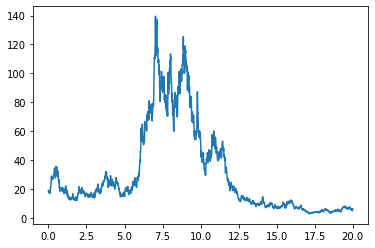

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

T = 20
mu = 0.1
sigma = 0.5
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()

In [ ]:
pip install stocksymbol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from stocksymbol import StockSymbol

api_key = 'a9f82975-b7fb-4f7c-b3c3-8510831b9ca5'
ss = StockSymbol(api_key)

In [ ]:
symbol_only_list = ss.get_symbol_list(market="america", symbols_only=True)
symbol_only_list

['AAPL',
 'MSFT',
 'GOOG',
 'GOOGL',
 'AMZN',
 'TSLA',
 'FB',
 'BRK.B',
 'BRK.A',
 'NVDA',
 'TSM',
 'JPM',
 'JNJ',
 'V',
 'UNH',
 'HD',
 'BAC',
 'WMT',
 'PG',
 'MA',
 'RHHBY',
 'BABA',
 'RHHVF',
 'RHHBF',
 'PFE',
 'ASML',
 'XOM',
 'DIS',
 'TM',
 'KO',
 'CSCO',
 'AVGO',
 'LLY',
 'NKE',
 'ACN',
 'ADBE',
 'CVX',
 'PEP',
 'ABT',
 'NFLX',
 'TMO',
 'ABBV',
 'COST',
 'ORCL',
 'NVO',
 'CMCSA',
 'CRM',
 'VZ',
 'PYPL',
 'WFC',
 'INTC',
 'DHR',
 'MRK',
 'QCOM',
 'MCD',
 'NVS',
 'UPS',
 'T',
 'MS',
 'RDS.A',
 'RDS.B',
 'AZN',
 'SCHW',
 'LIN',
 'NEE',
 'LOW',
 'TXN',
 'UNP',
 'SAP',
 'INTU',
 'RY',
 'AMD',
 'BHP',
 'BBL',
 'SONY',
 'PM',
 'HON',
 'TD',
 'PTR',
 'SHOP',
 'MDT',
 'BX',
 'BMY',
 'TTE',
 'CVS',
 'TMUS',
 'UL',
 'BLK',
 'RTX',
 'AXP',
 'AMAT',
 'GS',
 'HSBC',
 'C',
 'AMGN',
 'EL',
 'BUD',
 'BA',
 'SNY',
 'SBUX',
 'DEO',
 'AMT',
 'CAT',
 'IBM',
 'PLD',
 'DE',
 'RIO',
 'ISRG',
 'HDB',
 'NOW',
 'LFC',
 'GE',
 'TGT',
 'CHTR',
 'SPGI',
 'COP',
 'MU',
 'JD',
 'ANTM',
 'ABNB',
 'SE',
 'MMM',
 

In [ ]:
market_list = ss.market_list

market_list

[{'market': 'venezuela',
  'abbreviation': 've',
  'totalCount': 25,
  'lastUpdated': '2022-01-10T00:00:00.000Z',
  'index': []},
 {'market': 'southafrica',
  'abbreviation': 'za',
  'totalCount': 455,
  'lastUpdated': '2022-01-10T00:00:00.000Z',
  'index': []},
 {'market': 'singapore',
  'abbreviation': 'sg',
  'totalCount': 540,
  'lastUpdated': '2022-01-10T00:00:00.000Z',
  'index': [{'id': 'TVC:STI', 'name': 'STRAITS TIMES INDEX'}]},
 {'market': 'thailand',
  'abbreviation': 'th',
  'totalCount': 1562,
  'lastUpdated': '2022-01-10T00:00:00.000Z',
  'index': [{'id': 'SET:SET100', 'name': 'SET100 INDEX'},
   {'id': 'SET:SET50', 'name': 'SET50 INDEX'}]},
 {'market': 'turkey',
  'abbreviation': 'tr',
  'totalCount': 449,
  'lastUpdated': '2022-01-10T00:00:00.000Z',
  'index': [{'id': 'BIST:XUTUM', 'name': 'BIST TUM'},
   {'id': 'BIST:XUTEK', 'name': 'BIST TEKNOLOJI'},
   {'id': 'BIST:XU100', 'name': 'BIST 100'},
   {'id': 'BIST:XGIDA', 'name': 'BIST GIDA ICECEK'},
   {'id': 'BIST:XSPOR